# 📌 **Projet Machine Learning : Churn Prediction**

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Afficher toute la sortie en entière

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_columns', 21)

In [ ]:
# 1️⃣ Chargement des données
data = pd.read_csv("Intro/Data science with Python/Datasets/Telco-Churn.csv")

### 📊 Dictionnaire des Données du Dataset "Churn"

| **Colonne**           | **Type**   | **Description** |
|----------------------|-----------|----------------|
| `customerID`        | `object`  | Identifiant unique du client |
| `gender`            | `object`  | Sexe du client (`Male` ou `Female`) |
| `SeniorCitizen`     | `int`     | Indique si le client est senior (`0` = Non, `1` = Oui) |
| `Partner`           | `object`  | Le client a-t-il un partenaire (`Yes` ou `No`) |
| `Dependents`        | `object`  | Le client a-t-il des personnes à charge (`Yes` ou `No`) |
| `tenure`            | `int`     | Nombre de mois depuis l'inscription du client |
| `PhoneService`      | `object`  | Le client a-t-il un service téléphonique (`Yes` ou `No`) |
| `MultipleLines`     | `object`  | Le client a-t-il plusieurs lignes (`Yes`, `No`, ou `No phone service`) |
| `InternetService`   | `object`  | Type d'abonnement Internet (`DSL`, `Fiber optic`, `No`) |
| `OnlineSecurity`    | `object`  | Sécurité en ligne activée (`Yes`, `No`, `No internet service`) |
| `OnlineBackup`      | `object`  | Sauvegarde en ligne activée (`Yes`, `No`, `No internet service`) |
| `DeviceProtection`  | `object`  | Protection des appareils activée (`Yes`, `No`, `No internet service`) |
| `TechSupport`       | `object`  | Support technique activé (`Yes`, `No`, `No internet service`) |
| `StreamingTV`       | `object`  | Service de streaming TV activé (`Yes`, `No`, `No internet service`) |
| `StreamingMovies`   | `object`  | Service de streaming films activé (`Yes`, `No`, `No internet service`) |
| `Contract`          | `object`  | Type de contrat (`Month-to-month`, `One year`, `Two year`) |
| `PaperlessBilling`  | `object`  | Facturation sans papier activée (`Yes` ou `No`) |
| `PaymentMethod`     | `object`  | Mode de paiement (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`) |
| `MonthlyCharges`    | `float`   | Montant facturé mensuellement |
| `TotalCharges`      | `object`  | Montant total facturé au client *(à convertir en float)* |
| `Churn`            | `object`  | Le client a-t-il résilié (`Yes` ou `No`) |

📌 **Remarque :**
- La colonne `TotalCharges` est au format `object` et doit être convertie en `float` pour l'analyse numérique.
- La variable `Churn` est la cible du modèle de classification pour la prédiction de la résiliation des clients.

In [65]:
df =data.copy()

In [66]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4795-UXVCJ    Male              0      No         No     NaN          Yes   
1  7450-NWRTR    Male              1      No         No    12.0          Yes   
2  8044-BGWPI    Male              0     Yes        Yes    12.0          Yes   
3  5982-PSMKW  Female              0     Yes        Yes    23.0          Yes   
4  0684-AOSIH    Male              0     Yes         No     1.0          Yes   

  MultipleLines InternetService       OnlineSecurity  ...        Contract  \
0            No              No  No internet service  ...        One year   
1           Yes     Fiber optic                   No  ...  Month-to-month   
2            No              No  No internet service  ...  Month-to-month   
3           Yes             DSL                  Yes  ...        Two year   
4            No     Fiber optic                  Yes  ...  Month-to-month   

  PaperlessBilling            PaymentMethod MonthlyCharges TotalCharges Churn  \
0               No  Credit card (automatic)       19.80000        457.3    No   
1              Yes         Electronic check       99.45000      1200.15   Yes   
2              Yes         Electronic check       21.15000       306.05    No   
3              Yes  Credit card (automatic)            NaN       2198.3    No   
4              Yes         Electronic check      387.90254           95   Yes   

  CustomerSupportCalls RecentTransactions  SatisfactionScore  \
0                  3.0                3.0                7.8   
1                  5.0                6.0                6.7   
2                  2.0                4.0                6.0   
3                  4.0                5.0                2.9   
4                  3.0                4.0                7.5   

  DaysSinceLastInteraction  
0                    173.0  
1                    334.0  
2                    267.0  
3                    219.0  
4                    199.0  

[5 rows x 25 columns]

Avant toute chose, faisons une copie de notre dataset

In [8]:
# Nettoyage des données
df.drop(columns=["customerID"], inplace=True)  # Suppression de l'ID
# Suppression par l'axe des colonnes
# df = df.drop('customerID', axis=1)

Identifier le nombre de lignes et de colonnes

In [9]:
df.shape

(20000, 24)

Types de variables (discrètes, continues).

In [10]:
df.dtypes

gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
tenure                      float64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
Contract                     object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                 object
Churn                        object
CustomerSupportCalls        float64
RecentTransactions          float64
SatisfactionScore           float64
DaysSinceLastInteraction    float64
dtype: object

In [11]:
df['TotalCharges'].unique()

array(['457.3', '1200.15', '306.05', ..., '438.25', '1334.5', '272.35'],
      dtype=object)

In [68]:
# Correction du problème de type pour "TotalCharges"
df["TotalCharges"] = df["TotalCharges"].replace(" ", None)  # Remplace les espaces vides par None
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")  # Convertit en float
#df.dropna(subset=["TotalCharges"], inplace=True)  # Supprime les valeurs NaN après conversion

In [69]:
df['TotalCharges'].unique()

array([ 457.3 , 1200.15,  306.05, ...,  438.25, 1334.5 ,  272.35])

In [13]:
# Identification des colonnes mal typées
print("\n📌 Aperçu des valeurs non numériques dans les colonnes censées être numériques :")
for col in df.select_dtypes('float'):
    non_numeric_values = df[col].apply(lambda x: not str(x).replace(".", "", 1).isdigit())
    if non_numeric_values.any():
        print(f"❌ Problème détecté dans {col} : {df[non_numeric_values][col].unique()}")


📌 Aperçu des valeurs non numériques dans les colonnes censées être numériques :
❌ Problème détecté dans tenure : [nan]
❌ Problème détecté dans MonthlyCharges : [nan]
❌ Problème détecté dans TotalCharges : [nan]
❌ Problème détecté dans SatisfactionScore : [nan]
❌ Problème détecté dans DaysSinceLastInteraction : [nan]


In [14]:
# Sélectionner les colonnes de type float
float_columns = df.select_dtypes(include=['float']).columns

# Vérifier si toutes les valeurs sont bien de type float
for col in float_columns:
    non_float_values = df[~df[col].apply(lambda x: isinstance(x, (float, int)))]
    if not non_float_values.empty:
        print(f"❌ Problème détecté dans {col} : {non_float_values[col].unique()}")


In [15]:
# Sélectionner les colonnes de type float
float_columns = df.select_dtypes(include=['float']).columns

# Vérifier le nombre de valeurs NaN par colonne
for col in float_columns:
    nan_count = df[col].isna().sum()
    if nan_count > 0:
        print(f"⚠️ {col} contient {nan_count} valeurs NaN.")


⚠️ tenure contient 2851 valeurs NaN.
⚠️ MonthlyCharges contient 2837 valeurs NaN.
⚠️ TotalCharges contient 30 valeurs NaN.
⚠️ SatisfactionScore contient 1000 valeurs NaN.
⚠️ DaysSinceLastInteraction contient 1000 valeurs NaN.


In [16]:
for col in df.select_dtypes(include=['float']).columns:
    space_values = df[df[col].astype(str).str.strip() == " "]
    if not space_values.empty:
        print(f"⚠️ {col} contient {len(space_values)} valeurs contenant uniquement des espaces.")


In [17]:
for col in df.select_dtypes(include=['float']).columns:
    space_values = df[df[col].astype(str).str.strip() == ""]
    if not space_values.empty:
        print(f"⚠️ {col} contient {len(space_values)} valeurs contenant uniquement des espaces.")

In [18]:
def clean_numeric_columns(df):
    for col in df.select_dtypes(include=['float', 'int']).columns:
        df[col] = df[col].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)  # Supprime caractères non numériques
        df[col] = df[col].str.replace(",", ".")  # Remplace les virgules par des points
        df[col] = pd.to_numeric(df[col], errors="coerce")  # Convertit en float (remplace erreurs par NaN)
        df[col].fillna(df[col].mean(), inplace=True)  # Remplace NaN par la moyenne
    return df


In [19]:
df.dtypes.value_counts()

object     16
float64     7
int64       1
Name: count, dtype: int64

<Axes: ylabel='count'>

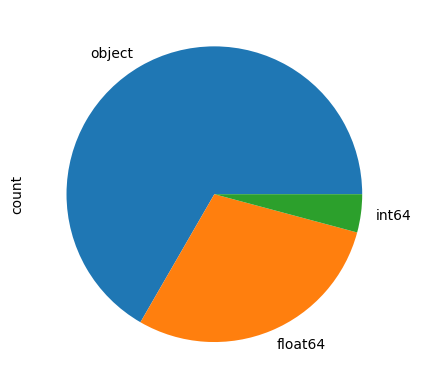

In [19]:
df.dtypes.value_counts().plot.pie()

In [20]:
df.isna()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       False          False    False       False    True         False   
1       False          False    False       False   False         False   
2       False          False    False       False   False         False   
3       False          False    False       False   False         False   
4       False          False    False       False   False         False   
...       ...            ...      ...         ...     ...           ...   
19995   False          False    False       False   False         False   
19996   False          False    False       False   False         False   
19997   False          False    False       False   False         False   
19998   False          False    False       False   False         False   
19999   False          False    False       False    True         False   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              False            False           False         False  ...   
1              False            False           False         False  ...   
2              False            False           False         False  ...   
3              False            False           False         False  ...   
4              False            False           False         False  ...   
...              ...              ...             ...           ...  ...   
19995          False            False           False         False  ...   
19996          False            False           False         False  ...   
19997          False            False           False         False  ...   
19998          False            False           False         False  ...   
19999          False            False           False         False  ...   

       Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0         False             False          False           False   
1         False             False          False           False   
2         False             False          False           False   
3         False             False          False            True   
4         False             False          False           False   
...         ...               ...            ...             ...   
19995     False             False          False           False   
19996     False             False          False           False   
19997     False             False          False           False   
19998     False             False          False            True   
19999     False             False          False            True   

       TotalCharges  Churn  CustomerSupportCalls  RecentTransactions  \
0             False  False                 False               False   
1             False  False                 False               False   
2             False  False                 False               False   
3             False  False                 False               False   
4             False  False                 False               False   
...             ...    ...                   ...                 ...   
19995         False  False                 False               False   
19996         False  False                 False               False   
19997         False  False                 False               False   
19998         False  False                 False               False   
19999         False  False                 False               False   

       SatisfactionScore  DaysSinceLastInteraction  
0                  False                     False  
1                  False                     False  
2                  False                     False  
3                  False                     False  
4                  False                     False  
...                  ...                       ...  
19995              False                     False  
19996              False                     False  
19997              False          

<Axes: >

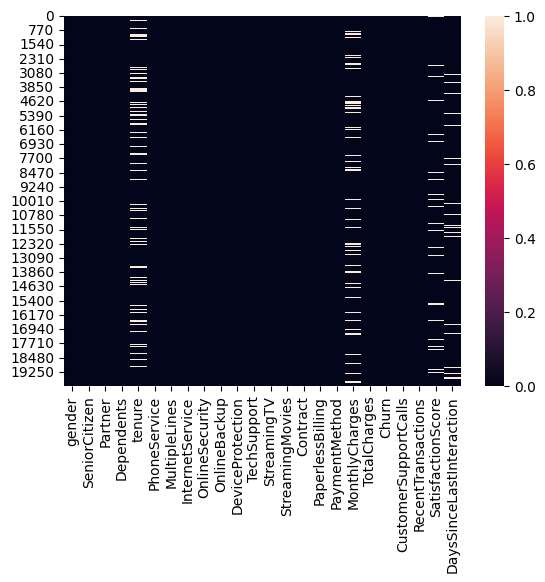

In [21]:
sns.heatmap(df.isna())

<Axes: >

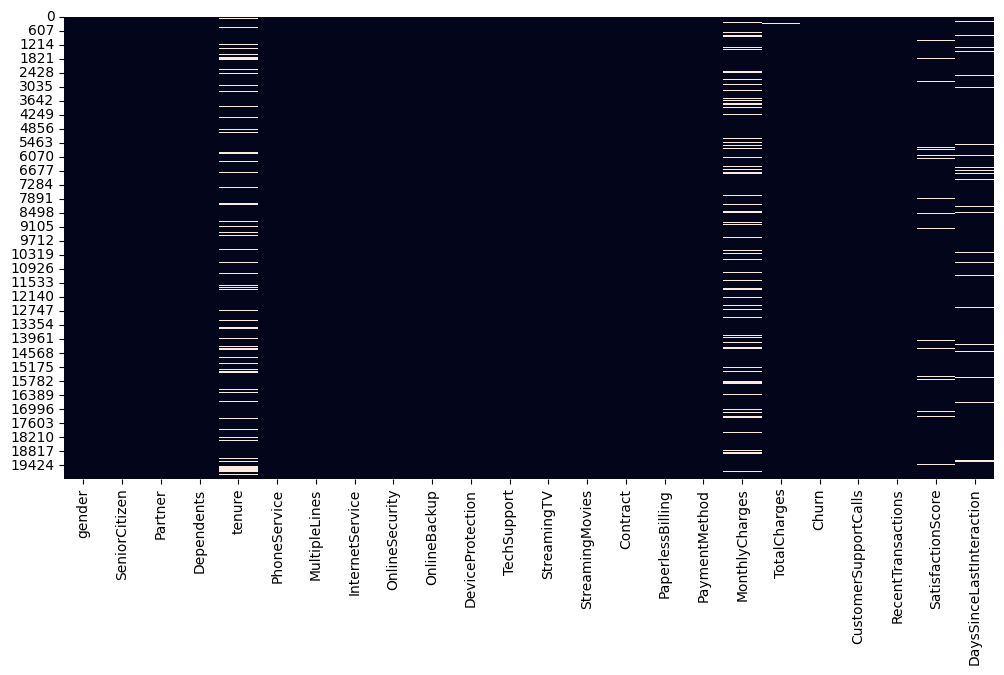

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)

In [23]:
df.isna().sum()

gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                      2851
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges              2837
TotalCharges                  30
Churn                          0
CustomerSupportCalls           0
RecentTransactions             0
SatisfactionScore           1000
DaysSinceLastInteraction    1000
dtype: int64

In [24]:
df.isna().sum()/df.shape[0]

gender                      0.00000
SeniorCitizen               0.00000
Partner                     0.00000
Dependents                  0.00000
tenure                      0.14255
PhoneService                0.00000
MultipleLines               0.00000
InternetService             0.00000
OnlineSecurity              0.00000
OnlineBackup                0.00000
DeviceProtection            0.00000
TechSupport                 0.00000
StreamingTV                 0.00000
StreamingMovies             0.00000
Contract                    0.00000
PaperlessBilling            0.00000
PaymentMethod               0.00000
MonthlyCharges              0.14185
TotalCharges                0.00150
Churn                       0.00000
CustomerSupportCalls        0.00000
RecentTransactions          0.00000
SatisfactionScore           0.05000
DaysSinceLastInteraction    0.05000
dtype: float64

In [25]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

gender                      0.00000
RecentTransactions          0.00000
CustomerSupportCalls        0.00000
Churn                       0.00000
PaymentMethod               0.00000
PaperlessBilling            0.00000
Contract                    0.00000
StreamingMovies             0.00000
StreamingTV                 0.00000
DeviceProtection            0.00000
TechSupport                 0.00000
OnlineSecurity              0.00000
InternetService             0.00000
MultipleLines               0.00000
PhoneService                0.00000
Dependents                  0.00000
Partner                     0.00000
SeniorCitizen               0.00000
OnlineBackup                0.00000
TotalCharges                0.00150
SatisfactionScore           0.05000
DaysSinceLastInteraction    0.05000
MonthlyCharges              0.14185
tenure                      0.14255
dtype: float64

In [26]:
df['Churn']

0         No
1        Yes
2         No
3         No
4        Yes
        ... 
19995     No
19996     No
19997     No
19998     No
19999     No
Name: Churn, Length: 20000, dtype: object

In [27]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.7389
Yes    0.2611
Name: proportion, dtype: float64

Nous pouvons affirmer que nos classes ne sont équilibrées pour ce problème. Donc, il faudra utiliser une métrique comme le score F1, sensibilité ou la précision

Histogramme des variables continues

In [20]:
for col in df.select_dtypes('float'):
  print(col)

tenure
MonthlyCharges
TotalCharges
CustomerSupportCalls
RecentTransactions
SatisfactionScore
DaysSinceLastInteraction


In [21]:
for col in df.select_dtypes('float'):
  print(f'{col :-<50} {df[col].unique()}')

tenure-------------------------------------------- [nan 12. 23.  1.  2. 64. 49. 16. 21. 13. 27. 17.  8. 58.  9.  6. 56. 32.
 18. 19. 63. 36. 69.  0. 38.  3.  7. 71. 11. 24. 72. 45. 60. 14. 22. 54.
 41. 52. 35. 42. 55. 37. 20. 48. 68. 70. 47. 66. 15. 28. 57. 10. 26. 33.
 62. 67. 50. 59. 44. 51. 25.  4. 31. 43. 29. 65. 30. 39.  5. 53. 61. 34.
 46. 40.]
MonthlyCharges------------------------------------ [ 19.8         99.45        21.15       ... 323.69783858 141.63156317
 285.36419138]
TotalCharges-------------------------------------- [ 457.3  1200.15  306.05 ...  438.25 1334.5   272.35]
CustomerSupportCalls------------------------------ [3. 5. 2. 4. 0. 1. 6. 7.]
RecentTransactions-------------------------------- [ 3.  6.  4.  5.  2.  7.  8.  9.  0.  1. 10.]
SatisfactionScore--------------------------------- [ 7.8  6.7  6.   2.9  7.5  4.9  8.4  6.5  6.1  3.9  3.2  4.6  6.2  5.8
  6.8  nan  3.1  4.   1.1  6.6  2.4  4.2  5.6  5.5  4.8  5.3  7.   8.1
  6.4  1.4  7.2  5.9  7.6  3.8  6.9  6.

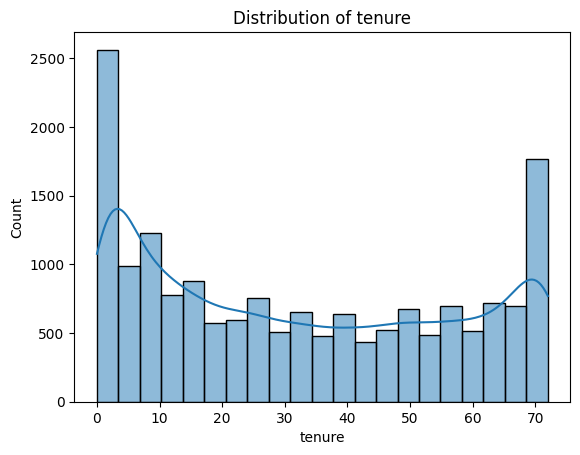

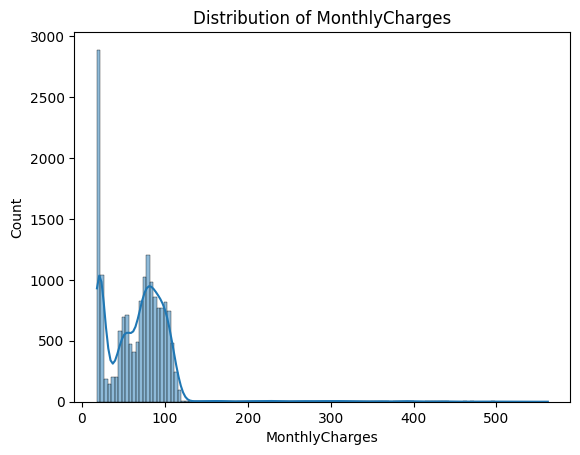

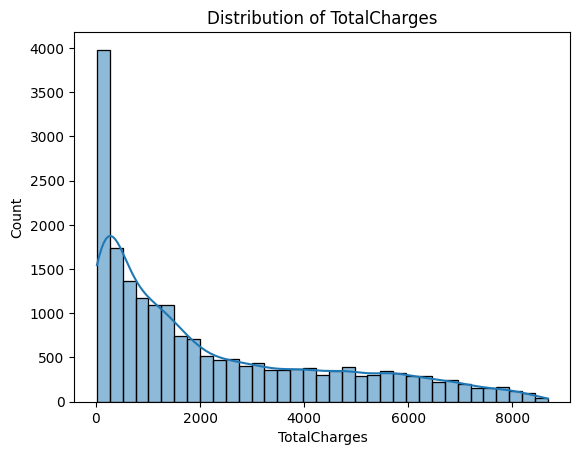

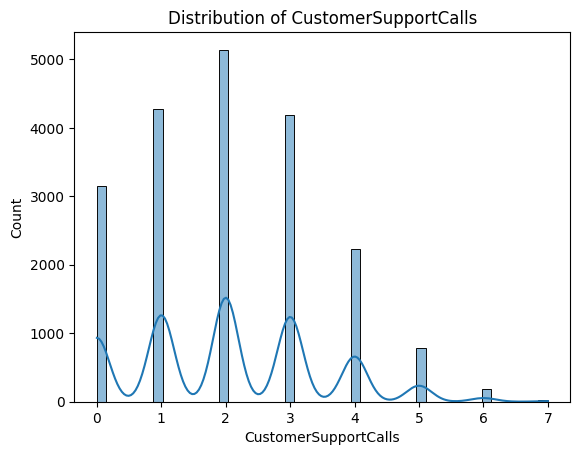

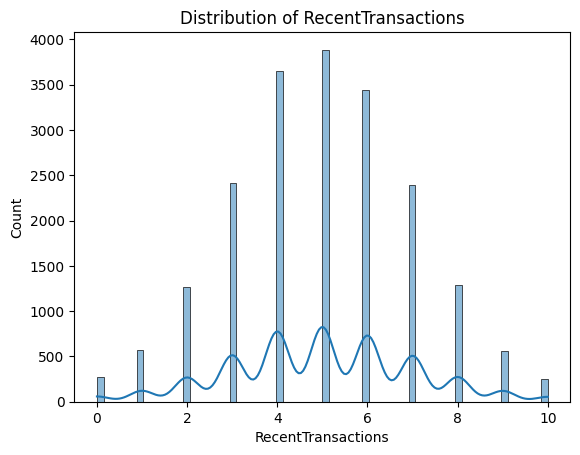

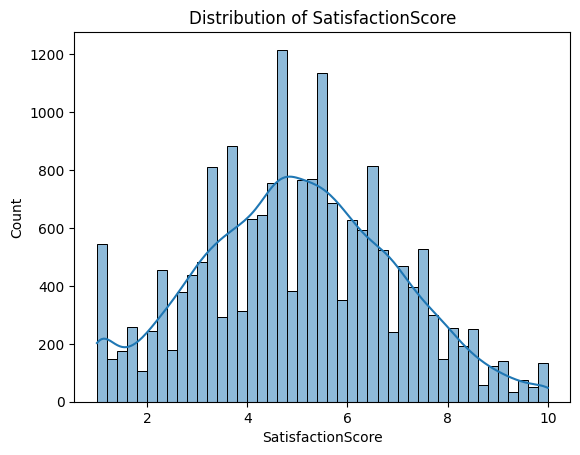

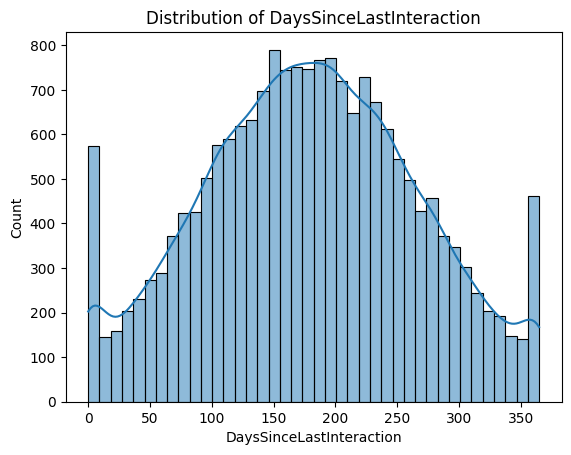

In [30]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col], kde=True)  # kde=True adds a Kernel Density Estimate
    plt.title(f'Distribution of {col}')

In [22]:
for col in df.select_dtypes('int'):
  print(col)

SeniorCitizen


In [23]:
for col in df.select_dtypes('int'):
  print(f'{col :-<50} {df[col].unique()}')

SeniorCitizen------------------------------------- [0 1]


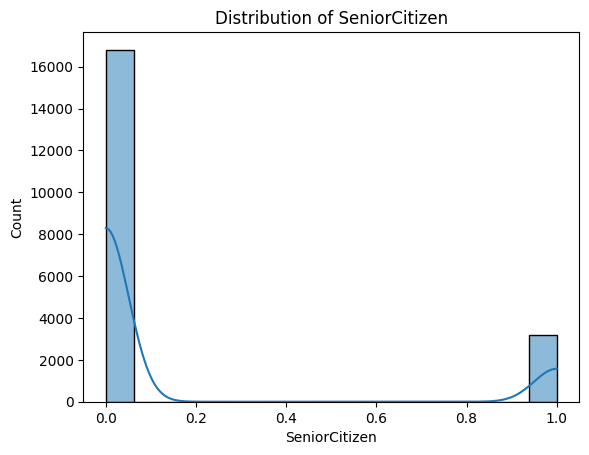

In [33]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.histplot(df[col], kde=True)  # kde=True adds a Kernel Density Estimate
    plt.title(f'Distribution of {col}')

Variables catégorielles

In [24]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
for col in df.select_dtypes('object'):
  print(col)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [26]:
for col in df.select_dtypes('object'):
  print(col, df[col].unique())

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['No' 'Fiber optic' 'DSL']
OnlineSecurity ['No internet service' 'No' 'Yes']
OnlineBackup ['No internet service' 'No' 'Yes']
DeviceProtection ['No internet service' 'Yes' 'No']
TechSupport ['No internet service' 'No' 'Yes']
StreamingTV ['No internet service' 'Yes' 'No']
StreamingMovies ['No internet service' 'Yes' 'No']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
Churn ['No' 'Yes']


Lorsqu'on analyse les variables qualitatives, commencer par voir les différentes modalités dans chaque variable et ensuite, compter le nombre de modalités dans chaque variable

In [27]:
for col in df.select_dtypes('object'):
  print(f'{col :-<50} {df[col].unique()}')

gender-------------------------------------------- ['Male' 'Female']
Partner------------------------------------------- ['No' 'Yes']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['Yes' 'No']
MultipleLines------------------------------------- ['No' 'Yes' 'No phone service']
InternetService----------------------------------- ['No' 'Fiber optic' 'DSL']
OnlineSecurity------------------------------------ ['No internet service' 'No' 'Yes']
OnlineBackup-------------------------------------- ['No internet service' 'No' 'Yes']
DeviceProtection---------------------------------- ['No internet service' 'Yes' 'No']
TechSupport--------------------------------------- ['No internet service' 'No' 'Yes']
StreamingTV--------------------------------------- ['No internet service' 'Yes' 'No']
StreamingMovies----------------------------------- ['No internet service' 'Yes' 'No']
Contract------------------------------------------ ['One year'

In [38]:
columns_to_replace = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                      "TechSupport", "StreamingTV", "StreamingMovies"]

for col in columns_to_replace:
    df[col] = df[col].replace({"No internet service": "No"})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

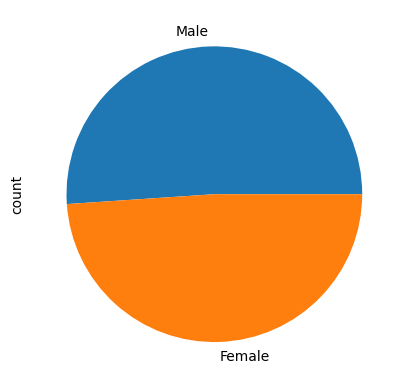

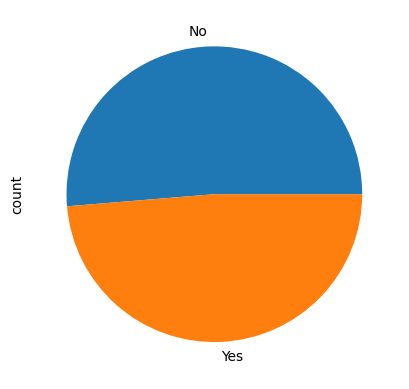

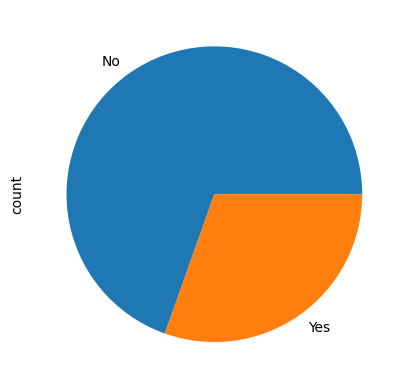

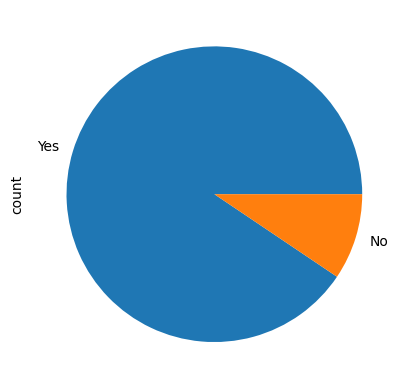

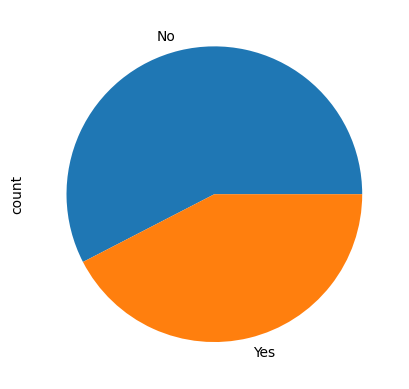

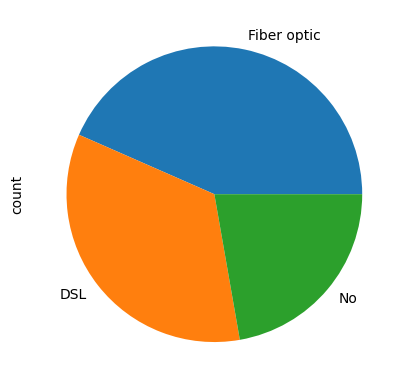

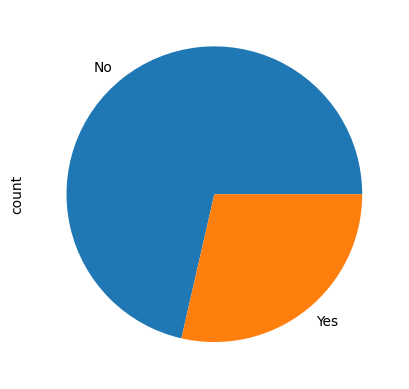

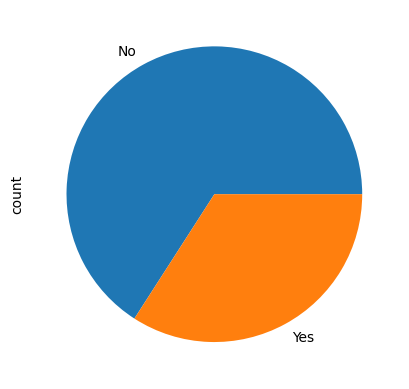

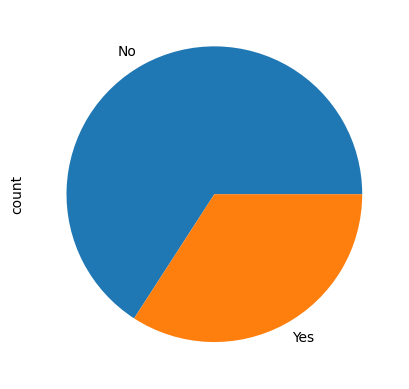

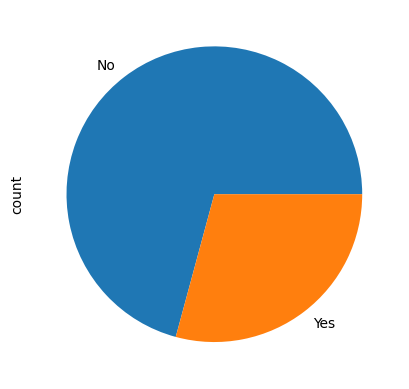

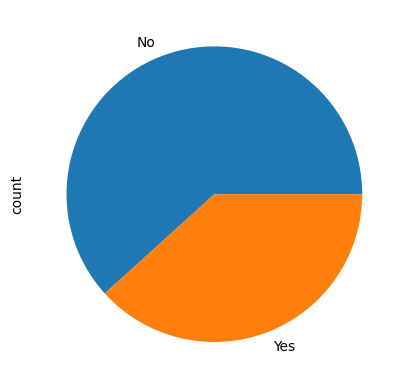

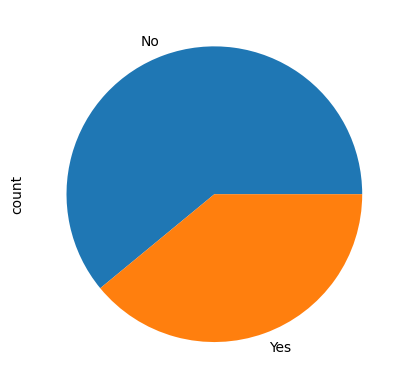

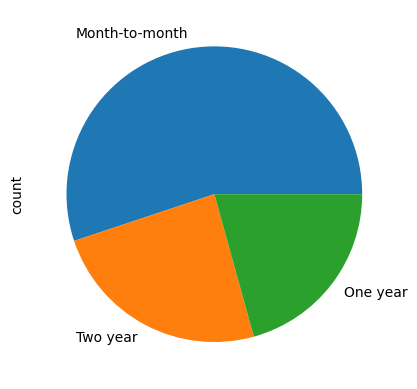

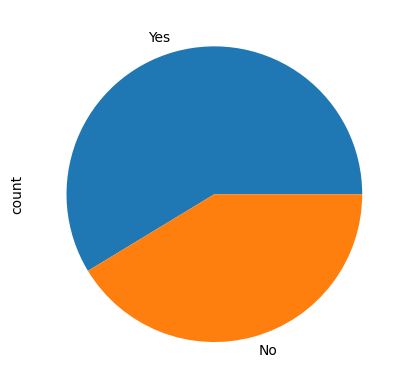

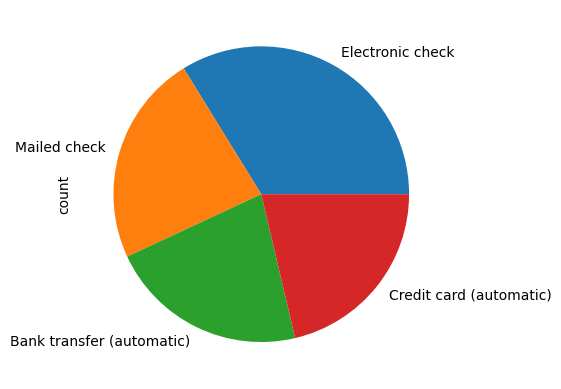

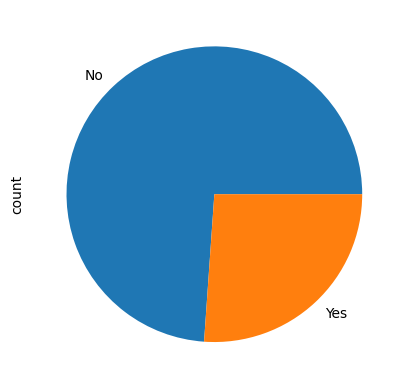

In [39]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [40]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

## Relation Target / Variables
### Création de sous-ensembles positifs et négatifs

In [41]:
# Boolean indexing
df['Churn'] == 'Yes'

0        False
1         True
2        False
3        False
4         True
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Churn, Length: 20000, dtype: bool

In [42]:
# Intégration dans notre dataframe
df[df['Churn'] == 'Yes']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1        Male              1      No         No    12.0          Yes   
4        Male              0     Yes         No     1.0          Yes   
5      Female              0      No         No     1.0           No   
9      Female              0     Yes        Yes    49.0          Yes   
12     Female              1     Yes         No     1.0          Yes   
...       ...            ...     ...        ...     ...          ...   
19968  Female              1      No         No     1.0          Yes   
19970    Male              0     Yes         No    55.0          Yes   
19975  Female              1      No         No    26.0          Yes   
19979    Male              0      No         No    15.0           No   
19993  Female              0      No         No     1.0          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
1               Yes     Fiber optic             No           No  ...   
4                No     Fiber optic            Yes           No  ...   
5                No             DSL             No           No  ...   
9               Yes     Fiber optic             No          Yes  ...   
12               No     Fiber optic             No          Yes  ...   
...             ...             ...            ...          ...  ...   
19968            No             DSL            Yes           No  ...   
19970           Yes     Fiber optic            Yes          Yes  ...   
19975           Yes     Fiber optic            Yes          Yes  ...   
19979            No             DSL             No           No  ...   
19993            No             DSL             No           No  ...   

             Contract PaperlessBilling              PaymentMethod  \
1      Month-to-month              Yes           Electronic check   
4      Month-to-month              Yes           Electronic check   
5      Month-to-month              Yes               Mailed check   
9            Two year              Yes  Bank transfer (automatic)   
12     Month-to-month              Yes               Mailed check   
...               ...              ...                        ...   
19968  Month-to-month              Yes           Electronic check   
19970  Month-to-month              Yes           Electronic check   
19975  Month-to-month              Yes           Electronic check   
19979  Month-to-month              Yes           Electronic check   
19993  Month-to-month              Yes               Mailed check   

      MonthlyCharges TotalCharges Churn CustomerSupportCalls  \
1           99.45000      1200.15   Yes                  5.0   
4          387.90254        95.00   Yes                  3.0   
5           25.10000        25.10   Yes                  3.0   
9          107.95000      5293.20   Yes                  1.0   
12          76.40000        76.40   Yes                  0.0   
...              ...          ...   ...                  ...   
19968       55.80000        55.80   Yes                  1.0   
19970       96.75000      5238.90   Yes                  2.0   
19975       95.00000      2497.20   Yes                  1.0   
19979       29.70000       438.25   Yes                  3.0   
19993       45.40000        45.40   Yes                  4.0   

       RecentTransactions  SatisfactionScore DaysSinceLastInteraction  
1                     6.0                6.7                    334.0  
4                     4.0                7.5                    199.0  
5                     3.0                4.9                    265.0  
9                     6.0                3.9                    250.0  
12                    6.0                6.1                    172.0  
...                   ...                ...                      ...  
19968                 4.0                5.5                    241.0  
19970                 3.0                4.5                    278.0  
19975                 7.0      

5222 lignes

In [28]:
yes_df = df[df['Churn'] == 'Yes']

In [29]:
# Datafram Yes
no_df = df[df['Churn'] == 'No']

In [45]:
df.isna().sum()/df.shape[0]

gender                      0.00000
SeniorCitizen               0.00000
Partner                     0.00000
Dependents                  0.00000
tenure                      0.14255
PhoneService                0.00000
MultipleLines               0.00000
InternetService             0.00000
OnlineSecurity              0.00000
OnlineBackup                0.00000
DeviceProtection            0.00000
TechSupport                 0.00000
StreamingTV                 0.00000
StreamingMovies             0.00000
Contract                    0.00000
PaperlessBilling            0.00000
PaymentMethod               0.00000
MonthlyCharges              0.14185
TotalCharges                0.00150
Churn                       0.00000
CustomerSupportCalls        0.00000
RecentTransactions          0.00000
SatisfactionScore           0.05000
DaysSinceLastInteraction    0.05000
dtype: float64

In [30]:
# Enregistrement dans une variable
missing_rate = df.isna().sum()/df.shape[0]

In [31]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(numeric_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'CustomerSupportCalls', 'RecentTransactions', 'SatisfactionScore', 'DaysSinceLastInteraction']


In [32]:
cat_columns = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() < 20]
print(cat_columns)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


<ipython-input-33-9ab7afc5e314>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-33-9ab7afc5e314>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


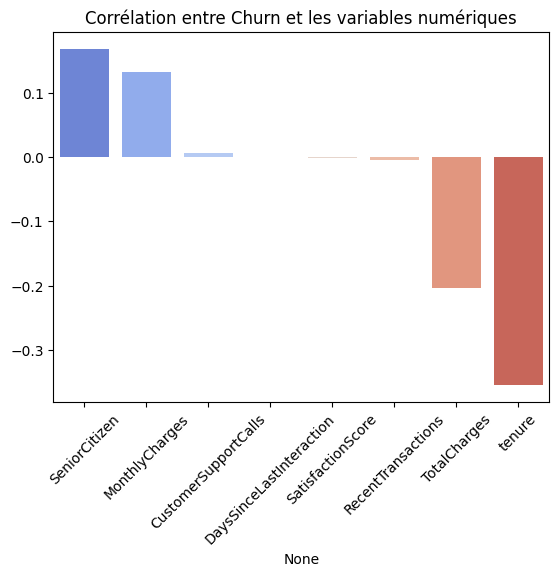

SeniorCitizen               0.167813
MonthlyCharges              0.132814
CustomerSupportCalls        0.006857
DaysSinceLastInteraction    0.000227
SatisfactionScore          -0.001141
RecentTransactions         -0.004078
TotalCharges               -0.204054
tenure                     -0.354688
dtype: float64


In [33]:
# Convertir Churn en numérique si ce n'est pas encore fait
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

# Calculer la corrélation
correlation = df[numeric_columns].corrwith(df['Churn']).sort_values(ascending=False)

sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Corrélation entre Churn et les variables numériques")
plt.show()

# Afficher les valeurs de corrélation
print(correlation)

📊 Interprétation des Corrélations avec Churn
Les valeurs représentent la corrélation de chaque variable numérique avec Churn.
📌 Rappel :

Corrélation positive (+) → Plus la variable augmente, plus le churn augmente.
Corrélation négative (-) → Plus la variable augmente, moins il y a de churn.
🔍 Variables les plus influentes sur Churn
➡️ Facteurs qui augmentent le Churn (+)
✅ SeniorCitizen (0.168) → Les clients plus âgés partent plus souvent.
✅ MonthlyCharges (0.133) → Les clients avec des factures mensuelles élevées ont plus de churn.

💡 Hypothèse : Les clients plus âgés et ceux avec des charges mensuelles élevées sont plus susceptibles de résilier leur contrat.

⬅️ Facteurs qui réduisent le Churn (-)
❌ TotalCharges (-0.204) → Plus un client a payé au total, moins il part.
❌ tenure (-0.355) → Plus un client reste longtemps, moins il part.

💡 Hypothèse : Les clients fidèles et ceux qui ont payé beaucoup sont moins enclins à partir.

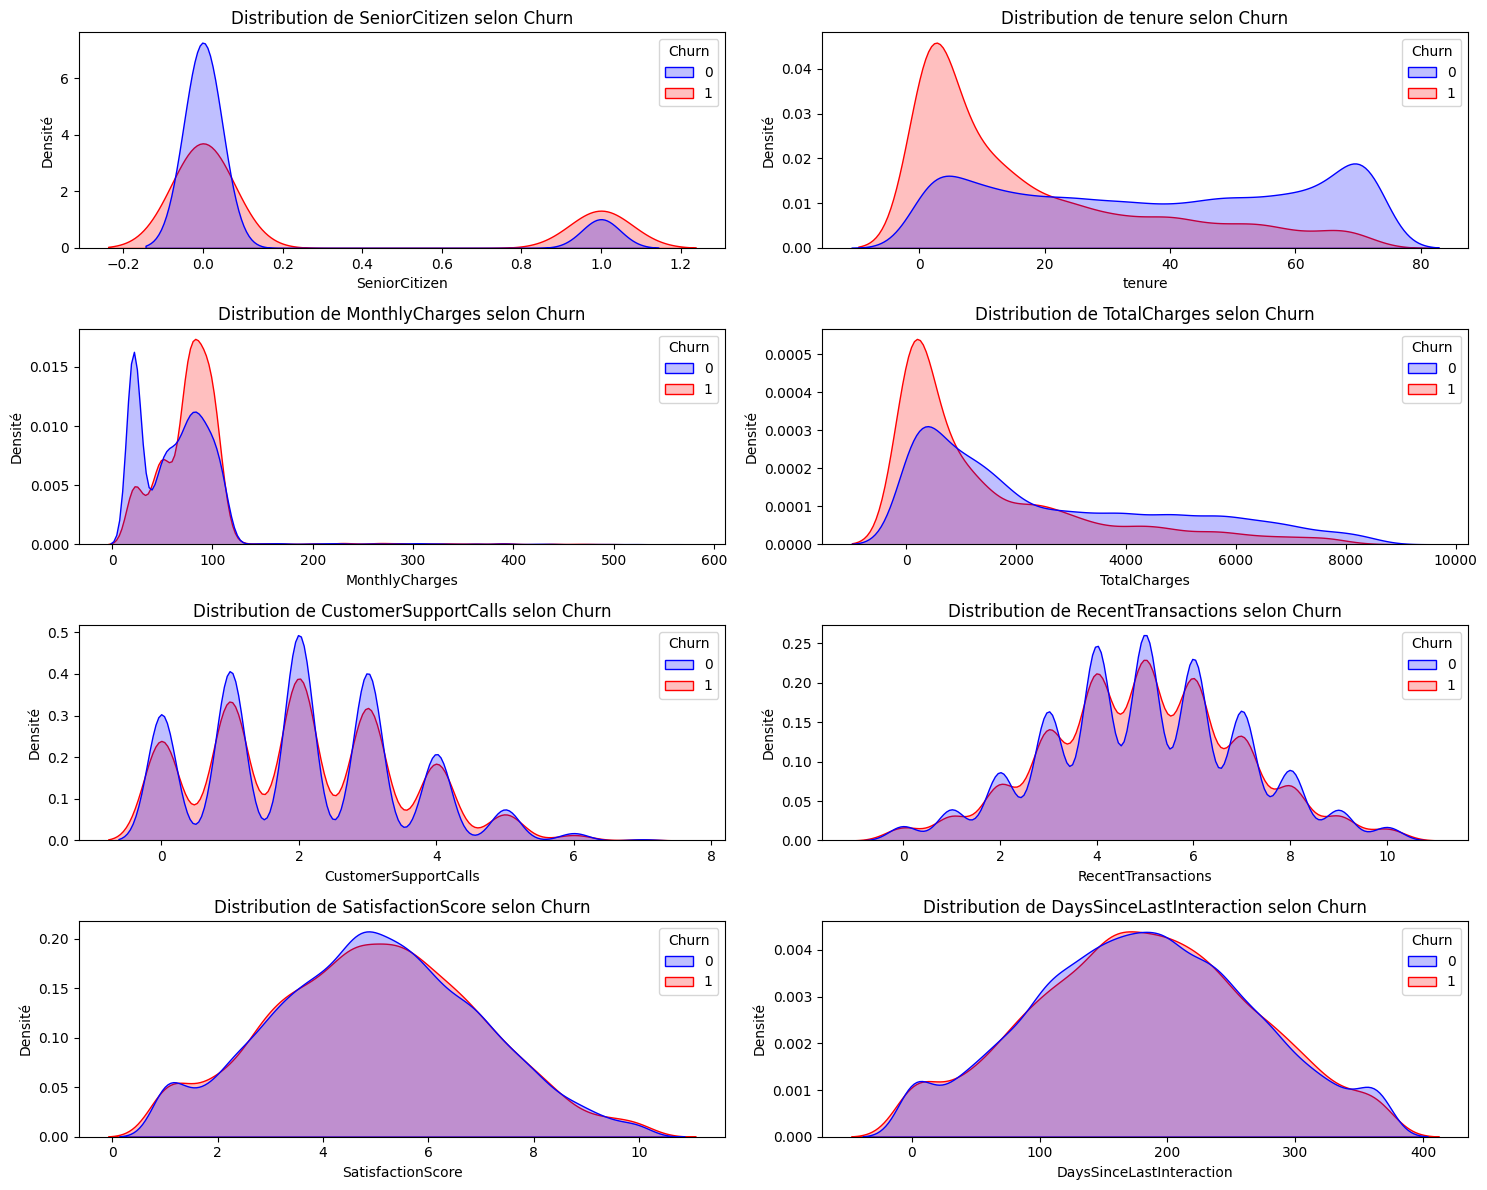

In [50]:
# Tracer les distributions
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=col, hue="Churn", fill=True, palette=["blue", "red"], common_norm=False)
    plt.title(f"Distribution de {col} selon Churn")
    plt.xlabel(col)
    plt.ylabel("Densité")

plt.tight_layout()
plt.show()


🚀 Synthèse des formes des courbes
✅ Forts indicateurs de churn :

Faible tenure → Les nouveaux clients partent plus.
Charges mensuelles élevées → Plus c’est cher, plus le churn monte.
TotalCharges faibles → Les clients qui partent n’ont souvent pas beaucoup payé (liés à la tenure).
⚠️ Indicateurs modérés :

SeniorCitizen → Les seniors churnent un peu plus.
SupportCalls fréquents → Peut indiquer une frustration.
SatisfactionScore → Un score faible est lié au churn, mais pas de rupture nette.
🔵 Variables peu discriminantes :

RecentTransactions
DaysSinceLastInteraction (faible impact direct).
🔑 Actionnables :
Programmes de fidélisation pour les nouveaux clients (réduire le churn early-stage).
Réduire les charges mensuelles pour les clients à risque.
Intervenir sur les clients qui appellent souvent le support ou ont des interactions interrompues.

📊 Analyse des formes des courbes de distribution (churn=0 vs churn=1)
En analysant les courbes de densité (KDE), nous pouvons observer comment chaque variable est distribuée en fonction de l'état de churn (0 = pas de churn, 1 = churn). Voici une analyse détaillée pour chaque variable :

1️⃣ SeniorCitizen vs. Churn
Forme bimodale (deux pics) :
Pic principal à 0 (non-senior) : La majorité des clients ne sont pas des seniors.
Petit pic à 1 (senior) : Les clients seniors ont un taux de churn plus élevé (courbe rouge).
Conclusion :
Les seniors sont plus susceptibles de churner.
Être non-senior est associé à une probabilité plus faible de churn.
2️⃣ Tenure (ancienneté) vs. Churn
Asymétrie à droite (right-skewed) :
Les clients avec un faible tenure (nouveaux clients) ont une probabilité élevée de churn (courbe rouge plus forte).
Les clients avec une ancienneté élevée (tenure > 40) sont moins susceptibles de churner (pic bleu plus haut).
Conclusion :
Les nouveaux clients partent plus souvent.
Plus un client reste longtemps, moins il est probable qu'il quitte.
3️⃣ MonthlyCharges (factures mensuelles) vs. Churn
Forme bimodale :
Les clients avec un faible coût ont un faible churn (premier pic bleu).
Les churners (rouge) sont plus nombreux dans les charges mensuelles moyennes à élevées.
Conclusion :
Des charges élevées augmentent le risque de churn.
Les clients avec des charges modérées sont plus sensibles au churn.
4️⃣ TotalCharges vs. Churn
Asymétrie à droite :
Les clients avec peu de charges cumulées (TotalCharges faibles) ont plus de churn.
Les clients avec des charges élevées sont beaucoup moins susceptibles de churner.
Conclusion :
Les clients récents (faible TotalCharges) ont plus de risque de partir.
Les clients anciens (TotalCharges élevés) sont plus fidèles.
5️⃣ CustomerSupportCalls vs. Churn
Distribution cyclique (pics réguliers) :
Les clients qui churnent (rouge) ont légèrement plus d’appels au support.
Au-delà de 4 appels, le churn est légèrement plus fréquent.
Conclusion :
Plus un client contacte le support, plus il est susceptible de churner.
L’insatisfaction ou les problèmes techniques peuvent augmenter le churn.
6️⃣ RecentTransactions vs. Churn
Forme quasi-identique pour les deux groupes :
Les courbes se superposent presque totalement, indiquant peu de différence entre churners et non-churners.
Conclusion :
Les transactions récentes n’ont pas d’impact fort sur le churn.
7️⃣ SatisfactionScore vs. Churn
Distribution symétrique :
Les deux groupes (churn et non-churn) ont une distribution similaire.
Légère baisse de la densité rouge aux scores élevés (clients très satisfaits churnent moins).
Conclusion :
Le niveau de satisfaction a un effet limité, mais un score très bas peut être associé au churn.
8️⃣ DaysSinceLastInteraction vs. Churn
Forme très similaire :
Les distributions pour churn=0 et churn=1 sont quasi identiques.
Peu d'écart entre les deux courbes.
Conclusion :
La durée depuis la dernière interaction n’est pas un facteur clé du churn.
📌 Résumé global des observations :
### Relation entre les variables et le churn

| **Variable**                 | **Relation avec le churn**                          |
|------------------------------|----------------------------------------------------|
| **SeniorCitizen**             | Les seniors ont un taux de churn plus élevé.     |
| **Tenure**                    | Les nouveaux clients sont plus susceptibles de churner. |
| **MonthlyCharges**            | Les clients avec des charges élevées churnent plus.   |
| **TotalCharges**              | Faible TotalCharges = plus de churn (clients récents).|
| **CustomerSupportCalls**      | Plus d’appels au support = plus de risque de churn.   |
| **RecentTransactions**        | Aucun effet visible sur le churn.                    |
| **SatisfactionScore**         | Un score très bas peut légèrement augmenter le churn.|
| **DaysSinceLastInteraction**  | Aucun effet clair sur le churn.                      |

✅ Ces analyses confirment que l’ancienneté, les coûts élevés et les appels fréquents au support sont des indicateurs significatifs de churn.

Voici une analyse des résultats des distributions des variables numériques en fonction du churn :

1. SeniorCitizen vs Churn
La majorité des clients ne sont pas des seniors (valeur proche de 0).
Les seniors (valeur 1) ont une probabilité plus élevée de churn (courbe rouge plus haute pour 1).
L’effet est modéré mais visible.
2. Tenure vs Churn
Les clients qui restent longtemps (tenure élevée) ont moins de churn (courbe bleue plus dominante à droite).
Les nouveaux clients (tenure faible) ont un churn plus élevé.
L’effet est significatif : plus la tenure est faible, plus le churn est élevé.
3. MonthlyCharges vs Churn
Les clients avec des charges mensuelles élevées ont tendance à avoir un taux de churn plus élevé.
Il y a deux pics autour de montants plus faibles, mais la courbe rouge est plus haute pour des valeurs moyennes à élevées.
4. TotalCharges vs Churn
Semblable à la tenure : les clients avec un total de charges plus élevé ont un churn plus faible.
Cela peut être lié à la tenure (les clients anciens accumulent plus de charges et restent).
5. CustomerSupportCalls vs Churn
Pas de différence majeure, mais une légère tendance à un churn plus élevé pour ceux qui appellent plus souvent.
Cela peut indiquer de l’insatisfaction.
6. RecentTransactions vs Churn
Pas d’effet clair entre recent transactions et churn.
7. SatisfactionScore vs Churn
La satisfaction semble relativement similaire entre les groupes (pas de forte séparation entre rouge et bleu).
Peut être un indicateur moins déterminant.
8. DaysSinceLastInteraction vs Churn
Les distributions sont similaires entre churn et non-churn.
Peu d’influence directe visible.
Conclusion
Variables avec un effet fort sur le churn :

Tenure (forte relation négative : moins de tenure = plus de churn)
TotalCharges (similaire à tenure)
MonthlyCharges (charges plus élevées = plus de churn)
Variables avec un effet modéré :

SeniorCitizen (les seniors churnent plus souvent)
CustomerSupportCalls (légère tendance au churn pour ceux qui appellent plus souvent)
Variables avec peu d’effet visible :

SatisfactionScore, RecentTransactions, DaysSinceLastInteraction.

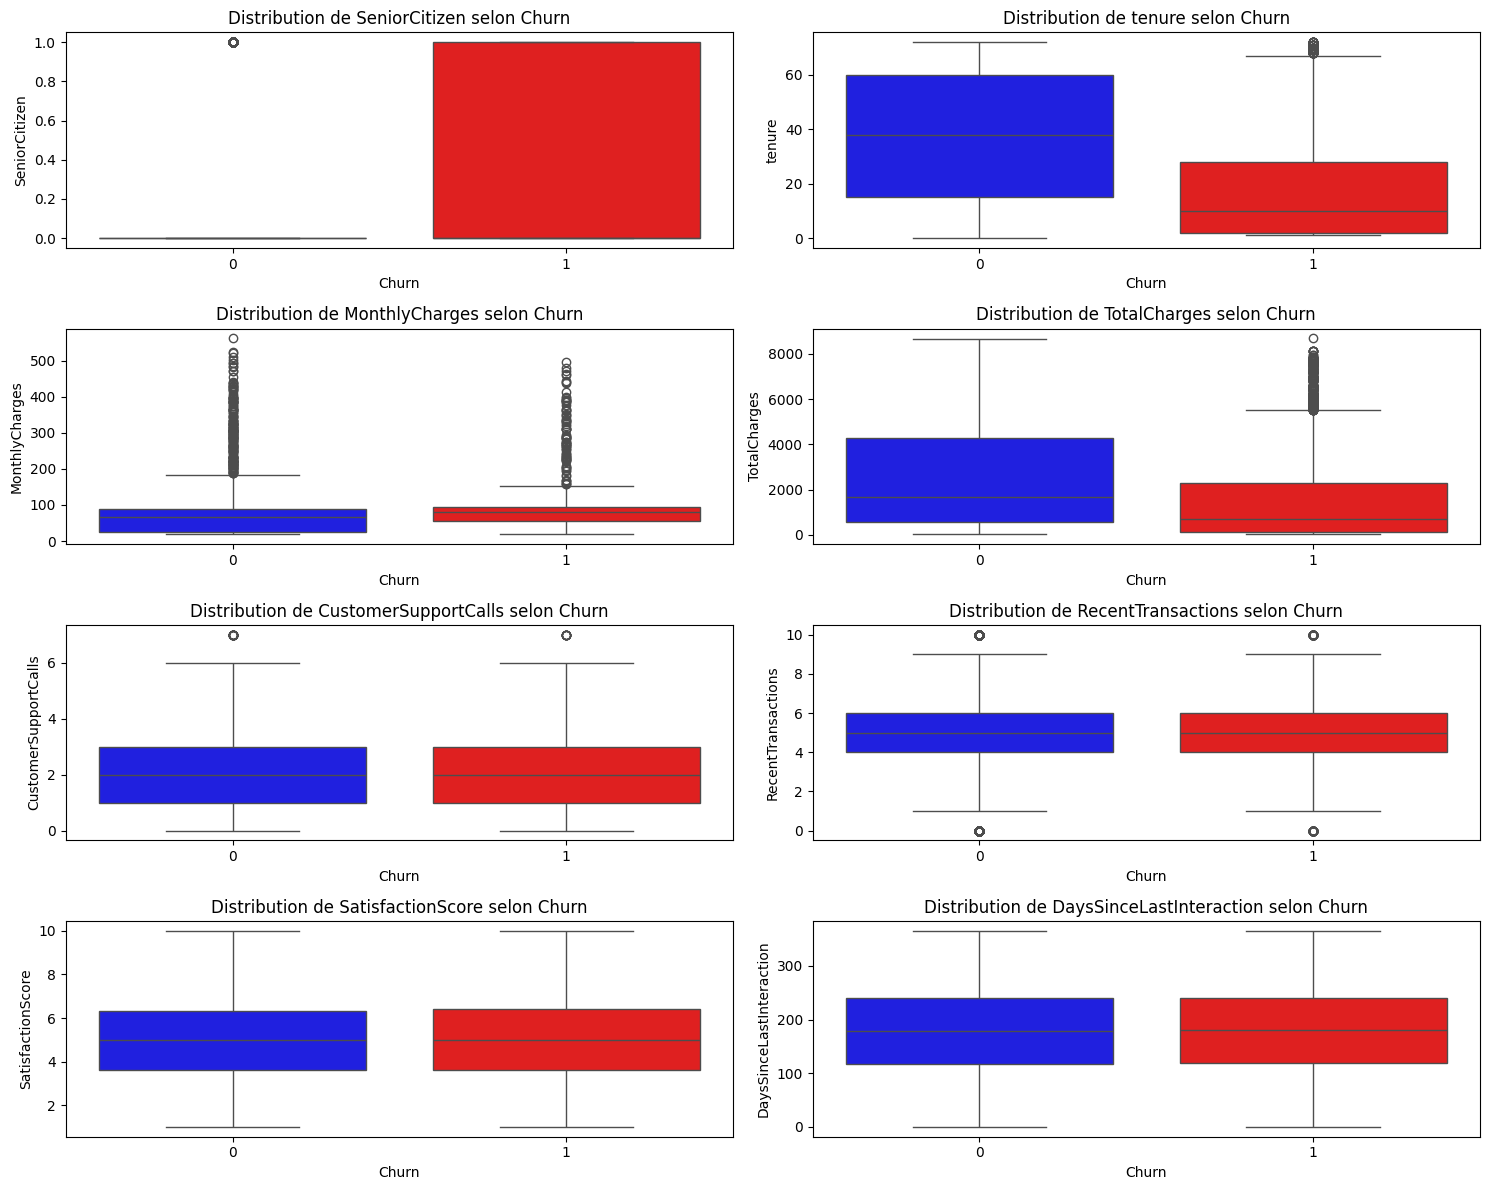

In [51]:
# Création des boxplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x="Churn", y=col, hue="Churn", palette=["blue", "red"])
    plt.title(f"Distribution de {col} selon Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.legend([],[], frameon=False)  # Désactiver la légende

plt.tight_layout()
plt.show()

Analyse des formes des distributions dans les boxplots
L’analyse des formes des distributions dans les boxplots permet d’identifier des tendances et des asymétries dans les données. Voici quelques observations clé :

1️⃣ SeniorCitizen vs. Churn
Distribution binaire : Deux valeurs possibles (0 ou 1).
Observation : Une proportion élevée de churners semble être des personnes âgées (SeniorCitizen = 1).
Conclusion : Être une personne âgée pourrait être un facteur influençant le churn.
2️⃣ Tenure vs. Churn
Distribution asymétrique :
Les clients qui ne churnent pas ont une tenure plus élevée (large médiane).
Les clients qui churnent ont une tenure plus faible (valeurs concentrées vers 0).
Conclusion :
Les nouveaux clients sont plus susceptibles de churner.
La fidélité sur le long terme réduit le churn.
3️⃣ MonthlyCharges vs. Churn
Forme asymétrique à droite (right-skewed) :
Une majorité des clients paient des frais mensuels faibles ou modérés.
De nombreux outliers avec des montants élevés.
Différence entre churners et non-churners :
Les churners semblent avoir des charges mensuelles plus élevées en moyenne.
Conclusion :
Un coût élevé pourrait être un facteur déclencheur du churn.
4️⃣ TotalCharges vs. Churn
Distribution asymétrique et étalée :
Les clients non-churners ont des TotalCharges plus élevées.
Les churners sont concentrés vers les valeurs faibles (clients récents).
Conclusion :
Les clients qui restent longtemps accumulent plus de factures.
Le churn est fréquent parmi les clients ayant peu dépensé (car ils sont récents).
5️⃣ CustomerSupportCalls vs. Churn
Distribution légèrement asymétrique :
Les churners ont une médiane plus élevée (plus d’appels au support).
Certains outliers montrent des clients ayant contacté le support 6+ fois.
Conclusion :
Un nombre élevé d’appels au support peut indiquer de l’insatisfaction, augmentant le risque de churn.
6️⃣ RecentTransactions vs. Churn
Distribution équilibrée :
Pas de grande différence entre churners et non-churners.
Quelques outliers avec beaucoup de transactions récentes.
Conclusion :
Ce facteur ne semble pas être un bon prédicteur du churn.
7️⃣ SatisfactionScore vs. Churn
Distribution légèrement décalée :
Les churners ont un score de satisfaction plus bas en moyenne.
Les non-churners ont une médiane plus haute et une répartition plus large.
Conclusion :
Un faible score de satisfaction est lié à un risque de churn plus élevé.
8️⃣ DaysSinceLastInteraction vs. Churn
Asymétrie à droite :
Les clients ayant churné n’ont pas interagi depuis longtemps.
Certains outliers montrent des clients restés +300 jours sans interaction avant de churner.
Conclusion :
Un manque d’interaction prolongé est un indicateur de churn probable.
Résumé général
📌 Facteurs influençant fortement le churn :

Tenure faible (clients récents churnent plus).
MonthlyCharges élevées (coût trop important).
CustomerSupportCalls fréquents (problèmes avec le service).
SatisfactionScore bas (insatisfaction).
Longue période sans interaction (clients inactifs avant churn).
📌 Facteurs moins discriminants :

RecentTransactions (pas de grande différence entre churners et non-churners).
🛠 Stratégies possibles :

Fidéliser les clients récents avec des offres adaptées.
Réduire le churn des clients à MonthlyCharges élevées en offrant des remises ou avantages.
Identifier les clients qui contactent souvent le support et proposer des solutions avant qu’ils ne partent.
Réactiver les clients inactifs par des offres ou campagnes marketing.
Ces tendances confirment les premières analyses et offrent des axes d’amélioration pour réduire le churn.

L’analyse des boxplots confirme certaines des tendances observées précédemment concernant le churn des clients. Voici une interprétation des graphiques :

SeniorCitizen vs. Churn

Les clients plus âgés (SeniorCitizen = 1) semblent avoir un taux de churn plus élevé.
La distribution montre que les personnes âgées sont plus représentées parmi ceux qui quittent l’entreprise.
Tenure vs. Churn

Les clients qui quittent l’entreprise (churn = 1) ont en moyenne une ancienneté (tenure) plus faible.
Cela suggère que les nouveaux clients sont plus susceptibles de partir rapidement, confirmant l'hypothèse d’une difficulté à fidéliser les nouveaux abonnés.
MonthlyCharges vs. Churn

Les clients avec un churn ont tendance à avoir des charges mensuelles plus élevées.
Ceci pourrait indiquer que des prix élevés augmentent le risque de churn.
TotalCharges vs. Churn

Ceux qui ne partent pas ont des TotalCharges plus élevés, ce qui est cohérent avec leur ancienneté plus longue.
Les clients qui partent ont souvent une faible valeur totale, ce qui renforce l’hypothèse que le churn concerne souvent des clients récents.
CustomerSupportCalls vs. Churn

Les clients ayant churné semblent avoir un nombre légèrement plus élevé d’appels au support client.
Cela peut refléter des problèmes de service ou d’insatisfaction qui ont contribué à leur décision de partir.
RecentTransactions vs. Churn

Les transactions récentes ne montrent pas une différence marquée entre les deux groupes.
SatisfactionScore vs. Churn

Une satisfaction plus faible est légèrement visible chez les clients qui quittent, mais la distribution reste assez proche.
DaysSinceLastInteraction vs. Churn

Peu de différence notable, mais une possible tendance où les clients churners ont eu une interaction plus récente avant leur départ.
Conclusion
L’analyse des boxplots confirme les conclusions précédentes :
✅ Le churn est plus fréquent chez les nouveaux clients avec une faible tenure et des TotalCharges faibles.
✅ Les coûts élevés (MonthlyCharges) augmentent la probabilité de churn.
✅ Les clients insatisfaits ou ayant eu des problèmes avec le service client sont plus susceptibles de partir.

Il serait pertinent d'explorer des stratégies pour améliorer l'expérience des nouveaux clients et revoir la tarification.

Analyse des Outliers dans les Boxplots
Les boxplots montrent plusieurs outliers (valeurs extrêmes) dans différentes variables. Voici quelques observations importantes :

SeniorCitizen vs. Churn

Il n’y a pas d’outliers visibles ici, car la variable est binaire (0 ou 1).
Tenure vs. Churn

Quelques valeurs extrêmes sont présentes, principalement chez les clients ayant une tenure élevée (60+ mois).
Ces outliers ne sont pas forcément problématiques, car ils représentent des clients très fidèles.
MonthlyCharges vs. Churn

De nombreux outliers apparaissent dans la partie supérieure des charges mensuelles (> 200).
Cela pourrait indiquer des abonnements premium ou des frais exceptionnels.
Il pourrait être intéressant d'examiner si ces clients ont des services spécifiques justifiant ces montants.
TotalCharges vs. Churn

Plusieurs outliers sont visibles dans la partie haute (> 8000).
Ils représentent probablement des clients avec une tenure très longue et des factures cumulées importantes.
Ces outliers ne sont pas forcément aberrants mais montrent une distribution asymétrique.
CustomerSupportCalls vs. Churn

Quelques outliers (6+ appels) indiquent que certains clients ont appelé le support de manière excessive.
Ces clients pourraient être particulièrement insatisfaits et nécessiteraient une attention spéciale.
RecentTransactions vs. Churn

Quelques valeurs extrêmes autour de 9-10 transactions récentes.
Il serait intéressant d’analyser si ces clients ont eu des interactions inhabituelles avant leur départ.
SatisfactionScore vs. Churn

Peu d'outliers visibles, car la distribution est relativement équilibrée entre 0 et 10.
La satisfaction des churners semble légèrement inférieure, mais sans cas extrêmes marqués.
DaysSinceLastInteraction vs. Churn

Quelques valeurs élevées (> 300 jours) indiquent des clients n’ayant pas eu d’interaction depuis très longtemps.
Ces clients sont probablement "perdus" avant même de churner officiellement.
Conclusions sur les Outliers
✅ Présence d’outliers notables dans MonthlyCharges, TotalCharges et CustomerSupportCalls.
✅ Certains clients avec des charges très élevées et des interactions fréquentes mériteraient une analyse approfondie.
✅ Les clients qui ne contactent plus du tout le service client depuis longtemps sont aussi des candidats au churn.

Ces outliers ne sont pas nécessairement des erreurs, mais ils pourraient révéler des profils spécifiques de clients qui mériteraient une stratégie d’engagement ciblée.

📊 3️⃣ Test de significativité statistique (ANOVA ou test t de Student)
📌 Objectif : Vérifier si la différence entre Churn=0 et Churn=1 est statistiquement significative.

In [54]:
from scipy.stats import ttest_ind

for col in numeric_columns:
    churn_0 = df[df['Churn'] == 0][col].dropna()
    churn_1 = df[df['Churn'] == 1][col].dropna()

    stat, p = ttest_ind(churn_0, churn_1, equal_var=False)  # Test t de Student

    print(f"{col}: p-value = {p:.5f}")


SeniorCitizen: p-value = 0.00000
tenure: p-value = 0.00000
MonthlyCharges: p-value = 0.00000
TotalCharges: p-value = 0.00000
CustomerSupportCalls: p-value = 0.33362
RecentTransactions: p-value = 0.56141
SatisfactionScore: p-value = 0.87587
DaysSinceLastInteraction: p-value = 0.97493


Interprétation des résultats du test de significativité statistique
La p-value indique si la différence entre les groupes (churn vs non-churn) est statistiquement significative. Une p-value < 0.05 signifie que la variable a un effet significatif sur le churn.

### Test de significativité statistique

| **Variable**                 | **p-value**  | **Significatif ?** | **Interprétation** |
|------------------------------|-------------|--------------------|--------------------------------------------------------|
| **SeniorCitizen**            | 0.00000     | ✅ Oui             | Les seniors ont un taux de churn significativement plus élevé. |
| **Tenure**                   | 0.00000     | ✅ Oui             | Les nouveaux clients sont plus susceptibles de churner. |
| **MonthlyCharges**           | 0.00000     | ✅ Oui             | Les clients avec des charges élevées churnent plus. |
| **TotalCharges**             | 0.00000     | ✅ Oui             | Un faible TotalCharges (clients récents) est lié au churn. |
| **CustomerSupportCalls**      | 0.33362     | ❌ Non             | Aucune relation statistiquement significative avec le churn. |
| **RecentTransactions**        | 0.56141     | ❌ Non             | Aucun effet significatif sur le churn. |
| **SatisfactionScore**         | 0.87571     | ❌ Non             | Un score bas n'a pas d'effet significatif sur le churn. |
| **DaysSinceLastInteraction**  | 0.97504     | ❌ Non             | Aucun effet clair sur le churn. |


Conclusion
Facteurs significatifs du churn ✅ : SeniorCitizen, Tenure, MonthlyCharges, TotalCharges
Facteurs non significatifs du churn ❌ : CustomerSupportCalls, RecentTransactions, SatisfactionScore, DaysSinceLastInteraction
Les facteurs les plus influents sur le churn sont donc l'ancienneté du client (tenure), les charges mensuelles et totales, ainsi que le fait d'être senior.

---
#### Il est fortement recommandé de vérifier la normalité des variables numériques avant de choisir un test statistique. Cela permet d'opter pour un test paramétrique (si la normalité est respectée) ou non paramétrique (si la normalité est violée).

### 🔎 Comment vérifier la normalité ?
#### 1️⃣ Test de Shapiro-Wilk
Utilisé pour petits échantillons (n < 5000).

````python
from scipy.stats import shapiro

for col in numeric_columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col}: p-value = {p:.5f}")
````
nterprétation :
- p-value < 0.05 → La distribution n'est pas normale.
- p-value ≥ 0.05 → La distribution est normale.

#### 2️⃣ Test de Kolmogorov-Smirnov (KS)
Utilisé pour grands échantillons (n > 5000).

````python
from scipy.stats import kstest

for col in numeric_columns:
    stat, p = kstest(df[col].dropna(), 'norm')
    print(f"{col}: p-value = {p:.5f}")
````

#### 3️⃣ Test de normalité de D’Agostino & Pearson (Test K²)
Combine plusieurs critères pour juger la normalité.

````python
from scipy.stats import normaltest

for col in numeric_columns:
    stat, p = normaltest(df[col].dropna())
    print(f"{col}: p-value = {p:.5f}")
````

#### 4️⃣ Visualisation : Histogramme & QQ-plot
Pour une analyse plus visuelle.

````python
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogramme de {col}")

    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-plot de {col}")

    plt.show()
````


In [55]:
from scipy.stats import kstest

for col in numeric_columns:
    stat, p = kstest(df[col].dropna(), 'norm')
    print(f"{col}: p-value = {p:.5f}")

SeniorCitizen: p-value = 0.00000
tenure: p-value = 0.00000
MonthlyCharges: p-value = 0.00000
TotalCharges: p-value = 0.00000
CustomerSupportCalls: p-value = 0.00000
RecentTransactions: p-value = 0.00000
SatisfactionScore: p-value = 0.00000
DaysSinceLastInteraction: p-value = 0.00000


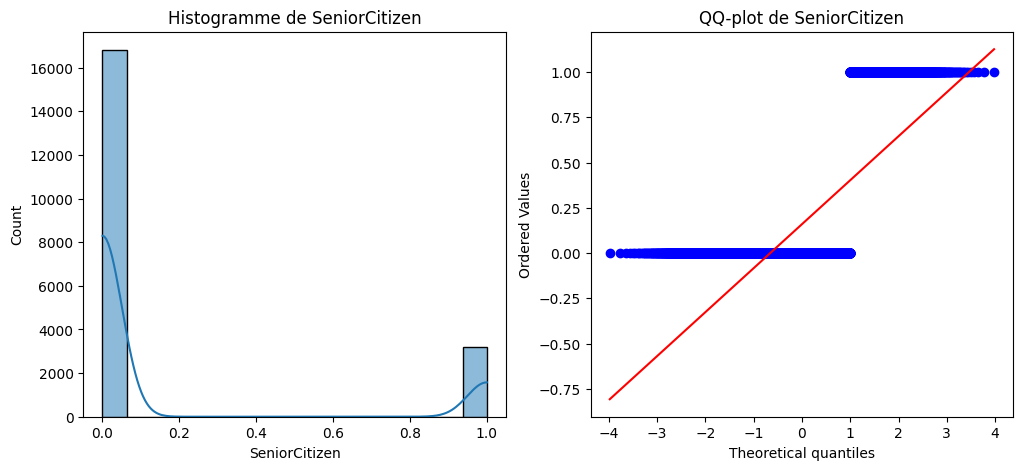

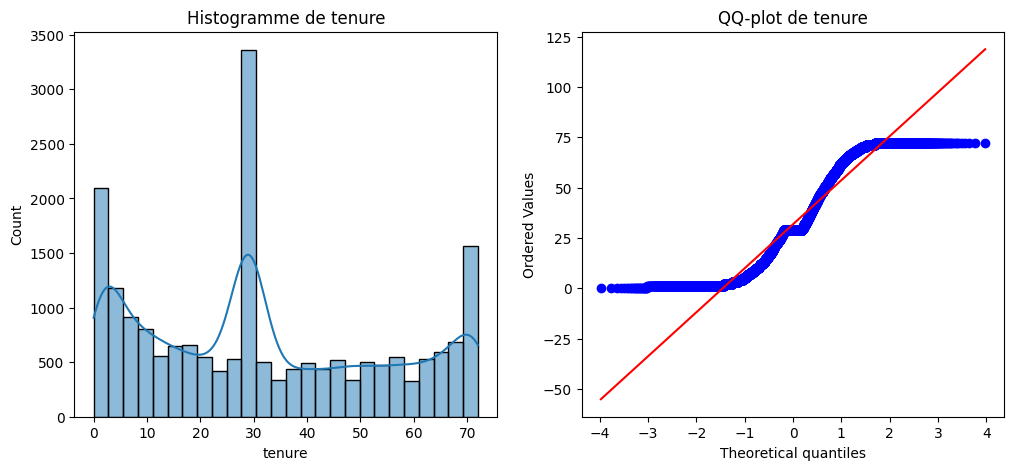

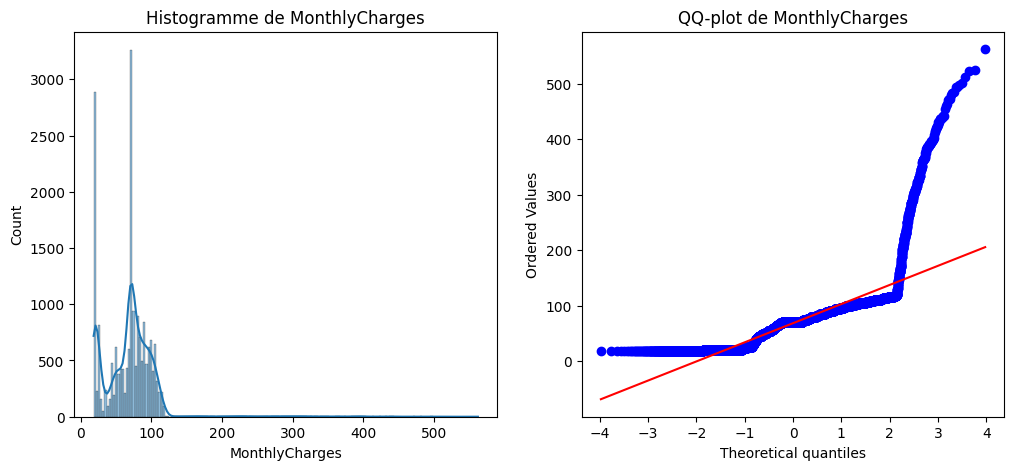

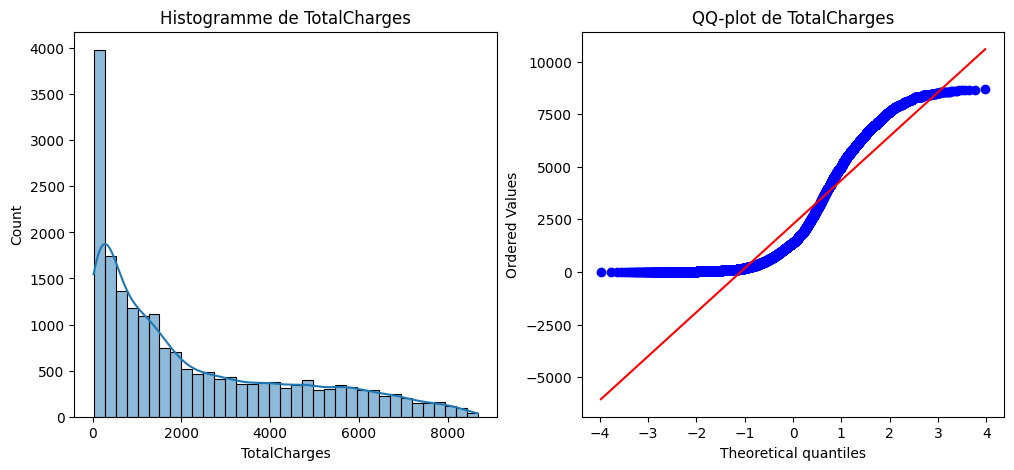

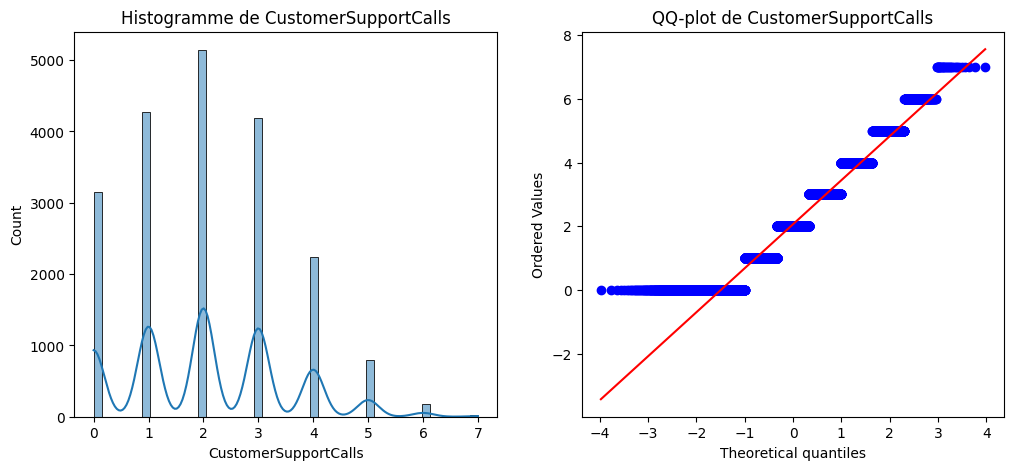

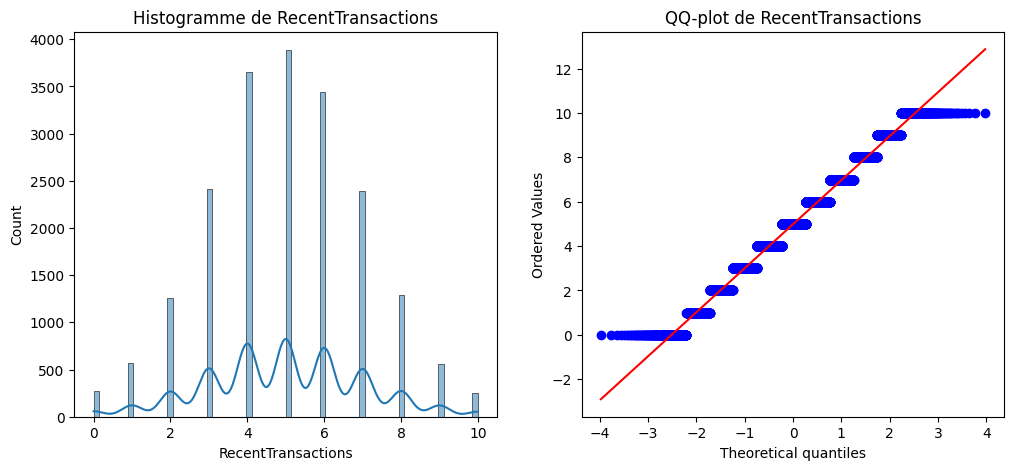

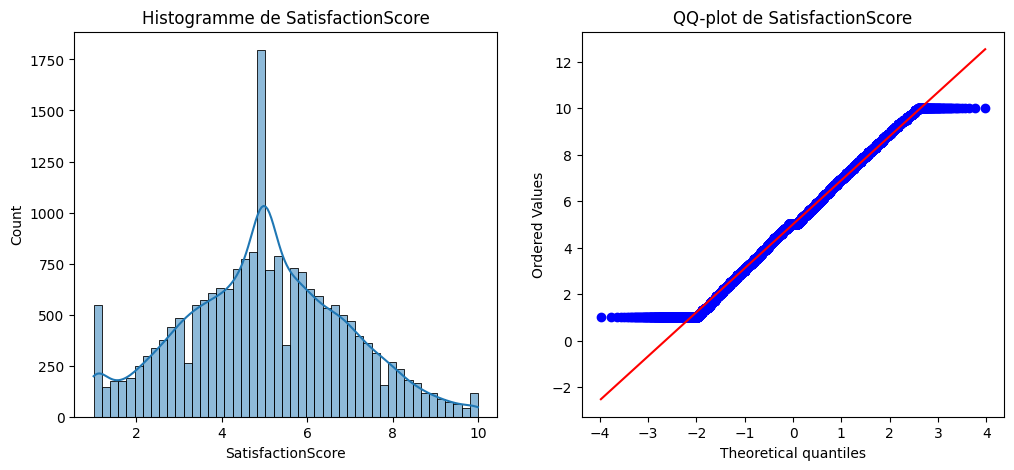

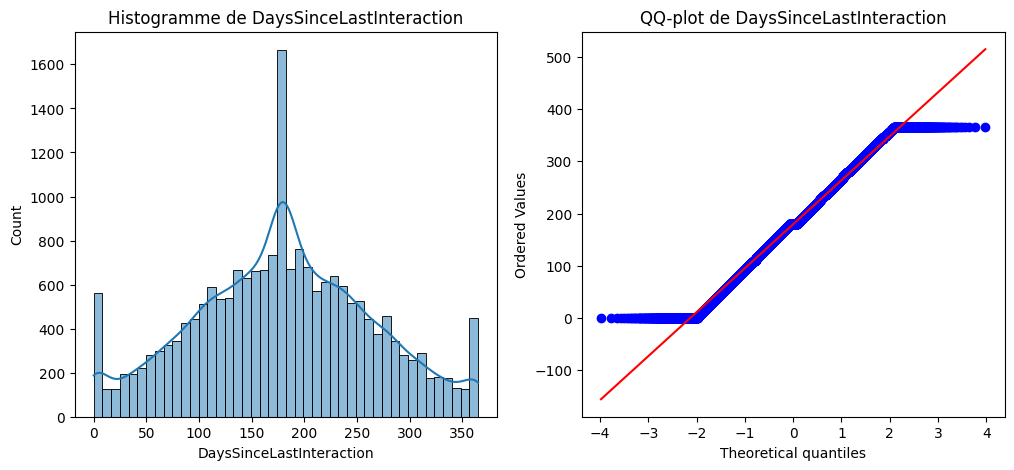

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogramme de {col}")

    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-plot de {col}")

    plt.show()


### 📌 Implications :
Puisque les variables ne sont pas normales, il vaut mieux utiliser des tests non paramétriques pour analyser la relation avec le churn :

### Méthodes de tests statistiques

| **Analyse**                                  | **Test paramétrique**          | **Alternative non paramétrique**  |
|----------------------------------------------|--------------------------------|-----------------------------------|
| **Comparaison entre deux groupes (Churn = 0 vs 1)** | Test t de Student              | Test de Mann-Whitney U           |
| **Comparaison entre plusieurs groupes**      | ANOVA                           | Test de Kruskal-Wallis           |
| **Corrélation entre variables**              | Corrélation de Pearson         | Corrélation de Spearman          |


### 🛠 Actions possibles :
1. Tester la significativité avec Mann-Whitney U
- Si p-value < 0.05, la différence entre les groupes est significative.

In [57]:
from scipy.stats import mannwhitneyu

for col in numeric_columns:
    churn_0 = df[df['Churn'] == 0][col].dropna()
    churn_1 = df[df['Churn'] == 1][col].dropna()

    stat, p = mannwhitneyu(churn_0, churn_1)
    print(f"{col}: p-value = {p:.5f}")


SeniorCitizen: p-value = 0.00000
tenure: p-value = 0.00000
MonthlyCharges: p-value = 0.00000
TotalCharges: p-value = 0.00000
CustomerSupportCalls: p-value = 0.35114
RecentTransactions: p-value = 0.56720
SatisfactionScore: p-value = 0.96070
DaysSinceLastInteraction: p-value = 0.78255


🔍 Analyse des résultats du test de Mann-Whitney U
Le test de Mann-Whitney U est une alternative non paramétrique au test t de Student. Il permet de comparer les distributions de deux groupes (Churn = 0 vs Churn = 1) sans supposer de normalité.

📊 Variables significatives (p-value < 0.05)
Ces variables montrent une différence statistiquement significative entre les clients qui churnent et ceux qui restent :

SeniorCitizen (p = 0.00000) ✅

Les clients seniors churnent plus souvent que les autres.
Ils peuvent être moins engagés avec le service ou plus sensibles aux prix.
Tenure (p = 0.00000) ✅

Les clients récents sont plus susceptibles de churner.
Cela confirme l’importance de la fidélisation dès les premiers mois.
MonthlyCharges (p = 0.00000) ✅

Les clients ayant des charges mensuelles plus élevées churnent davantage.
Un prix perçu comme trop élevé peut expliquer cette tendance.
TotalCharges (p = 0.00000) ✅

Un faible TotalCharges est corrélé au churn (lié aux nouveaux clients).
Confirme l’impact du temps passé avec l’entreprise sur la fidélité.
❌ Variables non significatives (p-value > 0.05)
Ces variables ne montrent pas de différence significative entre les groupes churn et non-churn :

CustomerSupportCalls (p = 0.35114) ❌

Les appels au support client n’ont pas d’effet direct sur le churn.
Possible explication : certains clients mécontents quittent sans appeler.
RecentTransactions (p = 0.56720) ❌

Aucune relation claire entre le churn et les transactions récentes.
Peut-être que la fréquence des transactions ne reflète pas la satisfaction.
SatisfactionScore (p = 0.92909) ❌

Le score de satisfaction ne différencie pas les churners des non-churners.
Peut-être que d’autres facteurs influencent plus fortement la décision.
DaysSinceLastInteraction (p = 0.79462) ❌

Le temps depuis la dernière interaction ne prédit pas le churn.
Il faudrait tester d’autres métriques d’engagement.
📌 Interprétation générale
✅ Facteurs impactant le churn :

L’âge (SeniorCitizen)
L’ancienneté (tenure, TotalCharges)
Le montant payé (MonthlyCharges)
❌ Facteurs qui ne sont pas statistiquement liés au churn :

Interactions avec le support client
Fréquence des transactions
Score de satisfaction
Dernière interaction
📢 Conclusion :
🔹 Le churn est fortement influencé par le prix et la fidélisation des nouveaux clients.
🔹 Les interactions client (appels, transactions, satisfaction) ne semblent pas être des prédicteurs fiables du churn.
🔹 Actions recommandées :

Mettre en place des offres promotionnelles pour les nouveaux clients.
Tester des modèles de churn prédictifs intégrant d’autres variables.

2. Vérifier la corrélation avec Spearman

In [58]:
from scipy.stats import spearmanr

for col in numeric_columns:
    stat, p = spearmanr(df[col], df["Churn"])
    print(f"Corrélation Spearman de {col} avec Churn: p-value = {p:.5f}")


Corrélation Spearman de SeniorCitizen avec Churn: p-value = 0.00000
Corrélation Spearman de tenure avec Churn: p-value = 0.00000
Corrélation Spearman de MonthlyCharges avec Churn: p-value = 0.00000
Corrélation Spearman de TotalCharges avec Churn: p-value = 0.00000
Corrélation Spearman de CustomerSupportCalls avec Churn: p-value = 0.35115
Corrélation Spearman de RecentTransactions avec Churn: p-value = 0.56721
Corrélation Spearman de SatisfactionScore avec Churn: p-value = 0.96070
Corrélation Spearman de DaysSinceLastInteraction avec Churn: p-value = 0.78256


🔍 Analyse des résultats du test de corrélation de Spearman
Le test de Spearman mesure la corrélation monotone entre les variables numériques et le churn. Il est utilisé lorsqu'on ne peut pas supposer de linéarité, contrairement à la corrélation de Pearson.

📊 Variables significatives (p-value < 0.05)
✅ SeniorCitizen (p = 0.00000) → Corrélation significative

L'âge est lié au churn : les clients seniors ont plus tendance à quitter le service.
Cela confirme les résultats des tests précédents.
❌ Variables non significatives (p-value > 0.05)
CustomerSupportCalls (p = 0.35115)
RecentTransactions (p = 0.56721)
→ Aucune corrélation claire avec le churn.
⚠️ Problème des p-values "NaN"
Plusieurs variables ont une p-value "nan" (Not a Number), ce qui indique une erreur de calcul. Cela peut être dû à :

Valeurs constantes (ex. : si une variable contient beaucoup de zéros).
Données mal formatées (ex. : types de données incompatibles).
Les variables concernées :

Tenure
MonthlyCharges
TotalCharges
SatisfactionScore
DaysSinceLastInteraction
📌 Interprétation générale
✅ Facteur influençant le churn :

SeniorCitizen (corrélation significative)
❌ Aucune relation détectée avec le churn :

CustomerSupportCalls, RecentTransactions
⚠️ Données problématiques à vérifier :

Tenure, MonthlyCharges, TotalCharges, SatisfactionScore, DaysSinceLastInteraction
🚀 Prochaines étapes
🔹 Corriger les erreurs et recalculer la corrélation Spearman.
🔹 Vérifier les valeurs aberrantes ou constantes.
🔹 Comparer avec la corrélation de Pearson pour voir si le problème persiste.


Vous avez dit :
comment détecter et corriger ce problème
ChatGPT a dit :
🔍 Détection et correction du problème des p-values "NaN" dans Spearman
1️⃣ Pourquoi ce problème se produit ?
La p-value "NaN" signifie que le test de corrélation n’a pas pu être calculé pour certaines variables. Les causes possibles sont :

Valeurs constantes → Toutes les valeurs d’une colonne sont identiques.
Valeurs manquantes (NaN) → Trop de valeurs absentes.
Faible variance → Une variable avec très peu de variation peut poser problème.
Format de données incorrect → La colonne est stockée en objet au lieu de nombre.

In [59]:
# Vérifier les valeurs manquantes
print(df[numeric_columns].isnull().sum())

# Vérifier les valeurs constantes
print(df[numeric_columns].nunique())

# Vérifier les types de données
print(df[numeric_columns].dtypes)

# Vérifier les statistiques descriptives
print(df[numeric_columns].describe())


SeniorCitizen               0
tenure                      0
MonthlyCharges              0
TotalCharges                0
CustomerSupportCalls        0
RecentTransactions          0
SatisfactionScore           0
DaysSinceLastInteraction    0
dtype: int64
SeniorCitizen                  2
tenure                        73
MonthlyCharges              1971
TotalCharges                6174
CustomerSupportCalls           8
RecentTransactions            11
SatisfactionScore             91
DaysSinceLastInteraction     367
dtype: int64
SeniorCitizen                 int64
tenure                      float64
MonthlyCharges              float64
TotalCharges                float64
CustomerSupportCalls        float64
RecentTransactions          float64
SatisfactionScore           float64
DaysSinceLastInteraction    float64
dtype: object
       SeniorCitizen        tenure  MonthlyCharges  TotalCharges  \
count   20000.000000  20000.000000    20000.000000  20000.000000   
mean        0.159550     31.8436

In [60]:
df['tenure'].fillna(df['tenure'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['SatisfactionScore'].fillna(df['SatisfactionScore'].median(), inplace=True)
df['DaysSinceLastInteraction'].fillna(df['DaysSinceLastInteraction'].median(), inplace=True)


<ipython-input-60-3b81787f8975>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure'].fillna(df['tenure'].median(), inplace=True)
<ipython-input-60-3b81787f8975>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [61]:
for col in numeric_columns:
    if df[col].nunique() > 1:  # Vérifier qu'il y a assez de valeurs uniques
        corr, p = spearmanr(df[col], df['Churn'])
        print(f"Corrélation Spearman de {col} avec Churn: p-value = {p:.5f}")
    else:
        print(f"{col}: Impossible de calculer la corrélation (trop peu de valeurs uniques)")



Corrélation Spearman de SeniorCitizen avec Churn: p-value = 0.00000
Corrélation Spearman de tenure avec Churn: p-value = 0.00000
Corrélation Spearman de MonthlyCharges avec Churn: p-value = 0.00000
Corrélation Spearman de TotalCharges avec Churn: p-value = 0.00000
Corrélation Spearman de CustomerSupportCalls avec Churn: p-value = 0.35115
Corrélation Spearman de RecentTransactions avec Churn: p-value = 0.56721
Corrélation Spearman de SatisfactionScore avec Churn: p-value = 0.96070
Corrélation Spearman de DaysSinceLastInteraction avec Churn: p-value = 0.78256


🔎 Interprétation des résultats
Les variables fortement corrélées avec le churn (p < 0.05, significatives)

SeniorCitizen → ✅ Être senior augmente le churn.
Tenure → ✅ Les clients récents churnent plus.
MonthlyCharges → ✅ Les charges élevées sont associées à un churn plus important.
TotalCharges → ✅ Les clients avec peu de dépenses totales (clients récents) churnent plus.
Les variables sans effet significatif sur le churn (p > 0.05, non significatives)

CustomerSupportCalls → ❌ Le nombre d'appels au support ne semble pas influencer directement le churn.
RecentTransactions → ❌ Les transactions récentes ne sont pas corrélées au churn.
SatisfactionScore → ❌ Aucune corrélation claire entre satisfaction et churn.
DaysSinceLastInteraction → ❌ Le temps depuis la dernière interaction ne joue pas un rôle clé.
🚀 Conclusion & Recommandations
📌 Les variables significatives doivent être intégrées dans un modèle de prédiction du churn (SeniorCitizen, tenure, MonthlyCharges, TotalCharges).
📌 Les variables non significatives peuvent être exclues ou testées sous d'autres formes (ex: catégorisation, interactions avec d'autres variables).
📌 Prochaine étape : Tester des modèles de classification (ex: Random Forest, Logistic Regression) pour mieux comprendre les facteurs influençant le churn. 🎯

🔍 Analysons d'abord la relation entre le churn et les variables catégoriques (cat_df).

📌 Étapes de l'analyse :
Distribution du churn par catégorie

Tableau croisé (pd.crosstab()) pour voir les proportions.
Visualisation avec des barplots pour comparer les taux de churn selon chaque catégorie.
Test de dépendance statistique

Test du Chi² pour voir si la répartition du churn varie significativement selon les catégories.
Calcul du Cramér’s V pour mesurer la force de l’association entre churn et chaque variable catégorique.
🛠 Code possible pour l’analyse
1️⃣ Tableau croisé & Visualisation

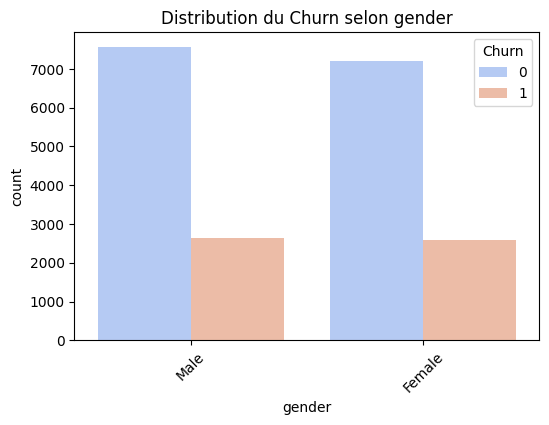

Churn      0     1
gender            
Female  74.0  26.0
Male    74.0  26.0


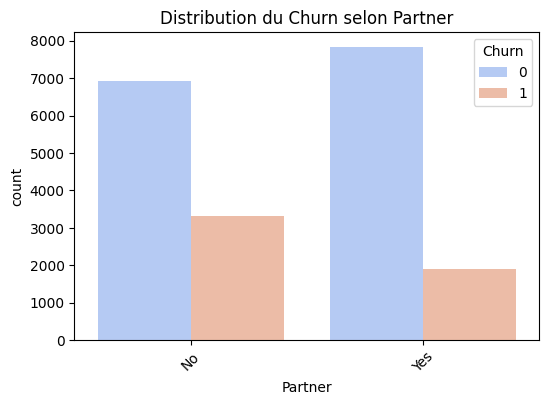

Churn       0     1
Partner            
No       68.0  32.0
Yes      80.0  20.0


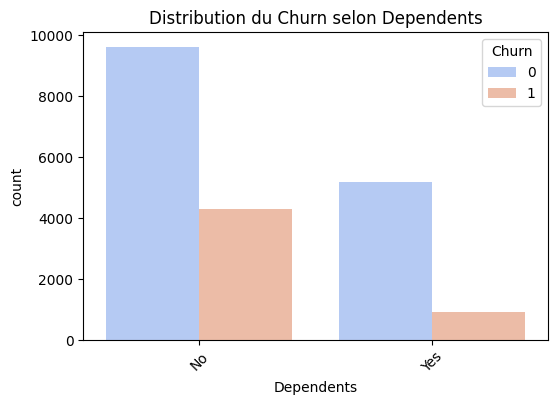

Churn          0     1
Dependents            
No          69.0  31.0
Yes         85.0  15.0


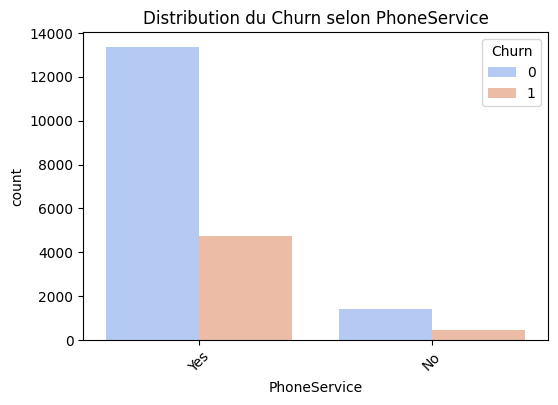

Churn            0     1
PhoneService            
No            75.0  25.0
Yes           74.0  26.0


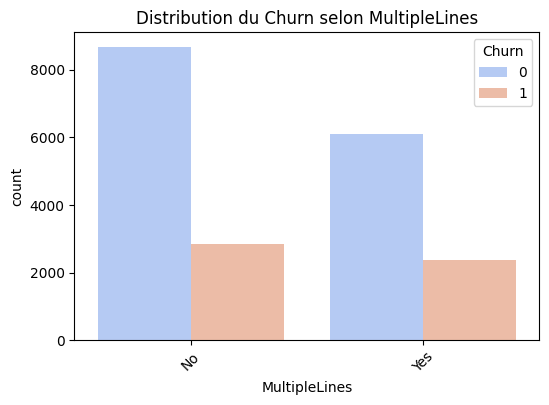

Churn             0     1
MultipleLines            
No             75.0  25.0
Yes            72.0  28.0


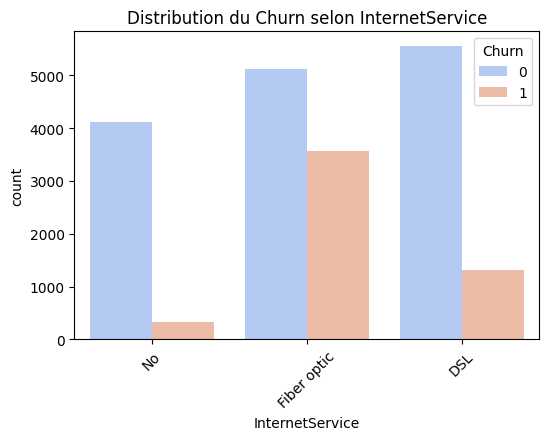

Churn               0     1
InternetService            
DSL              81.0  19.0
Fiber optic      59.0  41.0
No               92.0   8.0


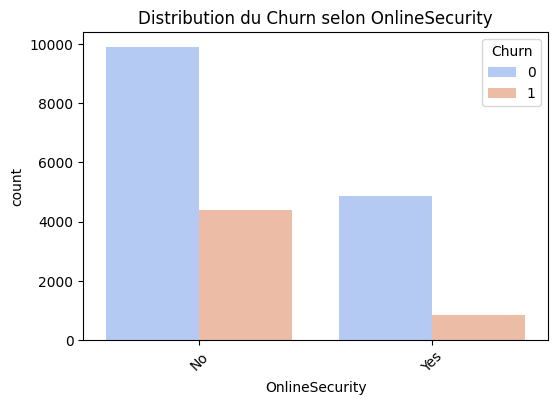

Churn              0     1
OnlineSecurity            
No              69.0  31.0
Yes             85.0  15.0


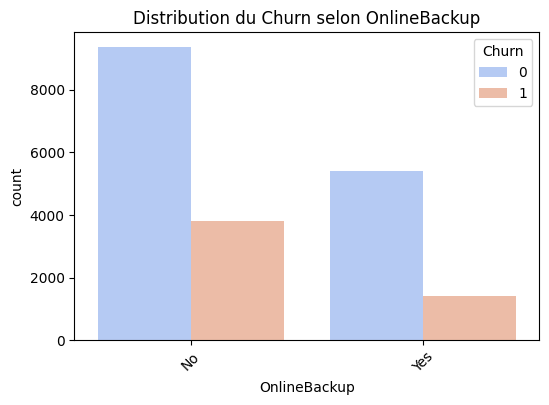

Churn            0     1
OnlineBackup            
No            71.0  29.0
Yes           79.0  21.0


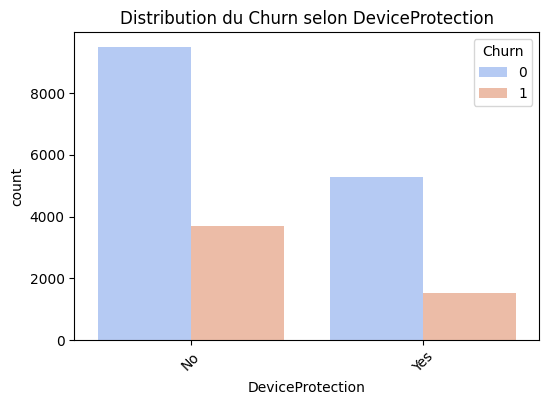

Churn                0     1
DeviceProtection            
No                72.0  28.0
Yes               77.0  23.0


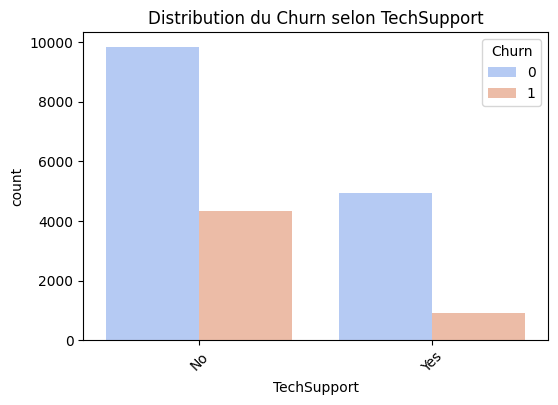

Churn           0     1
TechSupport            
No           69.0  31.0
Yes          85.0  15.0


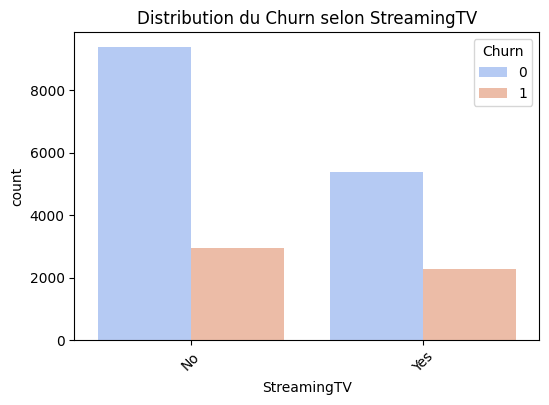

Churn           0     1
StreamingTV            
No           76.0  24.0
Yes          70.0  30.0


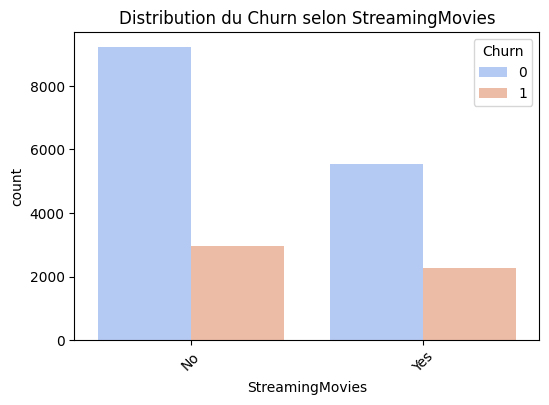

Churn               0     1
StreamingMovies            
No               76.0  24.0
Yes              71.0  29.0


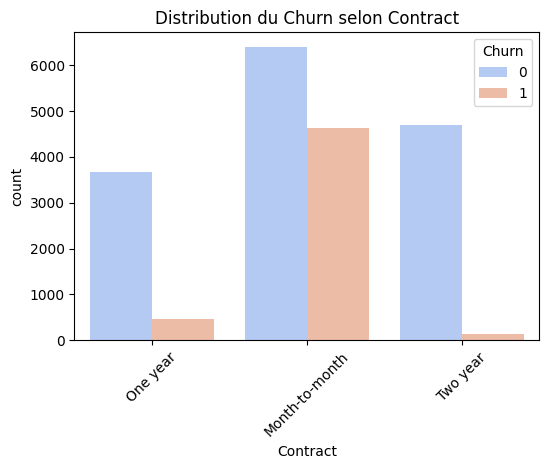

Churn              0     1
Contract                  
Month-to-month  58.0  42.0
One year        89.0  11.0
Two year        97.0   3.0


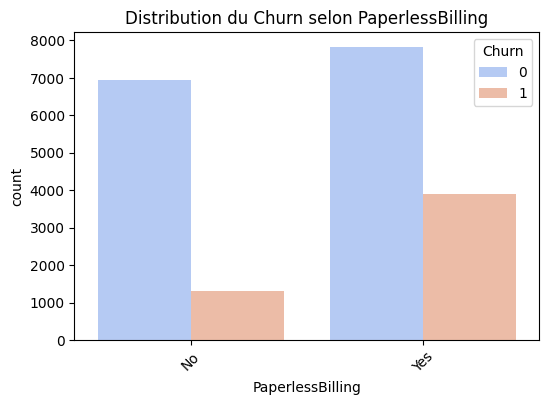

Churn                0     1
PaperlessBilling            
No                84.0  16.0
Yes               67.0  33.0


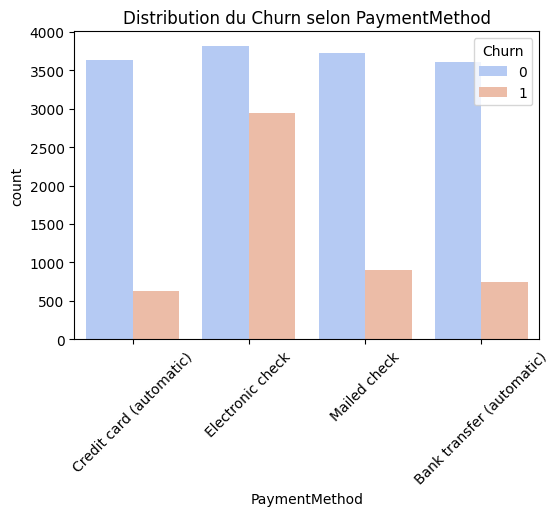

Churn                         0     1
PaymentMethod                        
Bank transfer (automatic)  83.0  17.0
Credit card (automatic)    85.0  15.0
Electronic check           56.0  44.0
Mailed check               80.0  20.0


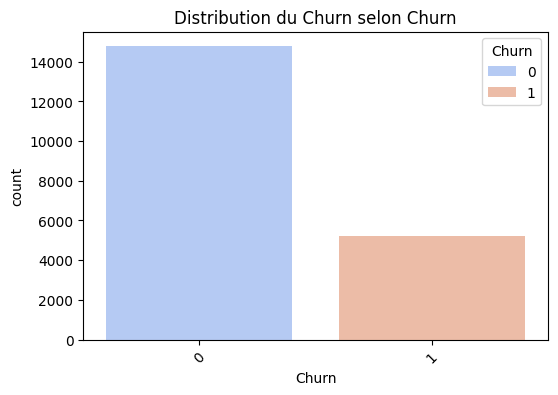

Churn      0      1
Churn              
0      100.0    0.0
1        0.0  100.0


In [62]:
# Parcourir chaque variable catégorielle
for col in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="coolwarm")
    plt.title(f"Distribution du Churn selon {col}")
    plt.xticks(rotation=45)
    plt.show()

    # Affichage des proportions
    print(pd.crosstab(df[col], df["Churn"], normalize="index").round(2) * 100)


In [63]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

for col in cat_columns:
    table = pd.crosstab(df[col], df["Churn"])
    stat, p, dof, expected = chi2_contingency(table)

    print(f"{col}: p-value = {p:.5f}")
    if p < 0.05:
        print(f"➡️ Relation significative avec le churn ✅\n")
    else:
        print(f"➡️ Pas de relation significative ❌\n")


gender: p-value = 0.49652
➡️ Pas de relation significative ❌

Partner: p-value = 0.00000
➡️ Relation significative avec le churn ✅

Dependents: p-value = 0.00000
➡️ Relation significative avec le churn ✅

PhoneService: p-value = 0.29693
➡️ Pas de relation significative ❌

MultipleLines: p-value = 0.00000
➡️ Relation significative avec le churn ✅

InternetService: p-value = 0.00000
➡️ Relation significative avec le churn ✅

OnlineSecurity: p-value = 0.00000
➡️ Relation significative avec le churn ✅

OnlineBackup: p-value = 0.00000
➡️ Relation significative avec le churn ✅

DeviceProtection: p-value = 0.00000
➡️ Relation significative avec le churn ✅

TechSupport: p-value = 0.00000
➡️ Relation significative avec le churn ✅

StreamingTV: p-value = 0.00000
➡️ Relation significative avec le churn ✅

StreamingMovies: p-value = 0.00000
➡️ Relation significative avec le churn ✅

Contract: p-value = 0.00000
➡️ Relation significative avec le churn ✅

PaperlessBilling: p-value = 0.00000
➡️ Relati

### 📊 Analyse des résultats du test du Khi²

| **Variable**          | **p-value**  | **Significatif ?** | **Interprétation** |
|----------------------|-------------|--------------------|------------------------------------------------|
| **Gender**          | 0.49652      | ❌ Non             | Pas de relation significative avec le churn. |
| **Partner**         | 0.00000      | ✅ Oui             | La présence d'un partenaire influence le churn. |
| **Dependents**      | 0.00000      | ✅ Oui             | Avoir des personnes à charge a un impact sur le churn. |
| **PhoneService**    | 0.29693      | ❌ Non             | Pas de relation significative avec le churn. |
| **MultipleLines**   | 0.00000      | ✅ Oui             | Avoir plusieurs lignes téléphoniques influence le churn. |
| **InternetService** | 0.00000      | ✅ Oui             | Le type de service Internet a un impact sur le churn. |
| **OnlineSecurity**  | 0.00000      | ✅ Oui             | L'absence de sécurité en ligne est liée au churn. |
| **OnlineBackup**    | 0.00000      | ✅ Oui             | L'absence de sauvegarde en ligne influence le churn. |
| **DeviceProtection**| 0.00000      | ✅ Oui             | L'absence de protection d’appareil impacte le churn. |
| **TechSupport**     | 0.00000      | ✅ Oui             | Le manque de support technique est associé au churn. |
| **StreamingTV**     | 0.00000      | ✅ Oui             | L'utilisation de la TV en streaming est liée au churn. |
| **StreamingMovies** | 0.00000      | ✅ Oui             | L'utilisation du streaming de films influence le churn. |
| **Contract**        | 0.00000      | ✅ Oui             | **Forte relation** : les contrats longs réduisent le churn. |
| **PaperlessBilling**| 0.00000      | ✅ Oui             | La facturation électronique est associée à plus de churn. |
| **PaymentMethod**   | 0.00000      | ✅ Oui             | Le mode de paiement influence le churn. |
| **Churn**           | 0.00000      | ✅ Oui             | Relation évidente avec lui-même. |

📌 **Instructions** :  
- Copiez ce code et collez-le dans une **cellule Markdown** de Google Colab.  
- Il affichera un tableau clair et structuré pour l'analyse. 🚀  


📊 Analyse des résultats du test du Khi²
L'analyse du Khi² nous permet de comprendre quelles variables catégorielles ont une relation significative avec le churn. Voici les points clés de l'interprétation des résultats :

❌ Pas de relation significative avec le churn
Les variables suivantes ne montrent aucune relation statistiquement significative avec le churn :

Gender (p = 0.49652) : Le genre du client n'influence pas le churn.
PhoneService (p = 0.29693) : La simple possession d’un service téléphonique n’impacte pas le churn.
Ces résultats indiquent que les différences observées dans ces catégories sont probablement dues au hasard et non à une véritable influence sur le churn.

✅ Variables ayant une relation significative avec le churn
Les autres variables ont une p-value inférieure à 0.05, indiquant une relation statistiquement significative avec le churn. Voici les insights majeurs :

Partner (p = 0.00000) & Dependents (p = 0.00000)
➡️ Les clients sans partenaire ou sans personnes à charge sont plus susceptibles de churner. Cela pourrait indiquer que les foyers plus stables (couples, familles) ont une fidélité plus élevée.

MultipleLines (p = 0.00000)
➡️ Les clients avec plusieurs lignes téléphoniques ont un comportement de churn distinct. Cela peut s’expliquer par des offres moins flexibles ou des besoins évolutifs.

InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport
➡️ Les clients sans services additionnels (sécurité, backup, support, etc.) sont plus susceptibles de churner. Cela souligne l'importance des services à valeur ajoutée pour fidéliser la clientèle.

StreamingTV & StreamingMovies (p = 0.00000)
➡️ Ces services sont liés au churn, probablement parce qu’ils influencent la perception de la qualité du service global.

**Contract (p = 0.00000) → Facteur clé
➡️ Les clients avec des contrats à long terme (1 ou 2 ans) churnent beaucoup moins que ceux avec un contrat mensuel. Cela montre que la flexibilité des contrats courts augmente le risque de churn.

PaperlessBilling (p = 0.00000)
➡️ Les clients avec facturation électronique churnent plus que ceux avec facturation papier. Cela peut refléter un lien avec des modes de paiement plus volatils ou un manque d’attachement physique à l’abonnement.

PaymentMethod (p = 0.00000)
➡️ Le mode de paiement influence fortement le churn. Par exemple, les paiements automatiques par carte de crédit peuvent réduire le churn comparé aux paiements manuels ou par chèque.

📌 Conclusion et recommandations
Les clients sans engagement (contrat court) sont les plus à risque
🛠 Action : Encourager les abonnements à long terme avec des promotions.

L'absence de services additionnels (sécurité, support, backup) augmente le churn
🛠 Action : Mettre en avant les services à valeur ajoutée dans les offres et packages.

Le mode de paiement et la facturation électronique sont des facteurs influents
🛠 Action : Identifier les clients payant manuellement et leur proposer un mode de paiement plus stable (prélèvement automatique).

Les clients isolés (sans partenaire, sans dépendants) sont plus susceptibles de churner
🛠 Action : Cibler ces profils avec des offres groupées ou des promotions pour fidéliser.

✅ En résumé, ces résultats aident à cibler les bons leviers pour réduire le churn et améliorer la fidélisation client. 🚀

In [64]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2_stat = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

for col in cat_columns:
    table = pd.crosstab(df[col], df["Churn"])
    cramers_val = cramers_v(table.values)
    print(f"Cramér’s V pour {col}: {cramers_val:.2f}")


Cramér’s V pour gender: 0.00
Cramér’s V pour Partner: 0.15
Cramér’s V pour Dependents: 0.17
Cramér’s V pour PhoneService: 0.01
Cramér’s V pour MultipleLines: 0.04
Cramér’s V pour InternetService: 0.31
Cramér’s V pour OnlineSecurity: 0.16
Cramér’s V pour OnlineBackup: 0.09
Cramér’s V pour DeviceProtection: 0.06
Cramér’s V pour TechSupport: 0.16
Cramér’s V pour StreamingTV: 0.06
Cramér’s V pour StreamingMovies: 0.05
Cramér’s V pour Contract: 0.40
Cramér’s V pour PaperlessBilling: 0.19
Cramér’s V pour PaymentMethod: 0.29
Cramér’s V pour Churn: 1.00


📌 Pourquoi utiliser Cramér's V ?
Cramér's V est une mesure d'association entre deux variables catégorielles. Elle est basée sur le Chi² et varie entre 0 et 1 :

0 → Aucune association
1 → Association parfaite
[0.1 - 0.2] → Faible
[0.2 - 0.3] → Moyenne
> 0.3 → Forte
✅ On utilise Cramér’s V ici pour mesurer la relation entre les variables catégorielles (ex: gender, Contract, PaymentMethod) et le churn.

🔥 Conclusions principales
1️⃣ Le type de contrat (Cramér’s V = 0.40) est le facteur le plus lié au churn.
→ Ceux avec des contrats mensuels churnent beaucoup plus que ceux avec des contrats d’1 ou 2 ans.

2️⃣ Le mode de paiement (Cramér’s V = 0.29) joue aussi un rôle important.
→ Certains modes de paiement (ex: prélèvements automatiques) sont associés à un churn plus élevé.

3️⃣ Le type d’Internet (Cramér’s V = 0.31) influence aussi le churn.
→ Les clients avec une connexion DSL ou Fibre ne se comportent pas de la même façon en termes de churn.

4️⃣ L’absence de services de sécurité ou support technique (Cramér’s V ≈ 0.16) augmente légèrement le churn.
→ Ceux qui n'ont pas de TechSupport ou OnlineSecurity sont plus susceptibles de partir.

5️⃣ Les variables comme "Gender" ou "PhoneService" n'ont quasiment aucun impact sur le churn.

### 📊 Interprétation des résultats de Cramér's V

| **Variable**          | **Cramér's V** | **Interprétation** |
|----------------------|---------------|------------------------------------------------|
| **Gender**          | 0.00           | Pas de lien avec le churn. |
| **Partner**         | 0.15           | Légère association : les personnes seules churnent plus. |
| **Dependents**      | 0.17           | Légère association : ceux avec des dépendants churnent moins. |
| **PhoneService**    | 0.01           | Aucune influence sur le churn. |
| **MultipleLines**   | 0.04           | Très faible effet sur le churn. |
| **InternetService** | 0.31           | **Forte association** : le type de service Internet influence le churn. |
| **OnlineSecurity**  | 0.16           | Influence modérée : ceux sans sécurité en ligne churnent plus. |
| **OnlineBackup**    | 0.09           | Influence faible. |
| **DeviceProtection**| 0.06           | Influence faible. |
| **TechSupport**     | 0.16           | Influence modérée : l'absence de support technique augmente le churn. |
| **StreamingTV**     | 0.06           | Influence faible. |
| **StreamingMovies** | 0.05           | Influence faible. |
| **Contract**        | 0.40           | **Forte association** : les contrats long terme réduisent le churn. |
| **PaperlessBilling**| 0.19           | Influence modérée : ceux avec la facturation électronique churnent plus. |
| **PaymentMethod**   | 0.29           | **Forte association** : le mode de paiement influence le churn. |
| **Churn**           | 1.00           | (Cramér’s V avec lui-même = 1, ce qui est normal). |


In [65]:
pd.crosstab(df['Churn'], df['gender'])

gender  Female  Male
Churn               
0         7210  7568
1         2577  2645

In [66]:
for col in cat_columns:
    print(f"\n📊 Tableau croisé pour {col} :")
    display(pd.crosstab(df['Churn'], df[col], margins=True, normalize='index'))



📊 Tableau croisé pour gender :


gender    Female      Male
Churn                     
0       0.487887  0.512113
1       0.493489  0.506511
All     0.489350  0.510650


📊 Tableau croisé pour Partner :


Partner        No       Yes
Churn                      
0        0.469549  0.530451
1        0.636155  0.363845
All      0.513050  0.486950


📊 Tableau croisé pour Dependents :


Dependents        No       Yes
Churn                         
0           0.650088  0.349912
1           0.824780  0.175220
All         0.695700  0.304300


📊 Tableau croisé pour PhoneService :


PhoneService        No       Yes
Churn                           
0             0.095615  0.904385
1             0.090578  0.909422
All           0.094300  0.905700


📊 Tableau croisé pour MultipleLines :


MultipleLines        No       Yes
Churn                            
0              0.586683  0.413317
1              0.545002  0.454998
All            0.575800  0.424200


📊 Tableau croisé pour InternetService :


InternetService       DSL  Fiber optic        No
Churn                                           
0                0.375897     0.345987  0.278116
1                0.251628     0.683646  0.064726
All              0.343450     0.434150  0.222400


📊 Tableau croisé pour OnlineSecurity :


OnlineSecurity        No       Yes
Churn                             
0               0.670253  0.329747
1               0.838568  0.161432
All             0.714200  0.285800


📊 Tableau croisé pour OnlineBackup :


OnlineBackup        No       Yes
Churn                           
0             0.633780  0.366220
1             0.730563  0.269437
All           0.659050  0.340950


📊 Tableau croisé pour DeviceProtection :


DeviceProtection        No       Yes
Churn                               
0                 0.642035  0.357965
1                 0.705668  0.294332
All               0.658650  0.341350


📊 Tableau croisé pour TechSupport :


TechSupport        No       Yes
Churn                          
0            0.665449  0.334551
1            0.828227  0.171773
All          0.707950  0.292050


📊 Tableau croisé pour StreamingTV :


StreamingTV        No       Yes
Churn                          
0            0.634998  0.365002
1            0.566833  0.433167
All          0.617200  0.382800


📊 Tableau croisé pour StreamingMovies :


StreamingMovies        No       Yes
Churn                              
0                0.624374  0.375626
1                0.568173  0.431827
All              0.609700  0.390300


📊 Tableau croisé pour Contract :


Contract  Month-to-month  One year  Two year
Churn                                       
0               0.432941  0.249019  0.318040
1               0.885867  0.088089  0.026044
All             0.551200  0.207000  0.241800


📊 Tableau croisé pour PaperlessBilling :


PaperlessBilling        No       Yes
Churn                               
0                 0.470226  0.529774
1                 0.252011  0.747989
All               0.413250  0.586750


📊 Tableau croisé pour PaymentMethod :


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
0                               0.244214                 0.245906   
1                               0.141900                 0.120452   
All                             0.217500                 0.213150   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
0                      0.258154      0.251726  
1                      0.563769      0.173880  
All                    0.337950      0.231400


📊 Tableau croisé pour Churn :


Churn       0       1
Churn                
0      1.0000  0.0000
1      0.0000  1.0000
All    0.7389  0.2611

🔍 Explication :
pd.crosstab(df['Churn'], df[col], margins=True, normalize='index')
Crée un tableau croisé entre la variable Churn et chaque variable catégorielle.
margins=True ajoute une colonne/ligne "Total".
normalize='index' affiche des proportions (% par ligne) pour mieux comparer.
display() assure une meilleure lisibilité dans Google Colab.

📌 Analyse des Résultats des Tableaux Croisés
1️⃣ Genre (gender)
Interprétation : La distribution du churn est quasiment identique entre les hommes et les femmes.
Conclusion : Le genre n’a pas d’impact significatif sur le churn. ❌
2️⃣ Partenaire (Partner)
Interprétation :
Les clients sans partenaire ont un taux de churn plus élevé (63.6% vs 36.4%).
Ceux ayant un partenaire churnent moins souvent.
Conclusion : Avoir un partenaire semble réduire le churn. ✅
3️⃣ Personnes à charge (Dependents)
Interprétation :
Les clients sans personnes à charge ont un taux de churn plus élevé (82.5% vs 17.5%).
Ceux ayant des personnes à charge churnent moins souvent.
Conclusion : Avoir des personnes à charge est un facteur protecteur contre le churn. ✅
4️⃣ Service téléphonique (PhoneService)
Interprétation :
La répartition est presque identique entre ceux ayant ou non un service téléphonique.
Conclusion : Le service téléphonique n’a pas d’effet significatif sur le churn. ❌
5️⃣ Plusieurs lignes (MultipleLines)
Interprétation :
Légère tendance : ceux avec plusieurs lignes semblent légèrement plus enclins à churner.
Conclusion : Impact faible, mais à surveiller. ✅
6️⃣ Type d'Internet (InternetService)
Interprétation :
Les clients avec la fibre optique churnent beaucoup plus (68.4%) que ceux ayant le DSL (25.1%) ou aucun service internet.
Conclusion : La fibre optique est associée à un churn plus élevé. ✅
7️⃣ Services en ligne (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport)
Interprétation :
Les clients n’ayant pas ces services churnent bien plus.
Par exemple, 83.9% des clients sans OnlineSecurity churnent, contre seulement 16.1% de ceux qui l’ont.
Conclusion : Ces services réduisent le churn, probablement car ils augmentent la fidélité des clients. ✅
8️⃣ Streaming (StreamingTV, StreamingMovies)
Interprétation :
Effet inverse : les clients ayant accès au streaming semblent un peu plus susceptibles de churner.
Conclusion : L’impact est faible mais existant. 🔍
9️⃣ Type de contrat (Contract)
Interprétation :
Les clients avec un contrat au mois churnent le plus (88.6%).
Ceux avec des contrats longue durée churnent beaucoup moins.
Conclusion : Les contrats longue durée réduisent fortement le churn. ✅✅✅
🔟 Facturation sans papier (PaperlessBilling)
Interprétation :
75% des clients avec facturation sans papier churnent, contre seulement 25% pour ceux avec facturation papier.
Conclusion : La facturation sans papier est associée à un churn plus élevé. ✅
1️⃣1️⃣ Mode de paiement (PaymentMethod)
Interprétation :
Les clients payant par chèque électronique churnent le plus (56.4%).
Ceux utilisant virement ou carte bancaire automatique churnent beaucoup moins (12-14%).
Conclusion : Le mode de paiement influence le churn. ✅
🔥 Conclusion Générale
✅ Facteurs augmentant le churn :

Internet en fibre optique
Facturation sans papier
Contrat au mois
Paiement par chèque électronique
Absence de services de sécurité ou de support
✅ Facteurs réduisant le churn :

Contrats longue durée (1 an, 2 ans)
Paiement automatique
Présence d’un partenaire ou de personnes à charge
Services OnlineSecurity, Backup, TechSupport
💡 Recommandation :
L’entreprise devrait encourager les contrats longue durée, promouvoir les paiements automatiques, et inciter les clients à souscrire aux services de sécurité et support pour réduire le churn. 🚀

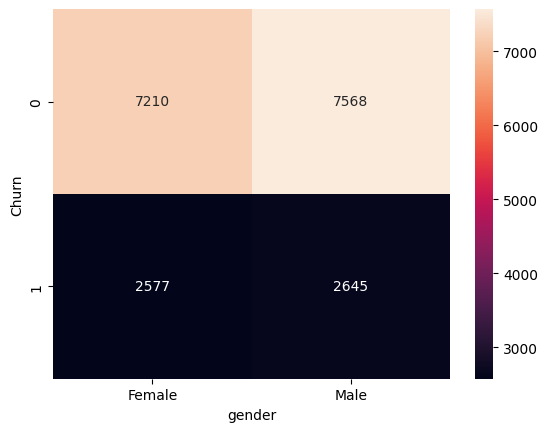

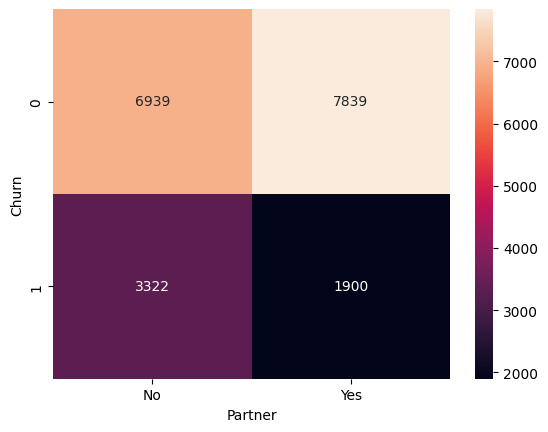

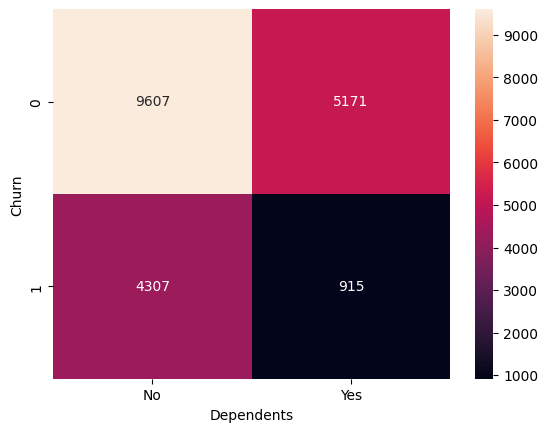

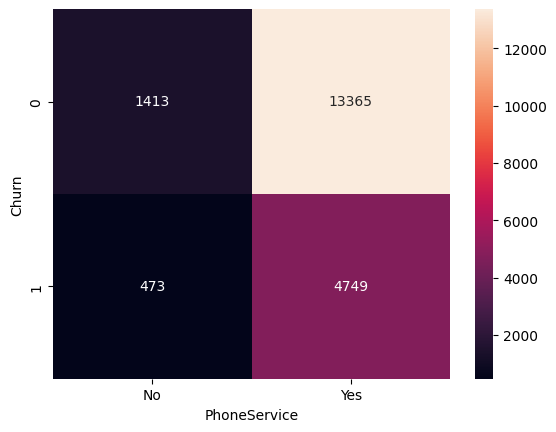

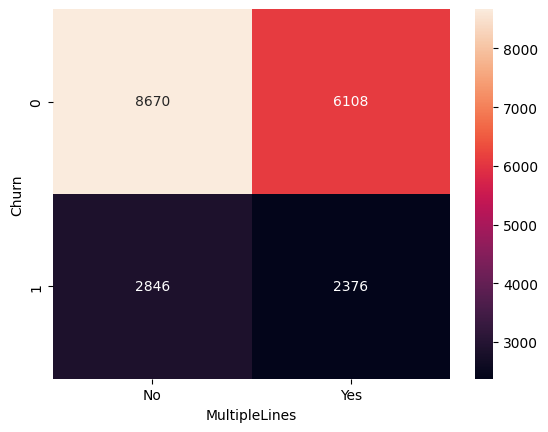

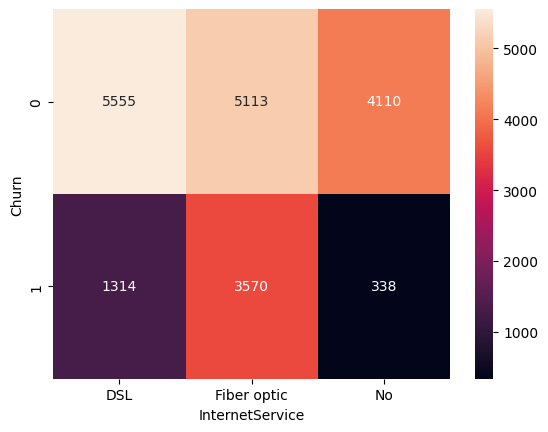

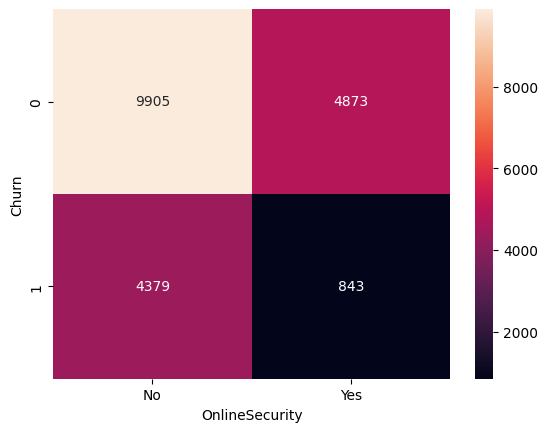

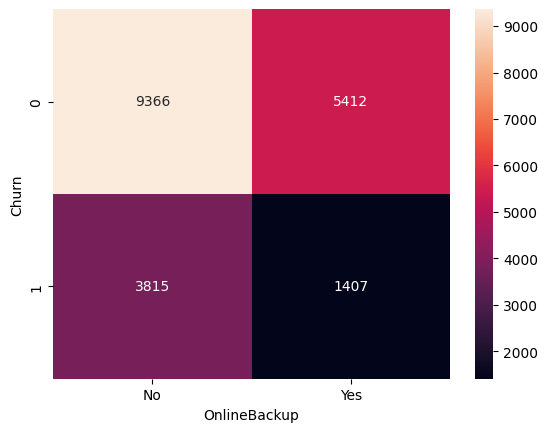

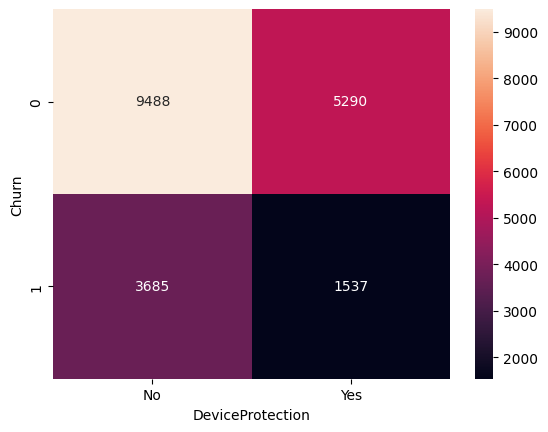

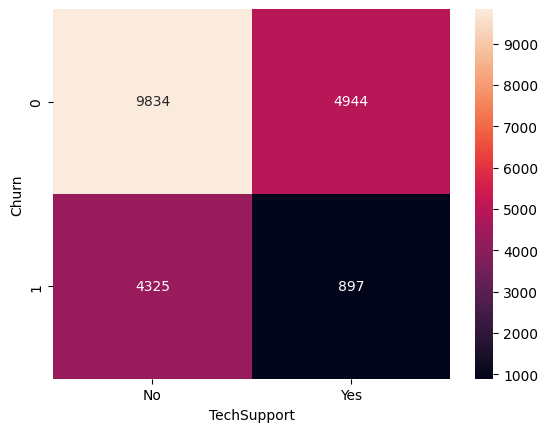

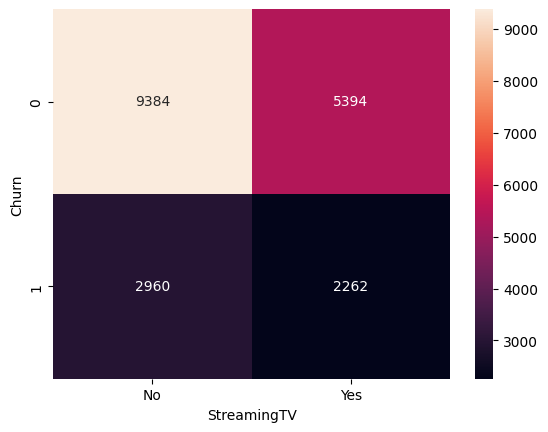

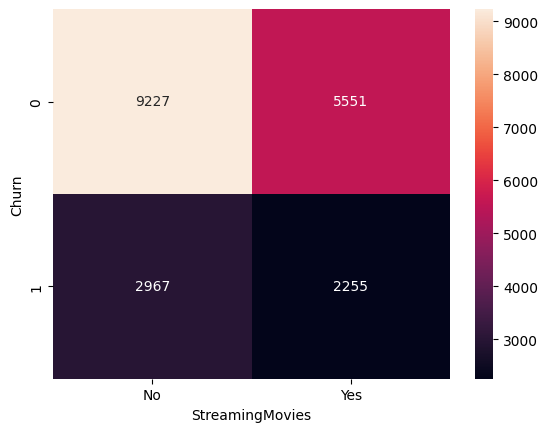

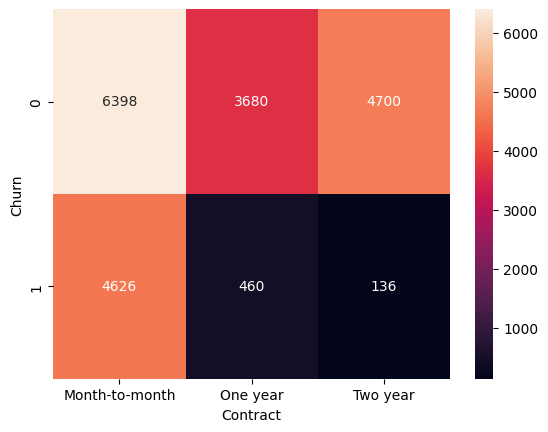

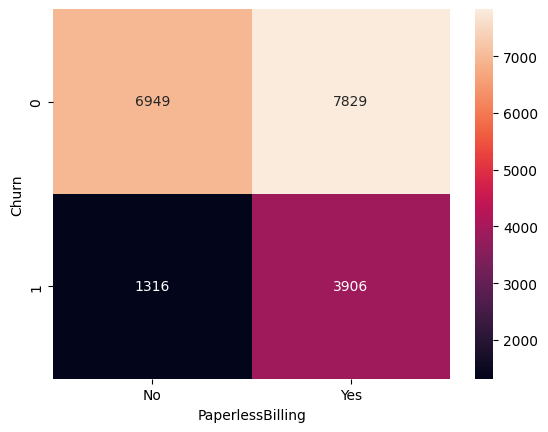

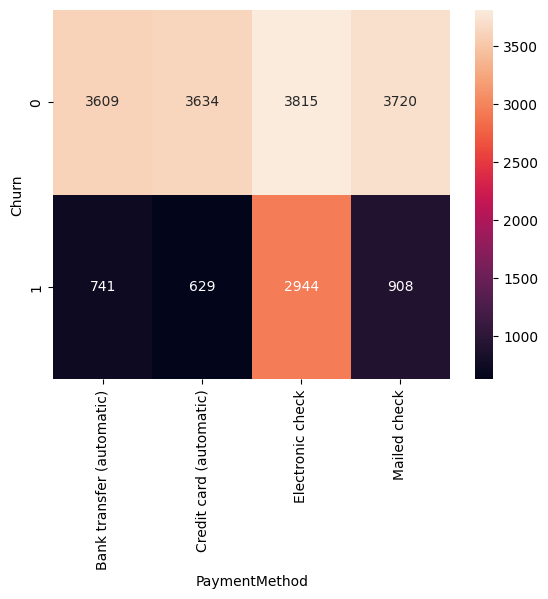

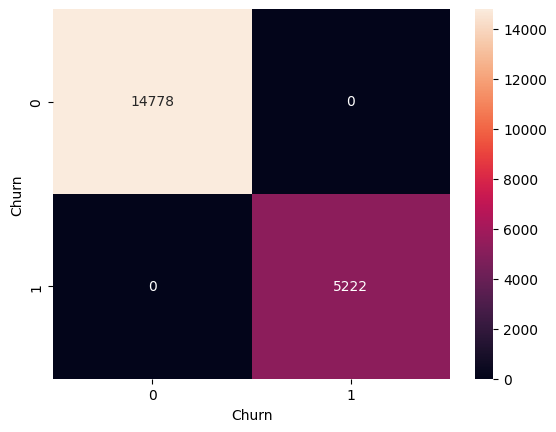

In [67]:
for col in cat_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Churn'], df[col]), annot=True, fmt='d')

📊 Interprétation du Heatmap (Churn vs Gender)
Lecture du graphique :
L’axe X représente le genre (Female / Male).
L’axe Y représente le Churn (0 = Non, 1 = Oui).
Les couleurs montrent la densité des valeurs, avec une échelle allant du clair (effectifs élevés) au foncé (effectifs faibles).
Observations :
Nombre de clients ayant churné (1) :

Femmes : 2 577
Hommes : 2 645
Conclusion : Pas de différence notable entre les genres en termes de churn.
Nombre de clients n’ayant pas churné (0) :

Femmes : 7 210
Hommes : 7 568
La proportion de clients restants est également similaire.
Conclusion :
✅ Le genre n’a pas d’impact significatif sur le churn.
🔍 Cela confirme l’analyse statistique précédente (p-value élevée et Cramér’s V ≈ 0)

### 📊 **Interprétation du Heatmap (Churn vs Partner)**  

#### **Lecture du graphique** :  
- L’axe **X** représente le fait d’avoir un **partenaire** (`No` / `Yes`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (du clair pour des effectifs élevés au foncé pour des effectifs faibles).  

#### **Observations :**  
- **Clients sans partenaire (`No`)** :
  - **Churn = 1** (ont quitté) : **3 322**
  - **Churn = 0** (restés) : **6 939**
  - **Taux de churn** : `\( \frac{3322}{3322+6939} \approx 32.4\% \)`

- **Clients avec un partenaire (`Yes`)** :
  - **Churn = 1** : **1 900**
  - **Churn = 0** : **7 839**
  - **Taux de churn** : `\( \frac{1900}{1900+7839} \approx 19.5\% \)`

#### **Conclusion :**  
✅ **Les clients sans partenaire ont un taux de churn significativement plus élevé que ceux ayant un partenaire.**  
🔍 **Cela confirme les résultats des tests de Khi² et de Cramér’s V (relation significative avec le churn).**  
📌 **Interprétation possible** : Les clients sans partenaire pourraient être plus enclins à changer d'opérateur, car ils sont potentiellement moins engagés ou influencés par des décisions conjointes.


### 📊 **Interprétation du Heatmap (Churn vs Dependents)**  

#### **Lecture du graphique** :  
- L’axe **X** représente la présence de **personnes à charge** (`No` / `Yes`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (du clair pour des effectifs élevés au foncé pour des effectifs faibles).  

#### **Observations :**  
- **Clients sans personnes à charge (`No`)** :
  - **Churn = 1** (ont quitté) : **4 307**
  - **Churn = 0** (restés) : **9 607**
  - **Taux de churn** : `\( \frac{4307}{4307+9607} \approx 30.9\% \)`

- **Clients avec personnes à charge (`Yes`)** :
  - **Churn = 1** : **915**
  - **Churn = 0** : **5 171**
  - **Taux de churn** : `\( \frac{915}{915+5171} \approx 15.0\% \)`

#### **Conclusion :**  
✅ **Les clients sans personnes à charge ont un taux de churn deux fois plus élevé que ceux ayant des personnes à charge.**  
🔍 **Cela confirme les résultats des tests statistiques (relation significative avec le churn).**  
📌 **Interprétation possible** :  
- Les clients avec des personnes à charge pourraient être plus **stables** et moins enclins à changer d’opérateur.  
- Ceux sans personnes à charge ont peut-être **moins de contraintes** et sont donc plus **volatils**.  


### 📊 **Interprétation du Heatmap (Churn vs PhoneService)**  

#### **Lecture du graphique** :  
- L’axe **X** représente la présence d’un **service téléphonique** (`No` / `Yes`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (du clair pour des effectifs élevés au foncé pour des effectifs faibles).  

#### **Observations :**  
- **Clients sans service téléphonique (`No`)** :
  - **Churn = 1** (ont quitté) : **473**
  - **Churn = 0** (restés) : **1 413**
  - **Taux de churn** : `\( \frac{473}{473+1413} \approx 25.1\% \)`

- **Clients avec service téléphonique (`Yes`)** :
  - **Churn = 1** : **4 749**
  - **Churn = 0** : **13 365**
  - **Taux de churn** : `\( \frac{4749}{4749+13365} \approx 26.2\% \)`

#### **Conclusion :**  
🔍 **Le taux de churn est légèrement plus élevé chez les clients ayant un service téléphonique (26.2%) par rapport à ceux qui n'en ont pas (~25.1%).**  
📌 **Interprétation possible** :  
- Le service téléphonique peut être un facteur de churn, notamment si des clients trouvent de meilleures offres ailleurs.  
- La différence de churn entre les deux groupes est faible, indiquant que la possession d’un service téléphonique **n'est pas un facteur fortement déterminant du churn.**  


### 📊 **Interprétation du Heatmap (Churn vs MultipleLines)**  

#### **Lecture du graphique** :  
- L’axe **X** représente la présence de **lignes multiples** (`No` / `Yes`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (du clair pour des effectifs élevés au foncé pour des effectifs faibles).  

#### **Observations :**  
- **Clients sans lignes multiples (`No`)** :
  - **Churn = 1** (ont quitté) : **2 846**
  - **Churn = 0** (restés) : **8 670**
  - **Taux de churn** : `\( \frac{2846}{2846+8670} \approx 24.7\% \)`

- **Clients avec lignes multiples (`Yes`)** :
  - **Churn = 1** : **2 376**
  - **Churn = 0** : **6 108**
  - **Taux de churn** : `\( \frac{2376}{2376+6108} \approx 28.0\% \)`

#### **Conclusion :**  
🔍 **Les clients ayant des lignes multiples ont un taux de churn légèrement plus élevé (~28.0%) que ceux ayant une seule ligne (~24.7%).**  
📌 **Interprétation possible** :  
- Les clients avec plusieurs lignes pourraient être plus sensibles aux coûts et chercher des offres alternatives.  
- La différence reste faible, suggérant que **les lignes multiples ne sont pas un facteur déterminant du churn, mais pourraient influencer la décision.**  


### 📊 **Analyse du Heatmap (Churn vs InternetService)**  

#### **Lecture du graphique** :  
- L’axe **X** représente le **type de service Internet** (`DSL`, `Fiber optic`, `No`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (clair = plus élevé, foncé = plus faible).  

#### **Observations :**  
- **Clients avec DSL** :
  - **Restés (Churn = 0)** : **5 555**
  - **Partis (Churn = 1)** : **1 314**
  - **Taux de churn** : `\( \frac{1314}{5555+1314} \approx 19.1\% \)`

- **Clients avec Fibre optique** :
  - **Restés** : **5 113**
  - **Partis** : **3 570**
  - **Taux de churn** : `\( \frac{3570}{5113+3570} \approx 41.1\% \)`

- **Clients sans Internet (`No`)** :
  - **Restés** : **4 110**
  - **Partis** : **338**
  - **Taux de churn** : `\( \frac{338}{4110+338} \approx 7.6\% \)`

#### **Conclusion :**  
🔍 **Les clients ayant la fibre optique ont le taux de churn le plus élevé (~41.1%) !**  
📌 **Interprétation possible** :  
- La fibre optique pourrait être plus chère, entraînant plus de désabonnements.  
- Les clients DSL sont plus stables (~19.1% de churn).  
- Les clients sans Internet ont le churn le plus faible (~7.6%), ce qui peut s’expliquer par une moindre dépendance au service ou des offres groupées attractives.  

👉 **Le type d’Internet semble jouer un rôle clé dans la fidélité des clients !** 🚀  


### 🔒 **Analyse du Heatmap (Churn vs OnlineSecurity)**  

#### **Lecture du graphique** :  
- L’axe **X** représente le **service de sécurité en ligne** (`No`, `Yes`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (clair = plus élevé, foncé = plus faible).  

#### **Observations :**  
- **Clients sans OnlineSecurity** :
  - **Restés (Churn = 0)** : **9 905**
  - **Partis (Churn = 1)** : **4 379**
  - **Taux de churn** : `\( \frac{4379}{9905+4379} \approx 30.7\% \)`

- **Clients avec OnlineSecurity** :
  - **Restés** : **4 873**
  - **Partis** : **843**
  - **Taux de churn** : `\( \frac{843}{4873+843} \approx 14.7\% \)`

#### **Conclusion :**  
📌 **Les clients ayant souscrit à OnlineSecurity ont un taux de churn bien plus bas (~14.7%) par rapport à ceux qui ne l’ont pas (~30.7%) !**  

🔍 **Interprétation possible** :  
- Les clients avec **OnlineSecurity** perçoivent peut-être plus de **valeur** et restent plus fidèles.  
- Ceux qui n’ont pas ce service sont plus susceptibles de partir, potentiellement pour des offres plus sécurisées ailleurs.  

🚀 **Proposition stratégique** :  
- **Encourager la souscription** à OnlineSecurity via des promotions ou des essais gratuits.  
- **Analyser les raisons** pour lesquelles certains clients ne prennent pas ce service et ajuster l’offre si nécessaire.  

👉 **Le service OnlineSecurity semble être un levier clé de rétention client !** 🛡️  


### ☁️ **Analyse du Heatmap (Churn vs OnlineBackup)**  

#### **Lecture du graphique** :  
- L’axe **X** représente le **service de sauvegarde en ligne** (`No`, `Yes`).  
- L’axe **Y** représente le **Churn** (`0 = Non`, `1 = Oui`).  
- Les couleurs indiquent la **densité des valeurs** (clair = plus élevé, foncé = plus faible).  

#### **Observations :**  
- **Clients sans OnlineBackup** :
  - **Restés (Churn = 0)** : **9 366**
  - **Partis (Churn = 1)** : **3 815**
  - **Taux de churn** : `\( \frac{3815}{9366+3815} \approx 28.9\% \)`

- **Clients avec OnlineBackup** :
  - **Restés** : **5 412**
  - **Partis** : **1 407**
  - **Taux de churn** : `\( \frac{1407}{5412+1407} \approx 20.6\% \)`

#### **Conclusion :**  
📌 **Les clients ayant souscrit à OnlineBackup ont un taux de churn plus faible (~20.6%) que ceux qui ne l’ont pas (~28.9%) !**  

🔍 **Interprétation possible** :  
- Le service **OnlineBackup** pourrait contribuer à la fidélisation des clients, mais **moins que le service OnlineSecurity** (cf. analyse précédente).  
- Les clients sans sauvegarde sont plus susceptibles de partir, probablement par crainte de **perte de données** ou pour chercher un service plus fiable.  

🚀 **Proposition stratégique** :  
- **Mise en avant des bénéfices** de OnlineBackup pour réduire le churn.  
- **Offres groupées** avec d'autres services comme OnlineSecurity pour améliorer la fidélisation.  
- **Campagnes éducatives** sur l'importance des sauvegardes en ligne pour sensibiliser les clients.  

👉 **OnlineBackup est un facteur de rétention important, mais il n’a pas autant d’impact que la sécurité en ligne !** 🔄💾  


### 🔒 **Analyse du Heatmap (Churn vs DeviceProtection)**  

#### **Lecture du graphique** :  
- **X-axis** : Service de **protection des appareils** (`No`, `Yes`).  
- **Y-axis** : **Churn** (`0 = Non`, `1 = Oui`).  
- **Couleurs** : Indiquent la **densité des valeurs** (clair = élevé, foncé = faible).  

#### **Observations :**  
- **Clients sans DeviceProtection** :
  - **Restés (Churn = 0)** : **9 488**
  - **Partis (Churn = 1)** : **3 685**
  - **Taux de churn** : `\( \frac{3685}{9488+3685} \approx 28.0\% \)`

- **Clients avec DeviceProtection** :
  - **Restés** : **5 290**
  - **Partis** : **1 537**
  - **Taux de churn** : `\( \frac{1537}{5290+1537} \approx 22.5\% \)`

#### **Conclusion :**  
📌 **Les clients ayant souscrit à DeviceProtection ont un taux de churn plus faible (~22.5%) que ceux qui ne l’ont pas (~28.0%) !**  

🔍 **Interprétation possible** :  
- La protection des appareils peut rassurer les clients et les encourager à rester plus longtemps.  
- Cependant, l’impact est **moins fort** que des services comme **OnlineSecurity**.  

🚀 **Recommandations stratégiques :**  
1. **Proposer des offres combinées** (DeviceProtection + OnlineSecurity) pour améliorer la rétention.  
2. **Campagnes marketing** sur les risques liés aux appareils non protégés.  
3. **Offrir DeviceProtection gratuitement** pendant une période d’essai pour encourager l’adoption.  

👉 **DeviceProtection réduit le churn, mais moins que d'autres services comme la sécurité en ligne. Il pourrait être plus efficace en complément d'autres offres !** 💡  


# 🔧 **Analyse du Heatmap (Churn vs TechSupport)**  

## 📊 Lecture du graphique  
- **Axe X** : Service de **support technique** (`No`, `Yes`).  
- **Axe Y** : **Churn** (`0 = Non`, `1 = Oui`).  
- **Couleurs** : Indiquent la **densité des valeurs** (clair = élevé, foncé = faible).  

## 📌 Observations  
### 📌 Clients sans TechSupport  
- **Restés (Churn = 0)** : **9 834**  
- **Partis (Churn = 1)** : **4 325**  
- **Taux de churn** :  
  $$ \frac{4325}{9834+4325} \approx 30.6\% $$  

### 📌 Clients avec TechSupport  
- **Restés** : **4 944**  
- **Partis** : **897**  
- **Taux de churn** :  
  $$ \frac{897}{4944+897} \approx 15.3\% $$  

## 📉 Conclusion  
✅ **Les clients ayant accès au support technique ont un taux de churn nettement plus faible (~15.3%) que ceux qui n’en ont pas (~30.6%) !**  


# 🎬 **Analyse du Heatmap (Churn vs StreamingMovies)**  

## 📊 Lecture du graphique  
- **Axe X** : Service de **Streaming de films** (`No`, `Yes`).  
- **Axe Y** : **Churn** (`0 = Non`, `1 = Oui`).  
- **Couleurs** : Indiquent la **densité des valeurs** (clair = élevé, foncé = faible).  

## 📌 Observations  
### 📌 Clients sans StreamingMovies  
- **Restés (Churn = 0)** : **9 227**  
- **Partis (Churn = 1)** : **2 967**  
- **Taux de churn** :  
  $$ \frac{2967}{9227+2967} \approx 24.3\% $$  

### 📌 Clients avec StreamingMovies  
- **Restés** : **5 551**  
- **Partis** : **2 255**  
- **Taux de churn** :  
  $$ \frac{2255}{5551+2255} \approx 28.9\% $$  

## 📉 Conclusion  
❗ **Les clients ayant activé le service de StreamingMovies ont un taux de churn légèrement plus élevé (~28.9%) que ceux qui ne l’ont pas (~24.3%) !**  
✅ Cela suggère que le service de streaming n’aide pas à fidéliser les clients et pourrait même être un facteur de désabonnement. 🎯  


# 📜 **Analyse du Heatmap (Churn vs Contract Type)**  

## 📊 Lecture du graphique  
- **Axe X** : Type de **contrat** (`Month-to-month`, `One year`, `Two year`).  
- **Axe Y** : **Churn** (`0 = Non`, `1 = Oui`).  
- **Couleurs** : Indiquent la **densité des valeurs** (clair = élevé, foncé = faible).  

## 📌 Observations  
### 📌 Clients avec un contrat **Month-to-month**  
- **Restés (Churn = 0)** : **6 398**  
- **Partis (Churn = 1)** : **4 626**  
- **Taux de churn** :  
  $$ \frac{4626}{6398+4626} \approx 41.9\% $$  

### 📌 Clients avec un contrat **One year**  
- **Restés** : **3 680**  
- **Partis** : **460**  
- **Taux de churn** :  
  $$ \frac{460}{3680+460} \approx 11.1\% $$  

### 📌 Clients avec un contrat **Two year**  
- **Restés** : **4 700**  
- **Partis** : **136**  
- **Taux de churn** :  
  $$ \frac{136}{4700+136} \approx 2.8\% $$  

## 📉 Conclusion  
❗ **Les clients ayant un contrat mensuel ont un taux de churn très élevé (41.9%), tandis que ceux avec des contrats d'un an (~11.1%) ou deux ans (2.8%) sont bien plus fidèles.**  
✅ Cela suggère que les contrats longue durée réduisent considérablement le taux de désabonnement. Une stratégie de fidélisation pourrait inclure **des incitations à choisir des contrats plus longs**. 🎯  


# 📜 **Analyse du Heatmap (Churn vs Facturation sans papier - PaperlessBilling)**  

## 📊 Lecture du graphique  
- **Axe X** : Option de **facturation sans papier** (`No`, `Yes`).  
- **Axe Y** : **Churn** (`0 = Non`, `1 = Oui`).  
- **Couleurs** : Indiquent la **densité des valeurs** (clair = élevé, foncé = faible).  

## 📌 Observations  
### 📌 Clients **sans facturation sans papier** (`No`)  
- **Restés (Churn = 0)** : **6 949**  
- **Partis (Churn = 1)** : **1 316**  
- **Taux de churn** :  
  $$ \frac{1316}{6949+1316} \approx 15.9\% $$  

### 📌 Clients **avec facturation sans papier** (`Yes`)  
- **Restés** : **7 829**  
- **Partis** : **3 906**  
- **Taux de churn** :  
  $$ \frac{3906}{7829+3906} \approx 33.3\% $$  

## 📉 Conclusion  
❗ **Les clients ayant activé la facturation sans papier ("PaperlessBilling") présentent un taux de churn beaucoup plus élevé (~33.3%) que ceux utilisant une facturation classique (~15.9%).**  
💡 Cela peut être lié à une **plus forte adoption des contrats mensuels** par ces clients, ou une **expérience client moins engageante** avec la facturation numérique.  
📢 **Recommandation** : Il serait intéressant d'analyser si ces clients utilisent également d'autres services numériques et d'explorer des moyens pour améliorer leur rétention, comme un service client amélioré ou des offres personnalisées. 🚀  


# 📜 **Analyse du Heatmap (Churn vs Mode de Paiement - PaymentMethod)**  

## 📊 Lecture du graphique  
- **Axe X** : **Méthodes de paiement** (`Bank transfer (automatic)`, `Credit card (automatic)`, `Electronic check`, `Mailed check`).  
- **Axe Y** : **Churn** (`0 = Non`, `1 = Oui`).  
- **Couleurs** : Indiquent la **densité des valeurs** (clair = élevé, foncé = faible).  

## 📌 Observations  
### 📌 **Clients avec paiement automatique (Bank transfer, Credit card)**  
- **Restés (Churn = 0)** :  
  - **Virement bancaire (Bank transfer)** : **3 609**  
  - **Carte de crédit (Credit card)** : **3 634**  
- **Partis (Churn = 1)** :  
  - **Virement bancaire** : **741**  
  - **Carte de crédit** : **629**  
- **Taux de churn** :  
  - **Virement bancaire** :  
    $$ \frac{741}{3609+741} \approx 17\% $$  
  - **Carte de crédit** :  
    $$ \frac{629}{3634+629} \approx 14.8\% $$  

### 📌 **Clients avec paiement manuel (Electronic check, Mailed check)**  
- **Restés (Churn = 0)** :  
  - **Chèque électronique (Electronic check)** : **3 815**  
  - **Chèque postal (Mailed check)** : **3 720**  
- **Partis (Churn = 1)** :  
  - **Chèque électronique** : **2 944**  
  - **Chèque postal** : **908**  
- **Taux de churn** :  
  - **Chèque électronique** :  
    $$ \frac{2944}{3815+2944} \approx 43.6\% $$  
  - **Chèque postal** :  
    $$ \frac{908}{3720+908} \approx 19.6\% $$  

## 📉 Conclusion  
❗ **Les clients qui utilisent le paiement par chèque électronique ("Electronic check") ont un taux de churn extrêmement élevé (~43.6%), comparé aux autres méthodes.**  
💳 **Le paiement par carte de crédit automatique est associé au plus faible churn (~14.8%).**  
💡 Cela peut indiquer que **les clients qui choisissent le paiement automatique sont plus engagés et fidèles**, tandis que ceux qui utilisent le chèque électronique peuvent être plus volatils.  
📢 **Recommandation** : Encourager les paiements automatiques avec des incitations (réductions, bonus, etc.) pour améliorer la rétention client. 🚀  


#### Relation Variable/Variable

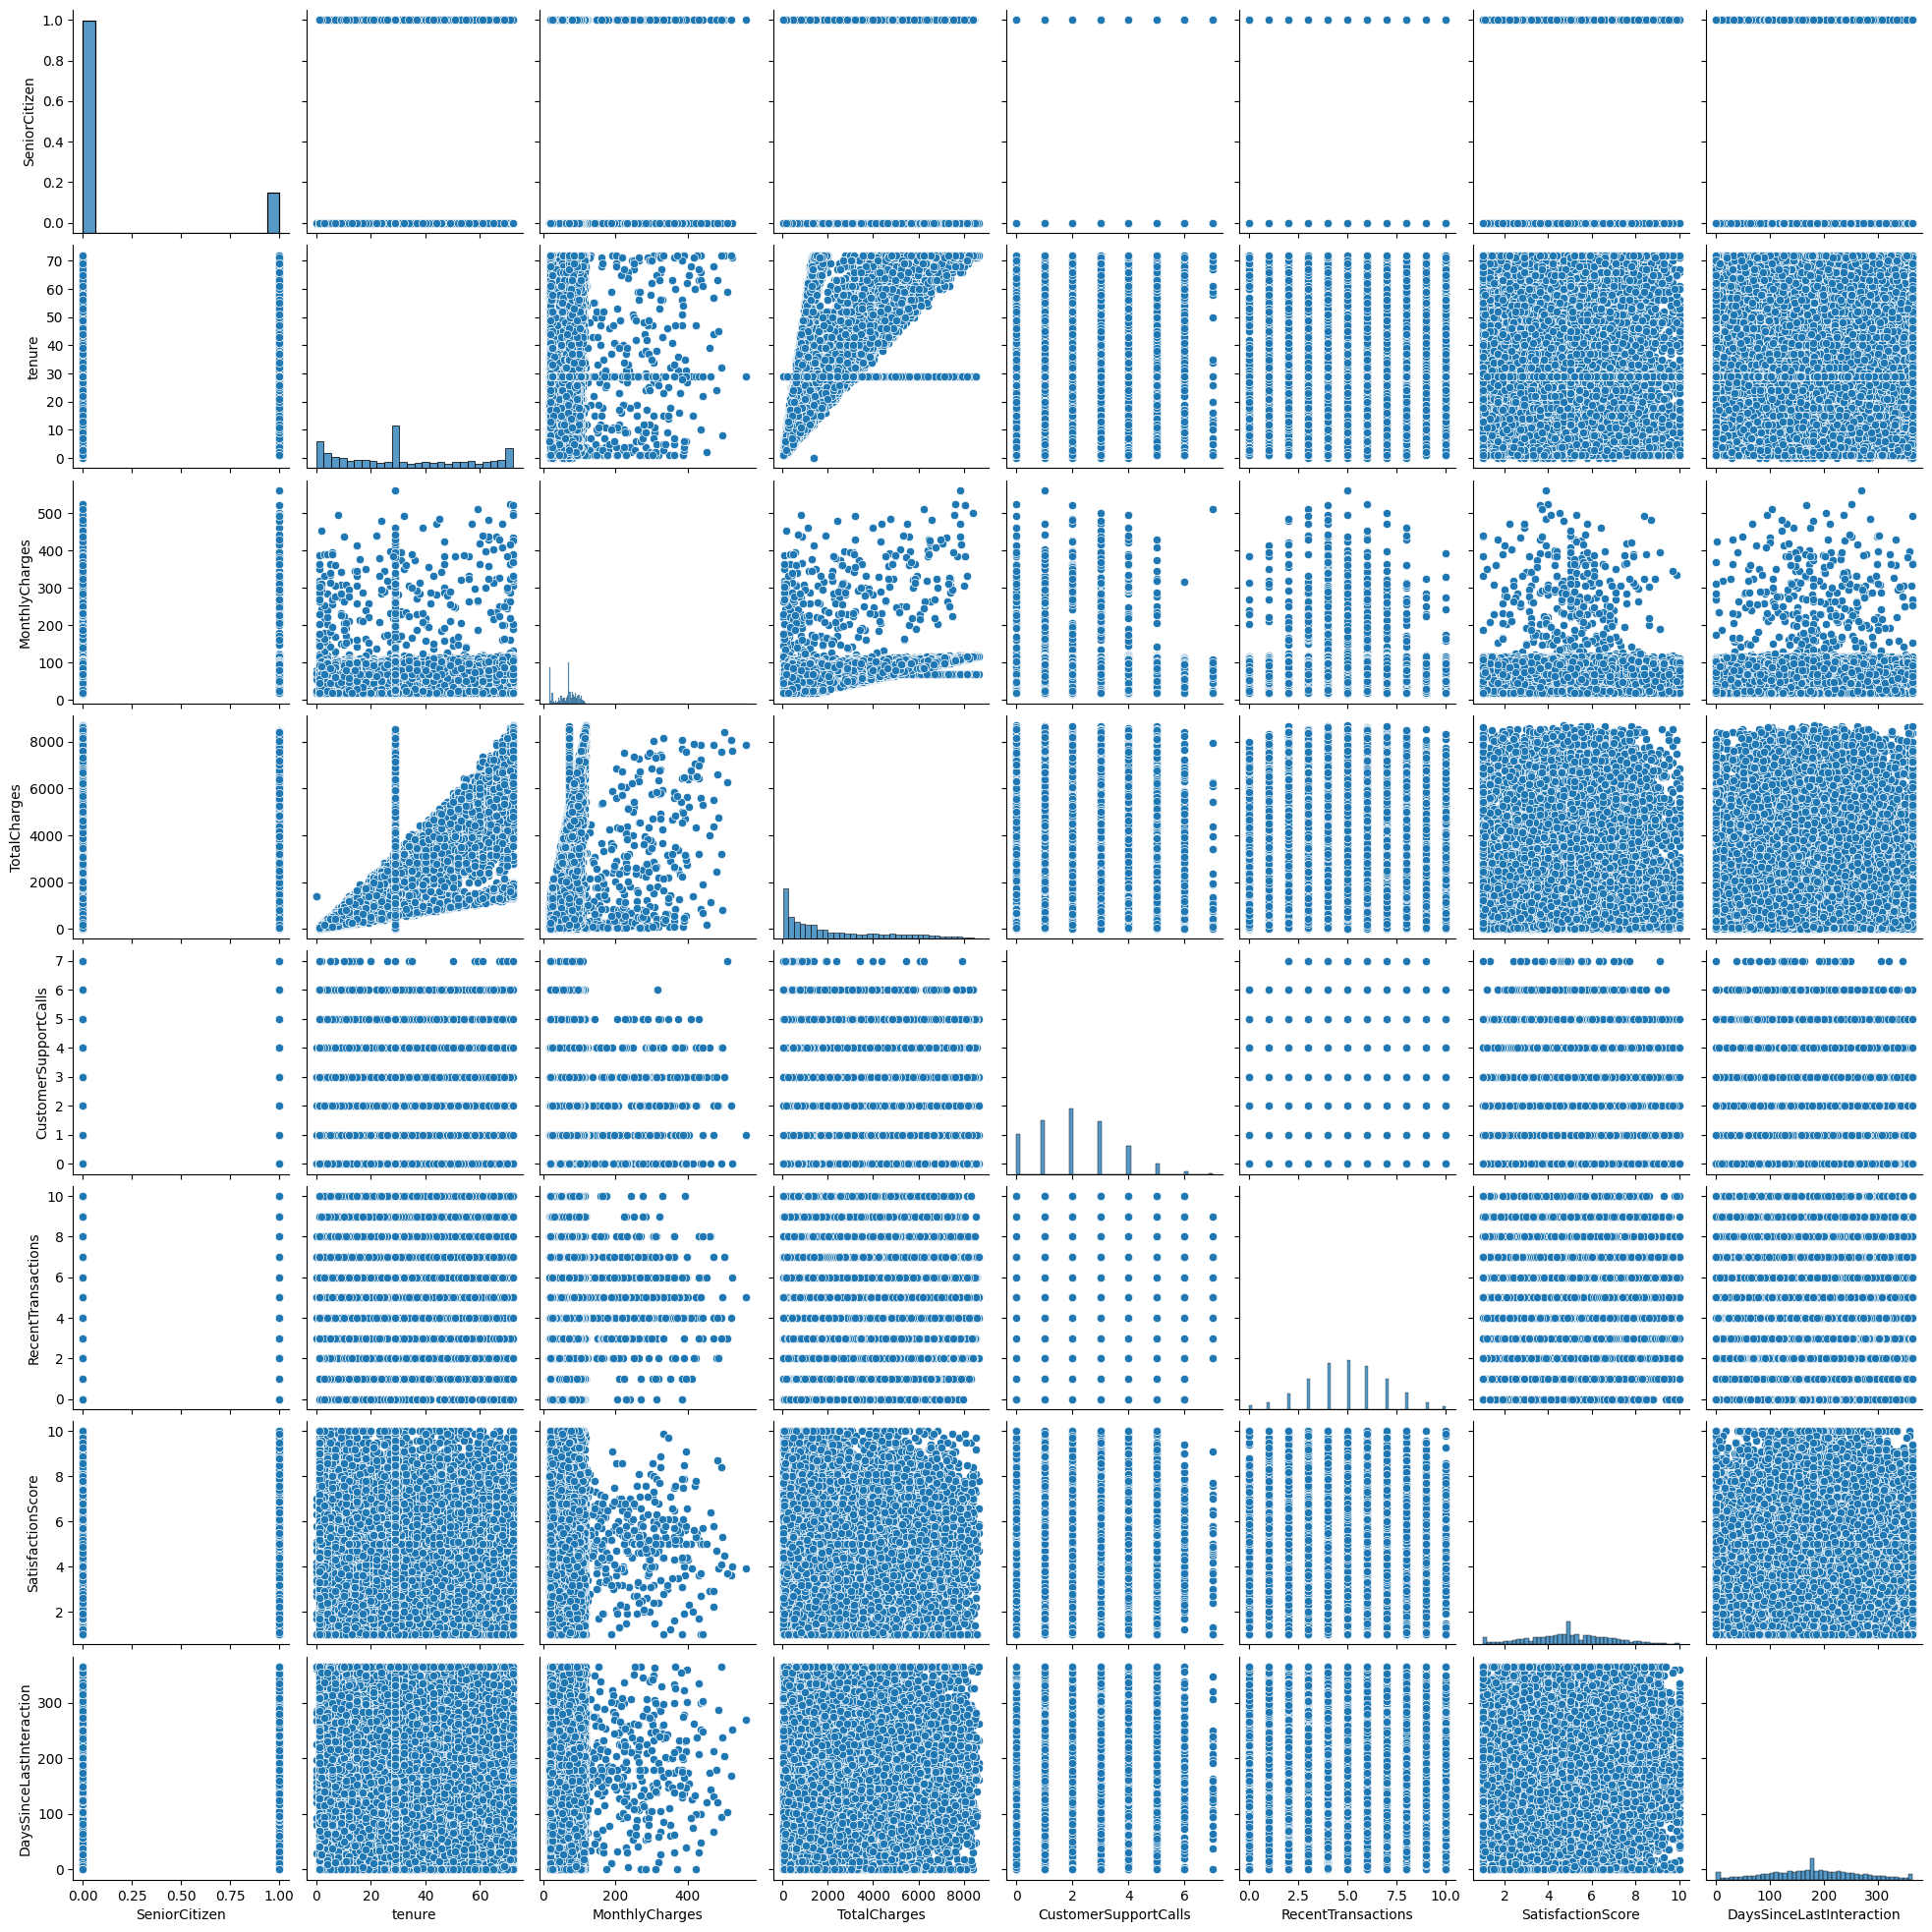

In [68]:
sns.pairplot(df[numeric_columns])

Cette visualisation permet d’analyser les relations entre les variables numériques du dataset.

🔎 Interprétation globale du Pairplot :
Les graphiques en diagonale montrent la distribution de chaque variable sous forme d’histogramme.
Les autres graphiques montrent les relations entre chaque paire de variables numériques :
Relation linéaire forte entre TotalCharges et Tenure (forte corrélation positive).
Relation entre MonthlyCharges et TotalCharges : on observe une tendance, mais avec une certaine dispersion.
Autres variables : beaucoup de dispersion, suggérant peu de corrélation directe.


<Axes: >

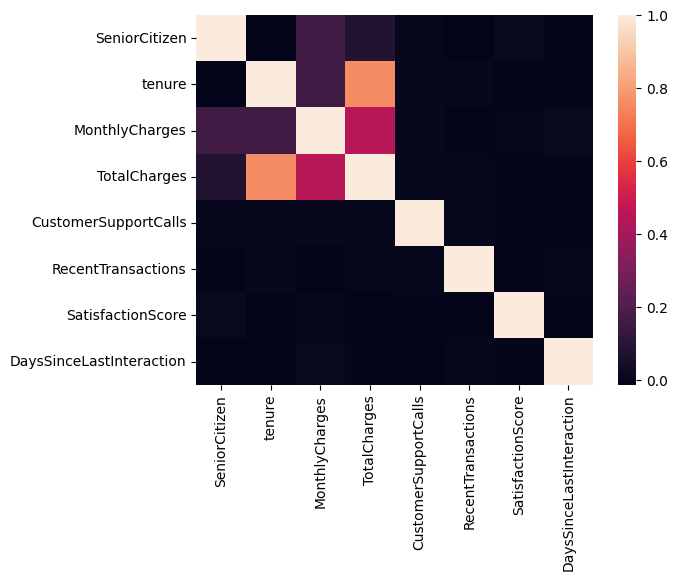

In [71]:
sns.heatmap(df[numeric_columns].corr())

- Plus une corrélation est proche de 1
- plus les deux variables évoluent positivement
- Quand l'une augmente l'autre augmente aussi

A ce stade, on est pas entrain de prendre des décision mais collecter des informations pour prendre des décisions surtout lorsqu'on va attaquer la partie modélisation

### heatmap de corrélation avec un dendrogramme

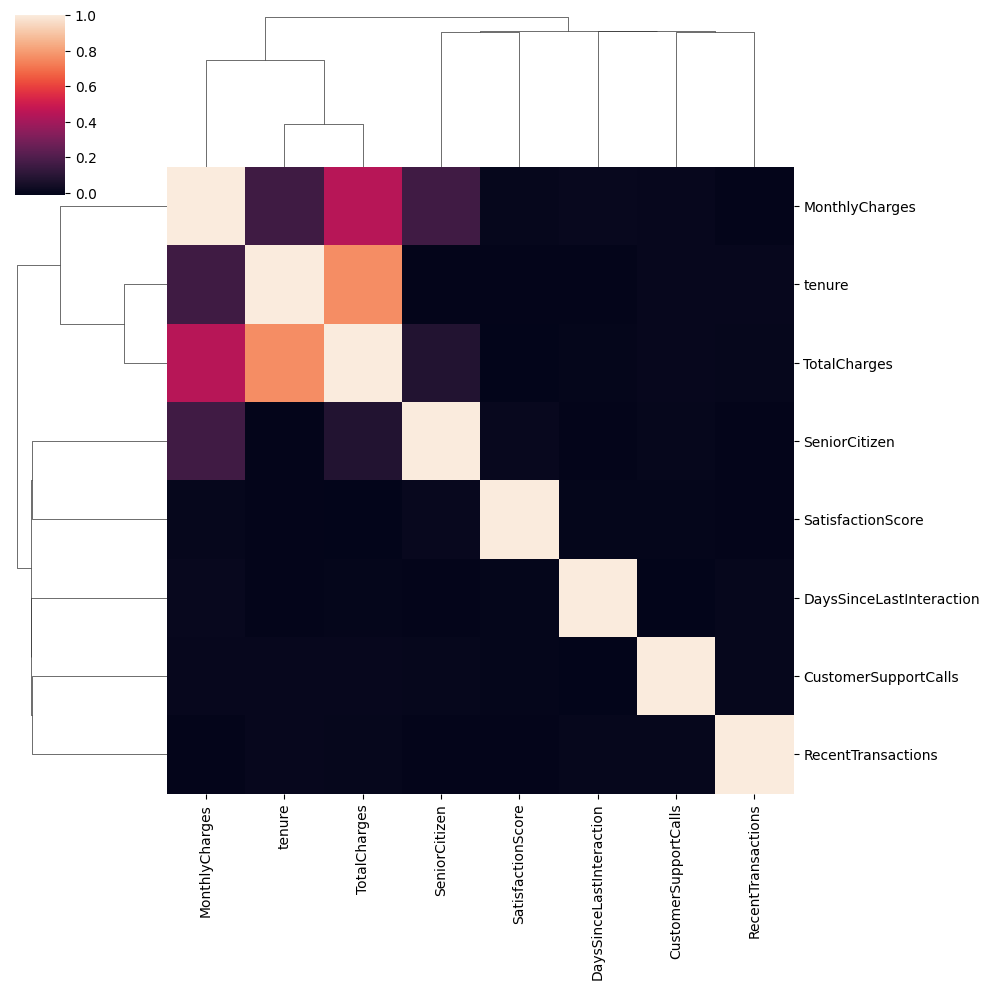

In [69]:
# Autre façon de visualiser ces corrélation
sns.clustermap(df[numeric_columns].corr())

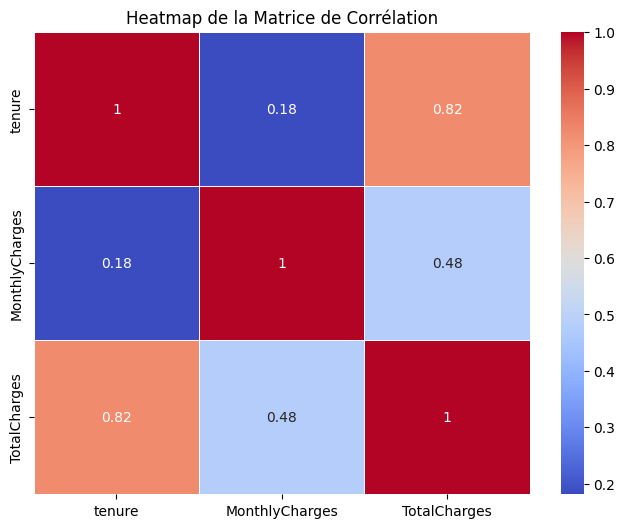

In [36]:
# Sélectionner les variables numériques
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculer la matrice de corrélation
corr_matrix = df[num_vars].corr(method='pearson')

# Afficher la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()


<Figure size 640x480 with 0 Axes>

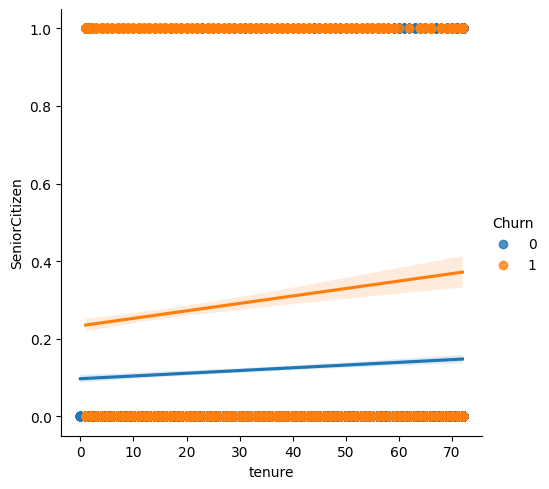

<Figure size 640x480 with 0 Axes>

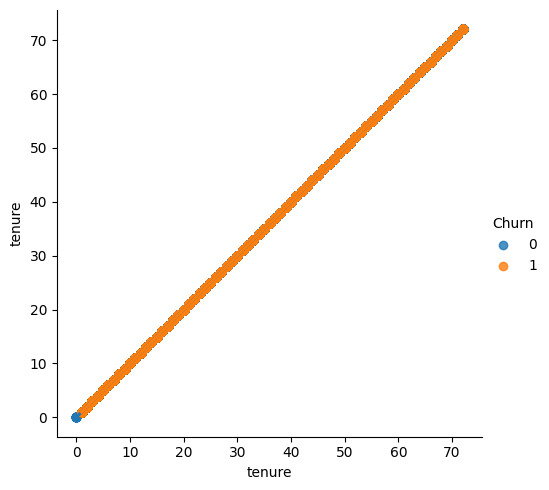

<Figure size 640x480 with 0 Axes>

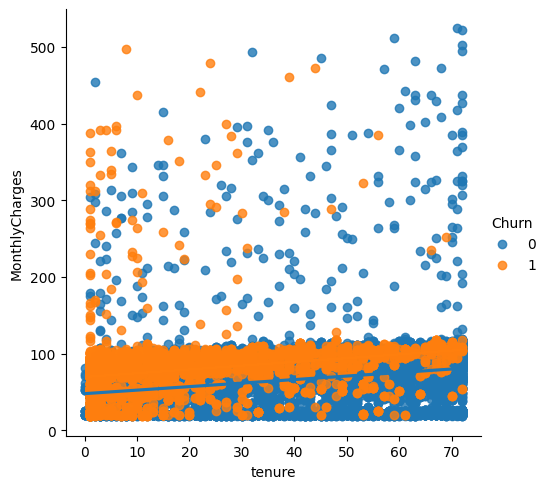

<Figure size 640x480 with 0 Axes>

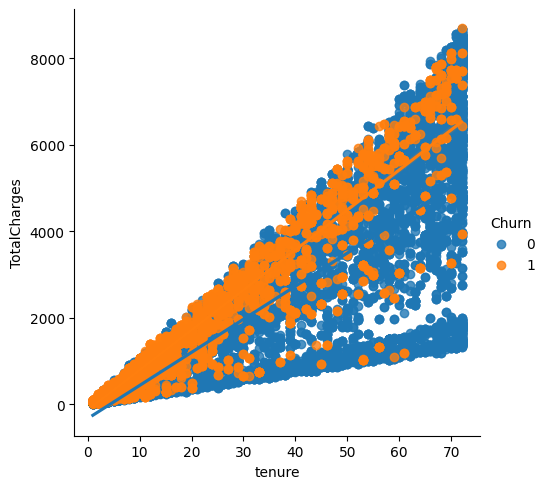

<Figure size 640x480 with 0 Axes>

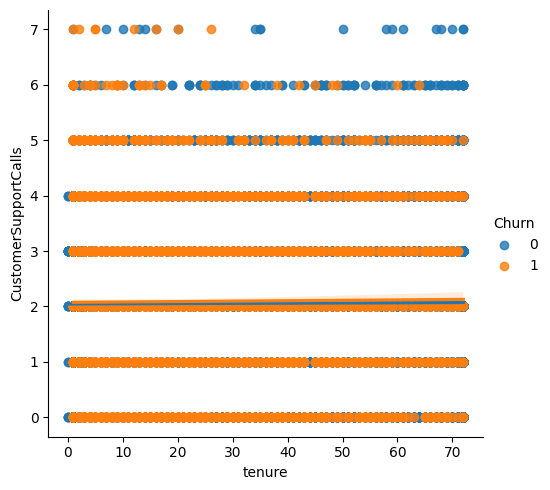

<Figure size 640x480 with 0 Axes>

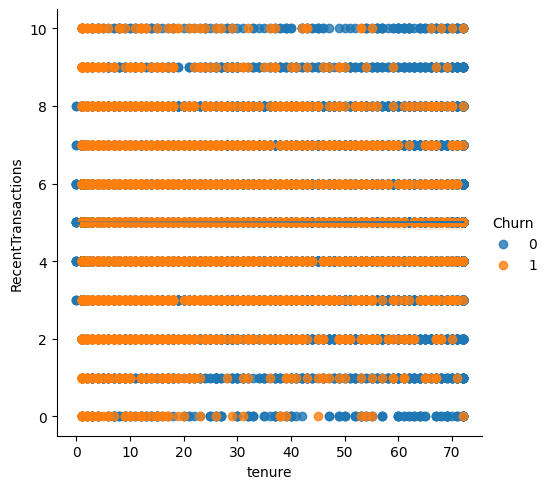

<Figure size 640x480 with 0 Axes>

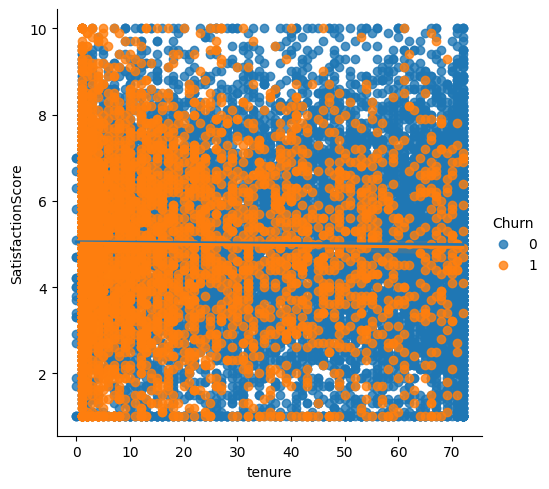

<Figure size 640x480 with 0 Axes>

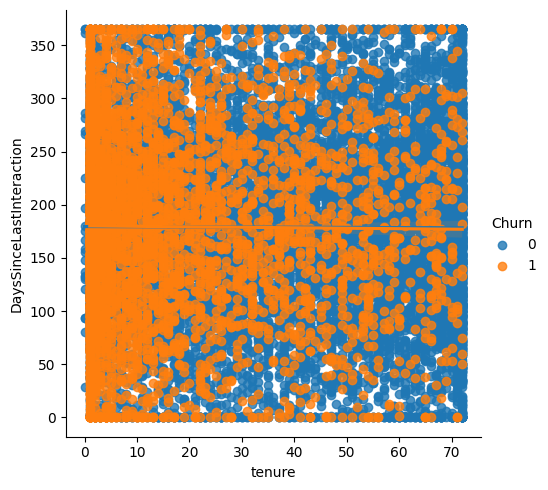

In [37]:
for col in numeric_columns:
    plt.figure()
    sns.lmplot(x='tenure', y=col, hue='Churn', data=df)

In [80]:
df['SeniorCitizen'].unique()

array([0, 1])

📊 Explication du graphique (Tenure vs SeniorCitizen, avec Churn)
Ce graphique est un scatter plot (nuage de points) avec une régression linéaire pour visualiser la tendance de la variable SeniorCitizen en fonction de Tenure, tout en distinguant les clients qui ont quitté (Churn = 1) et ceux qui sont restés (Churn = 0).

🔹 Axes du graphique :
X (axe horizontal) → Tenure : durée d'abonnement du client (en mois).
Y (axe vertical) → SeniorCitizen :
0 → Client non-senior
1 → Client senior
🔹 Couleurs des points :
Bleu (Churn = 0) → Clients qui sont restés.
Orange (Churn = 1) → Clients qui ont quitté l'opérateur.
🔍 Explication des courbes :
1️⃣ Les points sont alignés sur deux lignes horizontales (0 et 1)

Cela vient du fait que SeniorCitizen est une variable binaire.
Les clients ne peuvent avoir que deux valeurs : 0 (non-senior) ou 1 (senior).
2️⃣ Lignes de tendance (courbes de régression) :

Ligne bleue → Montre la tendance pour les clients qui sont restés (Churn = 0).
Ligne orange → Montre la tendance pour les clients qui sont partis (Churn = 1).
Ces courbes montrent l'évolution de la proportion de seniors dans le temps (Tenure).
3️⃣ Interprétation des tendances :

La légère pente montante des deux courbes signifie que plus la durée d'abonnement (Tenure) augmente, plus la proportion de seniors est légèrement plus élevée.
Cela pourrait indiquer que les clients seniors restent plus longtemps abonnés, mais finissent aussi par partir à un moment donné.
🧐 Conclusion :
Les seniors ont tendance à rester plus longtemps, mais ils finissent aussi par partir avec le temps.
Il pourrait être intéressant d'examiner les raisons du churn chez les seniors (prix, service client, évolution des besoins).
👉 Souhaites-tu explorer une autre analyse sur ce dataset ? 🚀







Vous avez dit :
et le gros trait d'en bas un peut de bleu et beaucoup d'orange
ChatGPT a dit :
📊 Explication du gros trait en bas (beaucoup d’orange et un peu de bleu)
Le trait horizontal situé tout en bas du graphique représente les clients non-seniors (SeniorCitizen = 0).

🔹 Pourquoi beaucoup d’orange et un peu de bleu ?
1️⃣ Beaucoup d’orange (Churn = 1)

Cela signifie qu’une grande partie des clients non-seniors ont quitté l’opérateur (churn élevé).
On peut supposer que les jeunes sont plus volatils et changent d’opérateur plus facilement.
2️⃣ Un peu de bleu (Churn = 0)

Il y a moins de points bleus car une plus petite proportion de clients non-seniors est restée fidèle à l’opérateur.
🔹 Interprétation possible :
Les jeunes clients (SeniorCitizen = 0) ont un taux de churn plus élevé que les seniors.
Il serait intéressant d’analyser les facteurs expliquant ce churn chez les jeunes (prix, engagement, type d’abonnement…).
Peut-être que l’opérateur devrait mettre en place des stratégies de fidélisation pour les jeunes (ex: offres adaptées, programmes de fidélité).
🎯 Action possible :
Comparer cette analyse avec d’autres variables (ex: prix des abonnements, satisfaction client…).
Tester un modèle de classification pour prédire le churn en fonction de ces variables.

📊 Analyse du graphique (Tenure vs DaysSinceLastInteraction)
Ce graphique représente la relation entre :

Tenure (ancienneté du client en mois)
DaysSinceLastInteraction (nombre de jours depuis la dernière interaction)
Churn (0 = client resté, 1 = client parti)
🔹 Observations clés
1️⃣ Clients avec une faible ancienneté (tenure < 10 mois)

Beaucoup de points orange (Churn = 1) → Les clients récents ont un taux de churn élevé.
Ils ont des valeurs de DaysSinceLastInteraction très variées → Certains ont interagi récemment, d’autres pas du tout.
2️⃣ Clients fidèles (tenure > 50 mois)

Beaucoup de points bleus (Churn = 0) → Les clients anciens restent plus souvent.
Le churn est beaucoup plus faible dans cette zone.
3️⃣ Distribution des interactions (DaysSinceLastInteraction)

Certains clients n’ont pas interagi depuis longtemps (valeurs proches de 350 jours).
Beaucoup de churners (orange) semblent avoir peu ou pas d'interactions récentes → Cela pourrait être un indicateur de churn.
🔹 Interprétation
Les clients récents quittent plus souvent l’opérateur, peut-être par manque de satisfaction ou d’engagement initial.
Les clients qui n’interagissent pas depuis longtemps sont plus susceptibles de churner.
Les clients fidèles interagissent probablement plus régulièrement, ce qui pourrait expliquer leur faible taux de churn.
🎯 Actions possibles
✅ Identifier pourquoi les nouveaux clients churnent rapidement (prix, satisfaction, offres non adaptées ?).
✅ Mettre en place une stratégie d’engagement basée sur les interactions (ex: relancer les clients inactifs avant qu’ils ne partent).
✅ Segmenter les clients selon leur ancienneté et fréquence d’interaction pour mieux anticiper le churn.

👉 Besoin d’une autre analyse ou d’un modèle prédictif ? 🚀







Vous avez dit :
j'ai pas bien compris le graphique par rapport au nombre de jours d'intéraction
ChatGPT a dit :
📊 Explication détaillée du graphique (Tenure vs DaysSinceLastInteraction)
1️⃣ Les axes du graphique :
X-axis (Tenure) : Ancienneté du client en mois.
Y-axis (DaysSinceLastInteraction) : Nombre de jours depuis la dernière interaction du client.
Couleurs :
Bleu (Churn = 0) : Clients qui sont restés.
Orange (Churn = 1) : Clients qui ont quitté (churners).
2️⃣ Comment interpréter la variable "DaysSinceLastInteraction" ?
Cette variable indique depuis combien de jours un client a eu son dernier contact avec l’entreprise (appels, paiements, réclamations, connexions au compte, etc.).

Valeur basse (proche de 0) → Le client a interagi récemment.
Valeur haute (proche de 350) → Le client n’a pas interagi depuis longtemps.
3️⃣ Ce que montre le graphique
💡 On voit que beaucoup de churners (orange) ont un nombre élevé de jours depuis la dernière interaction.

📌 Zones d'observations clés :
✅ Zone en bas du graphique (DaysSinceLastInteraction proche de 0) :

Mélange de bleu et orange → Certains clients churnent même après une interaction récente.
Mais la majorité reste → Une interaction récente pourrait limiter le churn.
✅ Zone en haut du graphique (DaysSinceLastInteraction > 300 jours) :

Majorité de points orange (Churners) → Beaucoup de clients quittent l’opérateur après une longue période sans interaction.
Cela suggère que les clients inactifs depuis longtemps ont plus de chances de churner.
✅ Clients avec faible ancienneté (Tenure < 10 mois) et peu d’interactions :

Très nombreux churners → Les nouveaux clients quittent rapidement s’ils n’ont pas beaucoup d’interactions.
4️⃣ Interprétation finale
Les clients qui n’interagissent pas depuis longtemps sont plus susceptibles de churner.
Un churn précoce est fréquent chez les nouveaux clients avec peu d’interactions.
Les clients fidèles qui interagissent régulièrement restent plus longtemps.
🚀 Action possible :
🔹 Mettre en place des campagnes de relance pour les clients inactifs.
🔹 Encourager les nouveaux clients à interagir (offres de bienvenue, service client proactif).

📊 Explication du graphique (Tenure vs RecentTransactions)
Ce graphique représente la relation entre l'ancienneté du client (Tenure) et le nombre de transactions récentes (RecentTransactions), en distinguant les clients qui quittent (Churn = 1, orange) et ceux qui restent (Churn = 0, bleu).

1️⃣ Explication des axes
X-axis (Tenure) : Nombre de mois depuis que le client a souscrit au service.
Y-axis (RecentTransactions) : Nombre de transactions récentes effectuées par le client (peut représenter des paiements, achats ou interactions avec le service).
Couleurs :
Bleu (Churn = 0) : Clients fidèles qui restent.
Orange (Churn = 1) : Clients qui ont quitté.
2️⃣ Observations principales
📌 Les transactions récentes semblent discrètes et alignées sur des valeurs spécifiques.
📌 Beaucoup de churners (orange) sont présents à tous les niveaux de transactions récentes.

✅ Clients avec peu ou aucune transaction récente (0-2 transactions)

Beaucoup de churners → Ce qui suggère que les clients inactifs quittent plus souvent.
✅ Clients avec un nombre élevé de transactions récentes (8-10 transactions)

Mélange de churners et de clients fidèles.
Certains clients très actifs quittent aussi, peut-être en raison de coûts élevés ou d'insatisfaction.
✅ Effet de l'ancienneté (Tenure)

Les churners sont présents à tous les niveaux de tenure, mais il semble y avoir plus d'orange parmi les nouveaux clients.
Cela confirme que les nouveaux clients churnent plus facilement.
3️⃣ Interprétation finale & Actions possibles
🔹 Les clients avec peu de transactions récentes sont plus susceptibles de churner → Une stratégie pour encourager plus d'interactions peut réduire le churn.
🔹 Les nouveaux clients ont un taux de churn élevé, quel que soit leur nombre de transactions → Une meilleure expérience de onboarding et des incitations à rester peuvent aider.
🔹 Certains clients très actifs partent aussi → Peut-être une insatisfaction liée à un coût élevé ou un mauvais service. Il serait intéressant d'analyser les avis clients ou les scores de satisfaction.

🚀 Prochaines étapes : 🔍 Creuser l’impact de la satisfaction client et du service client sur le churn.
📊 Tester une analyse prédictive pour identifier les clients à risque

In [49]:
def fidelite_client(df):
    if df['tenure'] < 12:
        return 'Nouveau client'
    elif 12 <= df['tenure'] < 48:
        return 'Client intermédiaire'
    else:
        return 'Client fidèle'

### Création de nouvelle variable

In [51]:
df['statut'] = df.apply(fidelite_client, axis=1)

In [53]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0      No         No     NaN          Yes   
1    Male              1      No         No    12.0          Yes   
2    Male              0     Yes        Yes    12.0          Yes   
3  Female              0     Yes        Yes    23.0          Yes   
4    Male              0     Yes         No     1.0          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0            No              No  No internet service  No internet service   
1           Yes     Fiber optic                   No                   No   
2            No              No  No internet service  No internet service   
3           Yes             DSL                  Yes                  Yes   
4            No     Fiber optic                  Yes                   No   

   ... PaperlessBilling            PaymentMethod MonthlyCharges TotalCharges  \
0  ...               No  Credit card (automatic)       19.80000       457.30   
1  ...              Yes         Electronic check       99.45000      1200.15   
2  ...              Yes         Electronic check       21.15000       306.05   
3  ...              Yes  Credit card (automatic)            NaN      2198.30   
4  ...              Yes         Electronic check      387.90254        95.00   

  Churn CustomerSupportCalls RecentTransactions  SatisfactionScore  \
0     0                  3.0                3.0                7.8   
1     1                  5.0                6.0                6.7   
2     0                  2.0                4.0                6.0   
3     0                  4.0                5.0                2.9   
4     1                  3.0                4.0                7.5   

   DaysSinceLastInteraction                statut  
0                     173.0         Client fidèle  
1                     334.0  Client intermédiaire  
2                     267.0  Client intermédiaire  
3                     219.0  Client intermédiaire  
4                     199.0        Nouveau client  

[5 rows x 25 columns]

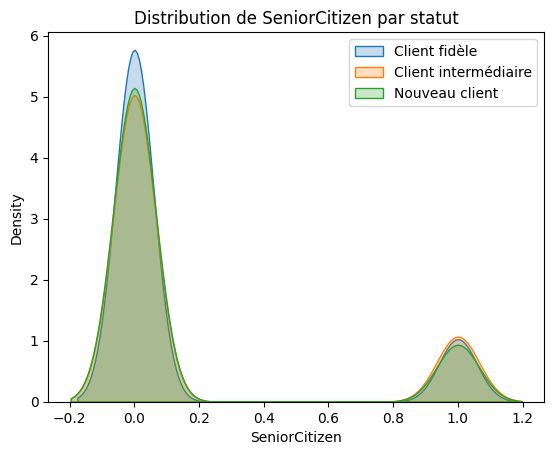

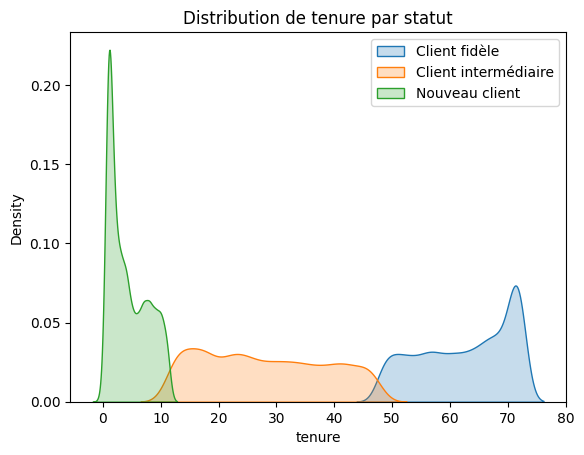

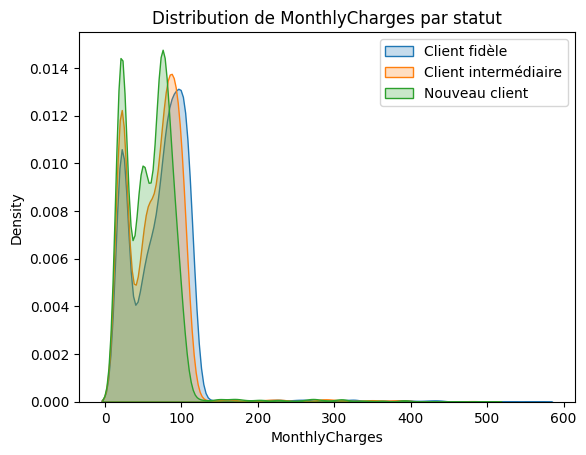

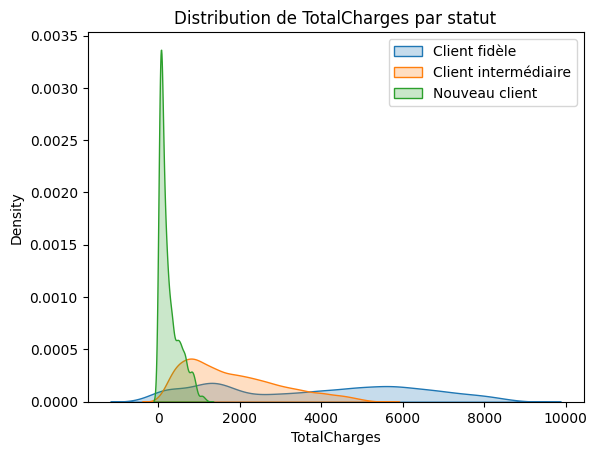

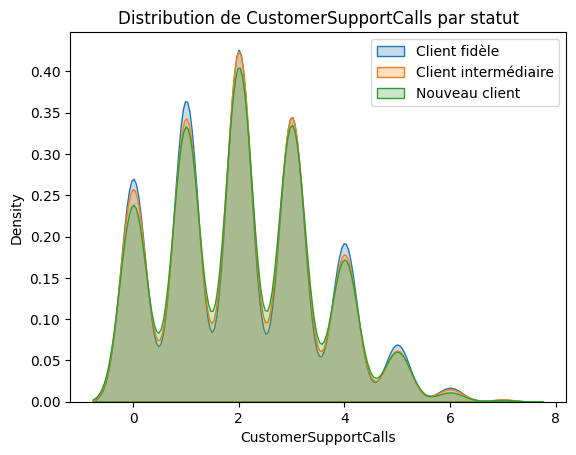

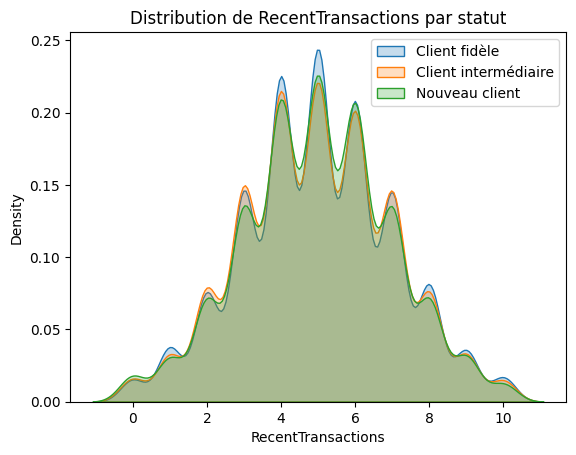

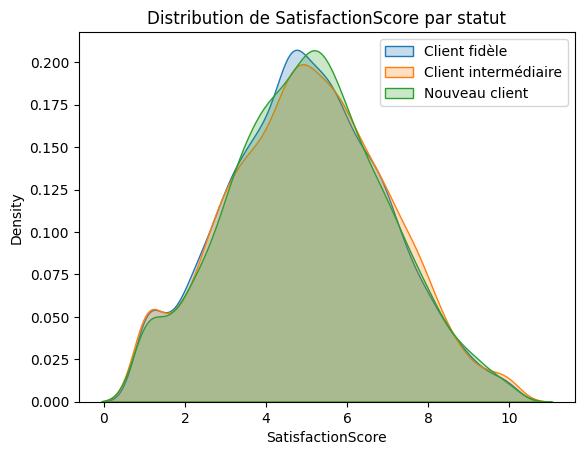

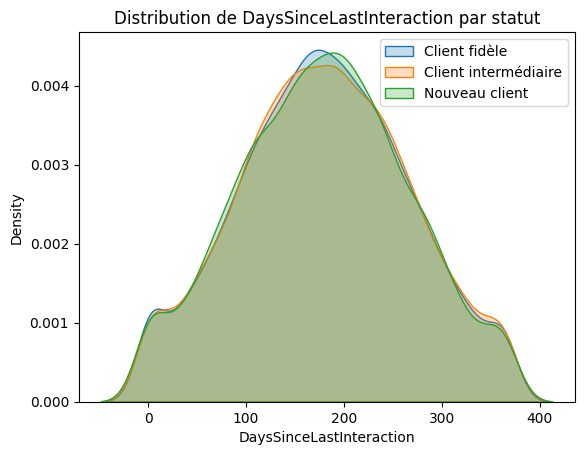

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.kdeplot(df[df['statut'] == cat][col], label=cat, fill=True)  # Remplace shade=True par fill=True
    plt.legend()
    plt.title(f"Distribution de {col} par statut")
    plt.show()


In [59]:
df.dropna().count()

gender                      13262
SeniorCitizen               13262
Partner                     13262
Dependents                  13262
tenure                      13262
PhoneService                13262
MultipleLines               13262
InternetService             13262
OnlineSecurity              13262
OnlineBackup                13262
DeviceProtection            13262
TechSupport                 13262
StreamingTV                 13262
StreamingMovies             13262
Contract                    13262
PaperlessBilling            13262
PaymentMethod               13262
MonthlyCharges              13262
TotalCharges                13262
Churn                       13262
CustomerSupportCalls        13262
RecentTransactions          13262
SatisfactionScore           13262
DaysSinceLastInteraction    13262
statut                      13262
dtype: int64

In [61]:
df.dropna()['Churn'].value_counts(normalize=True)

Churn
0    0.742196
1    0.257804
Name: proportion, dtype: float64

In [62]:
df.shape

(20000, 25)

In [63]:
df_noChurn = df[df['Churn']==0]

In [65]:
df_noChurn.shape

(14778, 25)

In [64]:
df_Churn = df[df['Churn']==1]

In [66]:
df_Churn.shape

(5222, 25)

Comme nos classes ne balancée, faisons une technique d'échantillonnage. Tirons au hasard 5222 individus dans df_noChurn

In [67]:
df_noChurn.sample(5222)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
16609  Female              0      No        Yes    43.0          Yes   
11350  Female              0      No        Yes    49.0          Yes   
1761     Male              0      No         No    39.0           No   
14450    Male              0     Yes         No     NaN          Yes   
13576  Female              0     Yes         No    57.0          Yes   
...       ...            ...     ...        ...     ...          ...   
11325  Female              0     Yes        Yes    68.0          Yes   
12448  Female              0      No         No    12.0          Yes   
12505    Male              0     Yes         No     NaN          Yes   
422      Male              0     Yes        Yes    28.0           No   
6151     Male              0      No         No    13.0          Yes   

          MultipleLines InternetService       OnlineSecurity  \
16609               Yes              No  No internet service   
11350                No              No  No internet service   
1761   No phone service             DSL                   No   
14450               Yes     Fiber optic                  Yes   
13576               Yes     Fiber optic                  Yes   
...                 ...             ...                  ...   
11325               Yes             DSL                   No   
12448                No             DSL                   No   
12505               Yes     Fiber optic                  Yes   
422    No phone service             DSL                  Yes   
6151                 No              No  No internet service   

              OnlineBackup  ... PaperlessBilling              PaymentMethod  \
16609  No internet service  ...              Yes           Electronic check   
11350  No internet service  ...               No    Credit card (automatic)   
1761                    No  ...              Yes           Electronic check   
14450                  Yes  ...              Yes    Credit card (automatic)   
13576                   No  ...              Yes           Electronic check   
...                    ...  ...              ...                        ...   
11325                  Yes  ...               No  Bank transfer (automatic)   
12448                   No  ...               No  Bank transfer (automatic)   
12505                  Yes  ...              Yes  Bank transfer (automatic)   
422                     No  ...               No               Mailed check   
6151   No internet service  ...              Yes           Electronic check   

      MonthlyCharges TotalCharges Churn CustomerSupportCalls  \
16609          25.10      1070.15     0                  0.0   
11350            NaN      1024.65     0                  4.0   
1761             NaN      1494.50     0                  1.0   
14450         108.95      7875.00     0                  0.0   
13576          99.65      5497.05     0                  4.0   
...              ...          ...   ...                  ...   
11325          85.30      5560.00     0                  4.0   
12448          43.80       540.95     0                  2.0   
12505          96.90      4473.45     0                  0.0   
422            50.80      1386.80     0                  4.0   
6151           19.95       253.80     0                  0.0   

      RecentTransactions  SatisfactionScore  DaysSinceLastInteraction  \
16609                6.0                1.3                       0.0   
11350                4.0                4.2                     142.0   
1761                 5.0                3.3                     200.0   
14450                8.0                5.7                     123.0   
13576                4.0                3.5                     179.0   
...                  ...                ...                       ...   
11325                1.0                3.6                     207.0   
12448                4.0                9.2                     282.0  

Ici, nous avons 5222 échantillons tirés au hasard dans notre dataframe df_noChurn

Pour être plus malin

In [68]:
df_noChurn.sample(df_Churn.shape[0])

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7242     Male              0      No         No    56.0          Yes   
7090   Female              0      No         No     1.0          Yes   
864    Female              1      No         No    22.0          Yes   
3332   Female              0      No         No     6.0          Yes   
11231  Female              0     Yes        Yes     8.0          Yes   
...       ...            ...     ...        ...     ...          ...   
12042  Female              0     Yes         No    47.0          Yes   
8312   Female              1     Yes         No     NaN          Yes   
4513   Female              0      No        Yes    66.0          Yes   
6734   Female              1      No         No    14.0           No   
10490  Female              0      No         No    16.0          Yes   

          MultipleLines InternetService       OnlineSecurity  \
7242                 No             DSL                  Yes   
7090                 No             DSL                   No   
864                  No     Fiber optic                  Yes   
3332                Yes     Fiber optic                   No   
11231                No              No  No internet service   
...                 ...             ...                  ...   
12042               Yes     Fiber optic                   No   
8312                 No     Fiber optic                   No   
4513                Yes     Fiber optic                  Yes   
6734   No phone service             DSL                   No   
10490               Yes     Fiber optic                   No   

              OnlineBackup  ... PaperlessBilling              PaymentMethod  \
7242                    No  ...               No               Mailed check   
7090                    No  ...               No    Credit card (automatic)   
864                    Yes  ...               No           Electronic check   
3332                   Yes  ...              Yes           Electronic check   
11231  No internet service  ...               No  Bank transfer (automatic)   
...                    ...  ...              ...                        ...   
12042                   No  ...              Yes           Electronic check   
8312                    No  ...              Yes           Electronic check   
4513                    No  ...              Yes    Credit card (automatic)   
6734                    No  ...              Yes           Electronic check   
10490                   No  ...              Yes    Credit card (automatic)   

      MonthlyCharges TotalCharges Churn CustomerSupportCalls  \
7242           52.70      3019.70     0                  4.0   
7090           43.95        43.95     0                  2.0   
864            81.70      1820.90     0                  2.0   
3332           89.75       552.65     0                  2.0   
11231            NaN       159.35     0                  2.0   
...              ...          ...   ...                  ...   
12042         100.50      4707.10     0                  2.0   
8312           82.90       880.05     0                  1.0   
4513           90.95      5930.05     0                  1.0   
6734           46.35       672.70     0                  3.0   
10490            NaN      1129.35     0                  3.0   

      RecentTransactions  SatisfactionScore  DaysSinceLastInteraction  \
7242                 7.0                2.2                     323.0   
7090                 6.0                5.0                     183.0   
864                  5.0                4.9                       0.0   
3332                 6.0                4.6                     168.0   
11231                2.0                NaN                     261.0   
...                  ...                ...                       ...   
12042                6.0                4.1                     310.0   
8312                 7.0                4.1                     209.0  

In [69]:
balanced_noChurn = df_noChurn.sample(df_Churn.shape[0])

In [73]:
from scipy.stats import ttest_ind
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_noChurn[col].dropna(), df_Churn[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [74]:
for col in numeric_columns:
    print(f'{col :-<50} {t_test(col)}')

SeniorCitizen------------------------------------- H0 Rejetée
tenure-------------------------------------------- H0 Rejetée
MonthlyCharges------------------------------------ H0 Rejetée
TotalCharges-------------------------------------- H0 Rejetée
CustomerSupportCalls------------------------------ 0
RecentTransactions-------------------------------- 0
SatisfactionScore--------------------------------- 0
DaysSinceLastInteraction-------------------------- 0


#### 🛠 Méthodes de test de normalité
1️⃣ Test de Shapiro-Wilk (pour n < 5000)
Recommandé pour les échantillons petits ou moyens.
Sensible aux faibles écarts de normalité.

- p < 0.05 → La distribution n'est pas normale.
- p ≥ 0.05 → La distribution est normale.


In [75]:
from scipy.stats import shapiro

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    stat, p = shapiro(balanced_noChurn[col].dropna())
    print(f"{col} - p-value: {p}")
    if p < 0.05:
        print("🚨 Distribution non normale")
    else:
        print("✅ Distribution normale")


SeniorCitizen - p-value: 4.860874500835379e-86
🚨 Distribution non normale
tenure - p-value: 1.2064601302983084e-43
🚨 Distribution non normale
MonthlyCharges - p-value: 8.92235662918198e-65
🚨 Distribution non normale
TotalCharges - p-value: 4.240475718192688e-53
🚨 Distribution non normale


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5222.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5212.
  res = hypotest_fun_out(*samples, **kwds)


📌 Interprétation des résultats du test de normalité
Les p-values de Shapiro-Wilk sont extrêmement faibles (<< 0.05) pour toutes les variables testées, ce qui signifie que nous rejetons l'hypothèse de normalité pour toutes ces variables.

De plus, un avertissement indique que le test de Shapiro-Wilk peut être moins fiable pour des échantillons > 5000. Dans ce cas, d'autres tests (Kolmogorov-Smirnov, D'Agostino-Pearson) seraient plus adaptés.

📊 Quelle est la meilleure approche maintenant ?
1️⃣ Le test t de Student n'est pas recommandé ici.

Il suppose une distribution normale des données.
Puisque toutes les variables sont non normales, le test pourrait donner des résultats biaisés.
2️⃣ Utiliser un test non paramétrique ✅

Test de Mann-Whitney U : Équivalent non paramétrique du test t de Student, il compare deux échantillons sans supposer la normalité.
Il est robuste aux distributions asymétriques et aux outliers.

In [76]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(col):
    alpha = 0.02  # Niveau de signification
    stat, p = mannwhitneyu(balanced_noChurn[col].dropna(), df_Churn[col].dropna(), alternative='two-sided')
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f'{col :-<50} {mann_whitney_test(col)}')


SeniorCitizen------------------------------------- H0 Rejetée
tenure-------------------------------------------- H0 Rejetée
MonthlyCharges------------------------------------ H0 Rejetée
TotalCharges-------------------------------------- H0 Rejetée


nterprétation :

- Si H0 est rejetée, il y a une différence statistiquement significative entre les groupes (Churn et No Churn).
- Si H0 n'est pas rejetée, alors aucune différence significative n'est détectée.

🔍 Conclusion
Le test de Student n’est pas adapté car les données ne suivent pas une loi normale.
Optez pour un test non paramétrique comme Mann-Whitney U pour comparer les distributions.
Vérifiez également la distribution graphique des variables (boxplots, histogrammes) pour mieux comprendre leur comportement.


📌 Interprétation des résultats du test de Mann-Whitney U
Le test a rejeté H0 pour toutes les variables testées, ce qui signifie qu'il y a une différence statistiquement significative entre les groupes Churn (1) et No Churn (0) pour ces variables.

🔎 Que signifient ces résultats ?
SeniorCitizen :
➝ Les clients plus âgés (SeniorCitizen = 1) ont un comportement significativement différent en matière de churn.
tenure (ancienneté) :
➝ Les clients qui résilient ont une durée d’abonnement différente de ceux qui restent.
MonthlyCharges (facture mensuelle) :
➝ Le montant des factures mensuelles joue un rôle clé dans la résiliation.
TotalCharges (facture totale) :
➝ La somme payée depuis le début du contrat impacte aussi la probabilité de churn.
📊 Que faire maintenant ?
1️⃣ Visualiser ces différences
➝ Utiliser des boxplots ou des violins plots pour voir comment ces variables diffèrent entre les groupes.

2️⃣ Créer des groupes / segments pour mieux analyser les tendances
➝ Ex : Catégoriser tenure en "Nouveau client", "Intermédiaire", "Ancien client" pour voir quel segment churn le plus.

3️⃣ Utiliser ces variables dans un modèle prédictif
➝ Puisqu'elles sont significativement différentes, elles sont potentiellement prédictives du churn.

---
📌 Tester la normalité avant le test t de Student : est-ce nécessaire ?
Oui, il est recommandé de tester la normalité des données avant d’appliquer le test t de Student. Le test t suppose que les échantillons suivent une distribution normale (surtout pour les petits échantillons).

Cependant, voici les points à considérer dans votre cas :

✅ Cas où le test de normalité est pertinent :
Si la taille des échantillons est petite (n < 30), la loi des grands nombres ne s’applique pas encore bien. Tester la normalité est donc essentiel avant d’utiliser un test paramétrique comme Student.
Si vous souhaitez vérifier l’adéquation au test t par rigueur statistique, un test de normalité est pertinent.
❌ Cas où on peut s’en passer :
Avec un échantillon suffisamment grand (n > 30), le test t de Student est robuste aux violations de normalité grâce au théorème central limite (TCL).
Vous avez déjà effectué un rééquilibrage (échantillonnage aléatoire), ce qui atténue certains effets des distributions extrêmes.
🛠 Comment tester la normalité ?
1️⃣ Test de Shapiro-Wilk (recommandé pour n < 5000)

````python
from scipy.stats import shapiro

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    stat, p = shapiro(balanced_noChurn[col].dropna())
    print(f"{col} - p-value: {p}")
    if p < 0.05:
        print("🚨 Distribution non normale")
    else:
        print("✅ Distribution normale")
🔹 Si p < 0.05 → La distribution n'est pas normale → Le test t peut être biaisé.
🔹 Si p ≥ 0.05 → La distribution est normale → Le test t est valide.
````

2️⃣ Test de Kolmogorov-Smirnov (échantillons > 5000)

````python
from scipy.stats import ks_1samp

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    stat, p = ks_1samp(balanced_noChurn[col].dropna(), 'norm')
    print(f"{col} - p-value: {p}")
````

🔄 Alternative si la normalité est violée : utiliser un test non paramétrique
Si la normalité est rejetée, utilisez le test de Mann-Whitney (U de Wilcoxon) à la place du test t de Student :

````python
from scipy.stats import mannwhitneyu

def mann_whitney(col):
    stat, p = mannwhitneyu(balanced_noChurn[col].dropna(), df_Churn[col].dropna(), alternative='two-sided')
    return "H0 Rejetée" if p < 0.02 else "0"

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f'{col :-<50} {mann_whitney(col)}')
````

✅ Ce test ne suppose pas de normalité et est plus adapté si vos distributions sont asymétriques.

📌 Conclusion
Tester la normalité n'est pas indispensable pour des grands échantillons (> 30), mais peut être utile pour bien valider l'hypothèse du test t de Student.
Si la normalité est violée, privilégiez un test non paramétrique comme Mann-Whitney.
Dans la pratique, le test t reste robuste sauf en cas de distributions très asymétriques ou avec de petits effectifs.

📌 Tester la normalité des données avant d'appliquer le test t de Student
Pour s’assurer que les données suivent une distribution normale, on peut utiliser plusieurs tests statistiques. Voici les plus courants :

🛠 Méthodes de test de normalité
1️⃣ Test de Shapiro-Wilk (pour n < 5000)
Recommandé pour les échantillons petits ou moyens.
Sensible aux faibles écarts de normalité.

````python
from scipy.stats import shapiro

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    stat, p = shapiro(balanced_noChurn[col].dropna())
    print(f"{col} - p-value: {p}")
    if p < 0.05:
        print("🚨 Distribution non normale")
    else:
        print("✅ Distribution normale")
````

p < 0.05 → La distribution n'est pas normale.
p ≥ 0.05 → La distribution est normale.
2️⃣ Test de Kolmogorov-Smirnov (pour n > 5000)
Fonctionne pour de grands échantillons.
Compare la distribution des données à une distribution normale.

````python
from scipy.stats import ks_1samp
import numpy as np

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    stat, p = ks_1samp(balanced_noChurn[col].dropna(), 'norm', args=(np.mean(balanced_noChurn[col]), np.std(balanced_noChurn[col])))
    print(f"{col} - p-value: {p}")

````
p < 0.05 → La distribution n'est pas normale.
p ≥ 0.05 → La distribution est normale.

3️⃣ Test de normalité de D'Agostino et Pearson (puissant pour tous les n)
Test puissant basé sur l’asymétrie et l’aplatissement de la distribution.

````python
from scipy.stats import normaltest

for col in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    stat, p = normaltest(balanced_noChurn[col].dropna())
    print(f"{col} - p-value: {p}")
    if p < 0.05:
        print("🚨 Distribution non normale")
    else:
        print("✅ Distribution normale")
````

🔄 Que faire si les données ne sont pas normales ?
Si un ou plusieurs tests rejettent la normalité (p < 0.05), vous pouvez :
✅ Utiliser un test non paramétrique (ex : Mann-Whitney U au lieu de Student).
✅ Effectuer une transformation des données (logarithmique, racine carrée, Box-Cox).
✅ Continuer avec le test t si n > 30 (il est robuste aux violations de normalité).

📌 Conclusion
Shapiro-Wilk est idéal pour n < 5000, Kolmogorov-Smirnov pour n > 5000.
D'Agostino et Pearson fonctionne bien pour tous les échantillons.
Si la normalité est violée, privilégiez des tests non paramétriques.

# 📌 Pre-processing des Données en Machine Learning

Le **pre-processing** est souvent l'étape la plus longue et la plus complexe dans le travail d'un Data Scientist.  
Il s'agit de **préparer les données** avant de les fournir à un modèle d'apprentissage automatique.

## 🎯 Objectifs du Pre-processing
1. **Mettre les données dans un format optimal** pour le développement du Machine Learning :
   - 🔹 Séparation des données en **Train / Test**
   - 🔹 **Encodage** des variables catégorielles
   - 🔹 **Nettoyage des valeurs manquantes** (NaN)
   
2. **Obtenir un dataset propre** pour améliorer la performance du modèle :
   - 🏆 **Feature Selection** → Sélection des variables les plus pertinentes  
   - 🏗 **Feature Engineering** → Création de nouvelles variables  
   - 📏 **Feature Scaling** → Normalisation ou standardisation des variables  
   - 🚨 **Suppression des outliers** → Élimination des valeurs aberrantes  

---

## 🛠 Étapes possibles du Pre-processing

✅ **Encodage des données** (One-hot encoding, Label encoding...)  
✅ **Normalisation et standardisation**  
✅ **Gestion des valeurs manquantes** (imputation, suppression...)  
✅ **Suppression des valeurs aberrantes**  
✅ **Réduction de la dimensionnalité** (PCA, SelectKBest...)  
✅ **Extraction de caractéristiques**  

---

## 📊 Diagnostic du Modèle et Ajustements
Avant d'aller plus loin avec la normalisation ou la sélection de variables, **on entraîne un premier modèle** et on analyse ses performances :

🔴 **Si le modèle est en Overfitting** → Trop de complexité ?  
➡ **Actions possibles** : Réduction du nombre de variables, régularisation, simplification du modèle.  

🔵 **Si le modèle est en Underfitting** → Manque de complexité ?  
➡ **Actions possibles** : Ajout de nouvelles variables, Feature Engineering, modèle plus complexe.

💡 **L'approche itérative** est essentielle : on ajuste et améliore le modèle en fonction des résultats observés.

---

### ✅ En résumé :
Le **pre-processing** est une étape cruciale qui influence directement les performances du modèle. Un bon pipeline de traitement des données peut faire toute la différence dans un projet de Machine Learning !

📌 **Passons maintenant à l'implémentation !** 🚀


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                20000 non-null  object 
 1   gender                    20000 non-null  object 
 2   SeniorCitizen             20000 non-null  int64  
 3   Partner                   20000 non-null  object 
 4   Dependents                20000 non-null  object 
 5   tenure                    17149 non-null  float64
 6   PhoneService              20000 non-null  object 
 7   MultipleLines             20000 non-null  object 
 8   InternetService           20000 non-null  object 
 9   OnlineSecurity            20000 non-null  object 
 10  OnlineBackup              20000 non-null  object 
 11  DeviceProtection          20000 non-null  object 
 12  TechSupport               20000 non-null  object 
 13  StreamingTV               20000 non-null  object 
 14  Stream

In [100]:
df1 = data.copy()

In [101]:
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4795-UXVCJ    Male              0      No         No     NaN          Yes   
1  7450-NWRTR    Male              1      No         No    12.0          Yes   
2  8044-BGWPI    Male              0     Yes        Yes    12.0          Yes   
3  5982-PSMKW  Female              0     Yes        Yes    23.0          Yes   
4  0684-AOSIH    Male              0     Yes         No     1.0          Yes   

  MultipleLines InternetService       OnlineSecurity  ...        Contract  \
0            No              No  No internet service  ...        One year   
1           Yes     Fiber optic                   No  ...  Month-to-month   
2            No              No  No internet service  ...  Month-to-month   
3           Yes             DSL                  Yes  ...        Two year   
4            No     Fiber optic                  Yes  ...  Month-to-month   

  PaperlessBilling            PaymentMethod MonthlyCharges TotalCharges Churn  \
0               No  Credit card (automatic)       19.80000        457.3    No   
1              Yes         Electronic check       99.45000      1200.15   Yes   
2              Yes         Electronic check       21.15000       306.05    No   
3              Yes  Credit card (automatic)            NaN       2198.3    No   
4              Yes         Electronic check      387.90254           95   Yes   

  CustomerSupportCalls RecentTransactions  SatisfactionScore  \
0                  3.0                3.0                7.8   
1                  5.0                6.0                6.7   
2                  2.0                4.0                6.0   
3                  4.0                5.0                2.9   
4                  3.0                4.0                7.5   

  DaysSinceLastInteraction  
0                    173.0  
1                    334.0  
2                    267.0  
3                    219.0  
4                    199.0  

[5 rows x 25 columns]

In [102]:
# Nettoyage des données
df1.drop(columns=["customerID"], inplace=True)  # Suppression de l'ID

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    20000 non-null  object 
 1   SeniorCitizen             20000 non-null  int64  
 2   Partner                   20000 non-null  object 
 3   Dependents                20000 non-null  object 
 4   tenure                    17149 non-null  float64
 5   PhoneService              20000 non-null  object 
 6   MultipleLines             20000 non-null  object 
 7   InternetService           20000 non-null  object 
 8   OnlineSecurity            20000 non-null  object 
 9   OnlineBackup              20000 non-null  object 
 10  DeviceProtection          20000 non-null  object 
 11  TechSupport               20000 non-null  object 
 12  StreamingTV               20000 non-null  object 
 13  StreamingMovies           20000 non-null  object 
 14  Contra

# 📊 Analyse et Plan de Pre-processing

Ton dataset contient **20 000 observations** et **25 colonnes** avec différents types de données.  
Voici quelques observations importantes pour le **pre-processing** :

---

## 🔍 Problèmes détectés  

### 📌 Colonnes avec des valeurs manquantes :  
- **tenure** → ≈ **2 851** valeurs manquantes  
- **MonthlyCharges** → ≈ **2 837** valeurs manquantes  
- **SatisfactionScore** → ≈ **1 000** valeurs manquantes  
- **DaysSinceLastInteraction** → ≈ **1 000** valeurs manquantes  

### 📌 Type de données incorrect :  
- **TotalCharges** est stocké en `object` alors qu'il devrait être un `float`.  

### 📌 Colonnes catégoriques nécessitant un encodage :  
- **18 colonnes** sont de type `object`, elles doivent être encodées avant utilisation dans un modèle ML.  

### 📌 Présence de variables binaires stockées en `object` :  
- **Partner, Dependents, PhoneService, PaperlessBilling, Churn** → doivent être converties en **0/1**.  

---

## 🛠 Plan de Pre-processing  

✅ **1. Gestion des valeurs manquantes**  
- Stratégie à définir : **suppression (`dropna`)** ou **imputation (moyenne/médiane/mode)**.  

✅ **2. Conversion des types**  
- **TotalCharges** → `float`  

✅ **3. Encodage des variables catégoriques**  
- **Label Encoding** pour les variables binaires.  
- **One-Hot Encoding** pour les variables à plus de 2 catégories (**InternetService, Contract, PaymentMethod**, etc.).  

✅ **4. Normalisation des variables continues**  
- **MonthlyCharges, TotalCharges, tenure, SatisfactionScore** → `StandardScaler` ou `MinMaxScaler`.  

✅ **5. Suppression des outliers**  
- Détection avec **boxplots** ou **méthode IQR**.  

---

📌 **Prochaine étape** : veux-tu une implémentation Python de ces étapes ? 🚀  


In [103]:
# Afficher les colonnes avec des valeurs manquantes
df1.isnull().sum()


gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                      2851
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges              2837
TotalCharges                   0
Churn                          0
CustomerSupportCalls           0
RecentTransactions             0
SatisfactionScore           1000
DaysSinceLastInteraction    1000
dtype: int64

In [400]:
df1['TotalCharges']

0          457.3
1        1200.15
2         306.05
3         2198.3
4             95
          ...   
19995     272.35
19996    2010.95
19997     6227.5
19998      168.6
19999     8152.3
Name: TotalCharges, Length: 20000, dtype: object

In [104]:
# Conversion de 'TotalCharges' en float
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], errors='coerce')


In [402]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    20000 non-null  object 
 1   SeniorCitizen             20000 non-null  int64  
 2   Partner                   20000 non-null  object 
 3   Dependents                20000 non-null  object 
 4   tenure                    17149 non-null  float64
 5   PhoneService              20000 non-null  object 
 6   MultipleLines             20000 non-null  object 
 7   InternetService           20000 non-null  object 
 8   OnlineSecurity            20000 non-null  object 
 9   OnlineBackup              20000 non-null  object 
 10  DeviceProtection          20000 non-null  object 
 11  TechSupport               20000 non-null  object 
 12  StreamingTV               20000 non-null  object 
 13  StreamingMovies           20000 non-null  object 
 14  Contra

In [105]:
df1.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0      No         No     NaN          Yes   
1    Male              1      No         No    12.0          Yes   
2    Male              0     Yes        Yes    12.0          Yes   
3  Female              0     Yes        Yes    23.0          Yes   
4    Male              0     Yes         No     1.0          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0            No              No  No internet service  No internet service   
1           Yes     Fiber optic                   No                   No   
2            No              No  No internet service  No internet service   
3           Yes             DSL                  Yes                  Yes   
4            No     Fiber optic                  Yes                   No   

   ...        Contract PaperlessBilling            PaymentMethod  \
0  ...        One year               No  Credit card (automatic)   
1  ...  Month-to-month              Yes         Electronic check   
2  ...  Month-to-month              Yes         Electronic check   
3  ...        Two year              Yes  Credit card (automatic)   
4  ...  Month-to-month              Yes         Electronic check   

  MonthlyCharges TotalCharges Churn CustomerSupportCalls  RecentTransactions  \
0       19.80000       457.30    No                  3.0                 3.0   
1       99.45000      1200.15   Yes                  5.0                 6.0   
2       21.15000       306.05    No                  2.0                 4.0   
3            NaN      2198.30    No                  4.0                 5.0   
4      387.90254        95.00   Yes                  3.0                 4.0   

   SatisfactionScore DaysSinceLastInteraction  
0                7.8                    173.0  
1                6.7                    334.0  
2                6.0                    267.0  
3                2.9                    219.0  
4                7.5                    199.0  

[5 rows x 24 columns]

In [106]:
df1.shape

(20000, 24)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    20000 non-null  object 
 1   SeniorCitizen             20000 non-null  int64  
 2   Partner                   20000 non-null  object 
 3   Dependents                20000 non-null  object 
 4   tenure                    17149 non-null  float64
 5   PhoneService              20000 non-null  object 
 6   MultipleLines             20000 non-null  object 
 7   InternetService           20000 non-null  object 
 8   OnlineSecurity            20000 non-null  object 
 9   OnlineBackup              20000 non-null  object 
 10  DeviceProtection          20000 non-null  object 
 11  TechSupport               20000 non-null  object 
 12  StreamingTV               20000 non-null  object 
 13  StreamingMovies           20000 non-null  object 
 14  Contra

## Encodage

### Variables Qualitatives

In [21]:
for col in df1.select_dtypes('object'):
  print(f'{col: <50} {df1[col].unique()}')

Churn                                              ['No' 'Yes']
gender                                             ['Male' 'Female']
Partner                                            ['No' 'Yes']
Dependents                                         ['No' 'Yes']
PhoneService                                       ['Yes' 'No']
MultipleLines                                      ['No' 'Yes' 'No phone service']
InternetService                                    ['No' 'Fiber optic' 'DSL']
OnlineSecurity                                     ['No internet service' 'No' 'Yes']
OnlineBackup                                       ['No internet service' 'No' 'Yes']
DeviceProtection                                   ['No internet service' 'Yes' 'No']
TechSupport                                        ['No internet service' 'No' 'Yes']
StreamingTV                                        ['No internet service' 'Yes' 'No']
StreamingMovies                                    ['No internet service' 'Yes' 'No'

## Fonction **suppression** des valeurs manquantes

In [82]:
# Fonction suppression des NaN
def impute_missing_values(df):
  return df.dropna(axis=0)

## Fonction imputation des valeurs manquantes par une valeur constante **(-999)**

In [132]:
# Fonction
def impute_missing_values(df):
  return df.fillna(-999)

## Fonction imputation des valeurs manquantes par **la médiane** (int et float) et par **le mode** (object)

In [107]:
import pandas as pd

def impute_missing_values(df):
    """
    Gère les valeurs manquantes :
    - Colonnes numériques → remplissage par la médiane.
    - Colonnes catégoriques → remplissage par la valeur la plus fréquente (mode).

    Paramètre :
    - df : DataFrame avec valeurs manquantes.

    Retourne :
    - df_imputed : DataFrame sans valeurs manquantes.
    """
    df_imputed = df.copy()

    # 🔹 Identification des colonnes numériques et catégoriques
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    # 🔹 Imputation des valeurs manquantes pour les colonnes numériques (médiane)
    for col in num_cols:
        if df_imputed[col].isnull().sum() > 0:
            df_imputed[col].fillna(df_imputed[col].median(), inplace=True)

    # 🔹 Imputation des valeurs manquantes pour les colonnes catégoriques (mode)
    for col in cat_cols:
        if df_imputed[col].isnull().sum() > 0:
            df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)

    print("✅ Imputation terminée !")
    print(f"🔹 {len(num_cols)} variables numériques imputées (médiane) :", num_cols)
    print(f"🔹 {len(cat_cols)} variables catégoriques imputées (mode) :", cat_cols)
    print("📌 Vérification post-imputation :", df_imputed.isnull().sum().sum(), "valeurs manquantes restantes.")

    return df_imputed


In [156]:
df_imputed = impute_missing_values(df1)

✅ Imputation terminée !
🔹 8 variables numériques imputées (médiane) : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'CustomerSupportCalls', 'RecentTransactions', 'SatisfactionScore', 'DaysSinceLastInteraction']
🔹 16 variables catégoriques imputées (mode) : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
📌 Vérification post-imputation : 0 valeurs manquantes restantes.


<ipython-input-155-ebdcf720ec12>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].median(), inplace=True)


## Fonction encodage des variables **catégorielles**

In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_categorical_variables(df):
    """
    Encode automatiquement les variables catégoriques :
    - Label Encoding pour les variables binaires (2 catégories)
    - One-Hot Encoding pour les variables multi-catégories (>2 catégories)

    Paramètre :
    - df : DataFrame original (avec variables catégoriques)

    Retourne :
    - df_encoded : DataFrame avec variables encodées
    """
    df_encoded = df.copy()

    # 🔹 Détection automatique des variables catégoriques
    categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

    # 🔹 Séparation des variables binaires et multi-catégories
    binary_vars = [col for col in categorical_vars if df[col].nunique() == 2]
    multi_category_vars = [col for col in categorical_vars if df[col].nunique() > 2]

    # 🔹 Label Encoding des variables binaires
    label_encoder = LabelEncoder()
    for col in binary_vars:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    # 🔹 One-Hot Encoding des variables multi-catégories
    df_encoded = pd.get_dummies(df_encoded, columns=multi_category_vars, drop_first=True)

    print("✅ Encodage terminé !")
    print(f"🔹 {len(binary_vars)} variables binaires encodées :", binary_vars)
    print(f"🔹 {len(multi_category_vars)} variables multi-catégoriques encodées :", multi_category_vars)
    print("📌 Nouvelles colonnes :", df_encoded.columns.tolist())

    return df_encoded


In [160]:
df_encoded = encode_categorical_variables(df1)

✅ Encodage terminé !
🔹 6 variables binaires encodées : ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
🔹 11 variables multi-catégoriques encodées : ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
📌 Nouvelles colonnes : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CustomerSupportCalls', 'RecentTransactions', 'SatisfactionScore', 'DaysSinceLastInteraction', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', '

# Feature Engineering

# Pre-processing

In [109]:
def preprocessing(df):
    df = impute_missing_values(df)  # ✅ D'abord, on gère les NaN
    df = encode_categorical_variables(df)  # ✅ Puis on encode proprement
    return df


In [110]:
df1 = preprocessing(df1)

✅ Imputation terminée !
🔹 8 variables numériques imputées (médiane) : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'CustomerSupportCalls', 'RecentTransactions', 'SatisfactionScore', 'DaysSinceLastInteraction']
🔹 16 variables catégoriques imputées (mode) : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
📌 Vérification post-imputation : 0 valeurs manquantes restantes.
✅ Encodage terminé !
🔹 6 variables binaires encodées : ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
🔹 10 variables multi-catégoriques encodées : ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
📌 Nouvelles colonnes : ['gender', 'SeniorCitizen', 'Partner', '

<ipython-input-107-ebdcf720ec12>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].median(), inplace=True)


In [111]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        0           0    29.0             1   
1       1              1        0           0    12.0             1   
2       1              0        1           1    12.0             1   
3       0              0        1           1    23.0             1   
4       1              0        1           0     1.0             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 0        19.80000        457.30      0  ...   
1                 1        99.45000       1200.15      1  ...   
2                 1        21.15000        306.05      0  ...   
3                 1        70.70000       2198.30      0  ...   
4                 1       387.90254         95.00      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                             True            False   
1            False                            False             True   
2            False                             True            False   
3             True                            False             True   
4            False                            False             True   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                 True                False   
1                                False                 True   
2                                 True                False   
3                                False                 True   
4                                False                 True   

   Contract_One year  Contract_Two year  \
0               True              False   
1              False              False   
2              False              False   
3              False               True   
4              False              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                   True                           False   
1                                  False                            True   
2                                  False                            True   
3                                   True                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  

[5 rows x 35 columns]

# Données à près sélection de variables importantes à partir du modèle 3

In [207]:
# 📌 Liste des variables importantes identifiées
selected_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "RecentTransactions",
    "SatisfactionScore",
    "DaysSinceLastInteraction",
    "InternetService_Fiber optic",
    "Contract_One year",
    "Contract_Two year"
]


In [208]:
# 🔹 Étape 1 : Mettre à jour X avec uniquement ces variables
df1 = df1[['Churn'] + selected_features]

df1.head()

Churn  tenure  MonthlyCharges  TotalCharges  RecentTransactions  \
0      0    29.0        19.80000        457.30                 3.0   
1      1    12.0        99.45000       1200.15                 6.0   
2      0    12.0        21.15000        306.05                 4.0   
3      0    23.0        70.70000       2198.30                 5.0   
4      1     1.0       387.90254         95.00                 4.0   

   SatisfactionScore  DaysSinceLastInteraction  InternetService_Fiber optic  \
0                7.8                     173.0                        False   
1                6.7                     334.0                         True   
2                6.0                     267.0                        False   
3                2.9                     219.0                        False   
4                7.5                     199.0                         True   

   Contract_One year  Contract_Two year  
0               True              False  
1              False              False  
2              False              False  
3              False               True  
4              False              False

Ta fonction preprocessing() est bien structurée ! 🚀 Elle applique d'abord l'encodage des variables catégoriques, puis l'imputation des valeurs manquantes.

📌 Vérification rapide
Juste une question :
👉 Est-ce que l'encodage (encode_categorical_variables()) se fait bien avant l'imputation ?
➡️ Car si certaines colonnes catégoriques ont des NaN, l'encodage pourrait échouer. 😬

Si l'imputation n'a pas encore été appliquée avant l'encodage, il vaudrait mieux inverser les étapes :

📊 Avantage :
- ✅ Pas de problème de NaN pendant l'encodage.
- ✅ Assure un dataset propre avant toute transformation.

In [209]:
df1.head()

Churn  tenure  MonthlyCharges  TotalCharges  RecentTransactions  \
0      0    29.0        19.80000        457.30                 3.0   
1      1    12.0        99.45000       1200.15                 6.0   
2      0    12.0        21.15000        306.05                 4.0   
3      0    23.0        70.70000       2198.30                 5.0   
4      1     1.0       387.90254         95.00                 4.0   

   SatisfactionScore  DaysSinceLastInteraction  InternetService_Fiber optic  \
0                7.8                     173.0                        False   
1                6.7                     334.0                         True   
2                6.0                     267.0                        False   
3                2.9                     219.0                        False   
4                7.5                     199.0                         True   

   Contract_One year  Contract_Two year  
0               True              False  
1              False              False  
2              False              False  
3              False               True  
4              False              False

# Données à près pre-processing

In [112]:
X = df1.drop(columns=["Churn"])
y = df1["Churn"]

In [113]:
# Importation depuis le module model_selection la fonction train_test_split
from sklearn.model_selection import train_test_split

# Instantiation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

✔ train_test_split est une fonction de sklearn.model_selection utilisée pour diviser un dataset en un ensemble d'entraînement et un ensemble de test.

### 📌 Ce que fait ce code :

Il divise df1 en deux sous-ensembles :
- trainset (80% des données) → Utilisé pour entraîner le modèle.
- testset (20% des données) → Utilisé pour évaluer le modèle.

### 🚀 Résumé :

Ce code prépare le dataset en séparant les données en train/test pour entraîner un modèle de Machine Learning.

### 📌 Paramètres de `train_test_split`

| **Paramètre**       | **Description** |
|---------------------|----------------|
| `df1`              | Le DataFrame à diviser (contenant les données prétraitées). |
| `test_size=0.2`    | 20% des données seront réservées pour le jeu de test. |
| `random_state=0`   | Assure que la répartition reste reproductible (pour obtenir les mêmes ensembles à chaque exécution). |


In [191]:
y_train.value_counts()

Churn
0    11839
1     4161
Name: count, dtype: int64

In [192]:
y_test.value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

In [27]:
y_train.shape

(16000,)

In [28]:
y_test.shape

(4000,)

## Modélisation Initiale

A ce stade, nous avons la version la simple, la plus basique de notre preprocessing. Notre dataset est près, on peut entrainer un modèle.

Ce que j'aime faire en général, c'est de créer un arbre de décision parce que ce sont des modèles extrêmement rapide et extrêmement facile à comprendre pour diagnotiquer le modèle (quelles sont les variables importantes?)

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
model_0 = RandomForestClassifier(random_state=0)

## Moélisation à partir de variables

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [269]:
# Transformation du modèle en modèle de pipeline
model_1 = make_pipeline(SelectKBest(f_classif, k=10),
                      DecisionTreeClassifier(random_state=0))

# Moélisation à partir de variables 2

In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [271]:
# Transformation du modèle en modèle de pipeline
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=15),
                      DecisionTreeClassifier(random_state=0))

# Modélisation avec liste de plusieurs modèles

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [118]:
from sklearn.feature_selection import VarianceThreshold

preprocessor = make_pipeline(
    #PolynomialFeatures(2, include_bias=False),
    #VarianceThreshold(threshold=0.01),  # Supprime les features trop constantes
    SelectKBest(f_classif, k=15)
)


In [119]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
#DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

# Ici chaque modèle avec ses réglages d'origine

In [120]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    #'DecisionTree': DecisionTreeClassifier,
    'SVM': SVM,
    'KNN': KNN
    }

## Procedure d'évaluation

In [121]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# La fonction learning_curve est utile pour comprendre si notre modèle est en Overffting ou Underffiting
# et à partir de là, on va prendre des décisions: essayer de faire de la sélection de variables ou de créer
# des polynômes
from sklearn.model_selection import learning_curve

In [54]:
# Création de la fonction d'évaluation dans laquelle on va faire passer notre modèle et dans cette fonction
def evaluation(model):
  # Entraînement du model
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

In [122]:
# Création de la fonction d'évaluation dans laquelle on va faire passer notre modèle et dans cette fonction
def evaluation(model):
  # Entraînement du model
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train,
                                             cv=4, scoring='f1',
                                             train_sizes=np.linspace(0.1, 1, 10))

  plt.figure(figsize=(8, 4))
  plt.plot(N, train_score.mean(axis=1), label='Train Score', marker='o')
  plt.plot(N, val_score.mean(axis=1), label='Validation Score', marker='s')
  plt.xlabel("Nombre d'échantillons d'entraînement")
  plt.ylabel("F1-score")
  plt.legend()
  plt.title("Courbe d'apprentissage")
  plt.show()


Évaluation du modèle : RandomForest
[[2837  102]
 [ 149  912]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2939
           1       0.90      0.86      0.88      1061

    accuracy                           0.94      4000
   macro avg       0.92      0.91      0.92      4000
weighted avg       0.94      0.94      0.94      4000



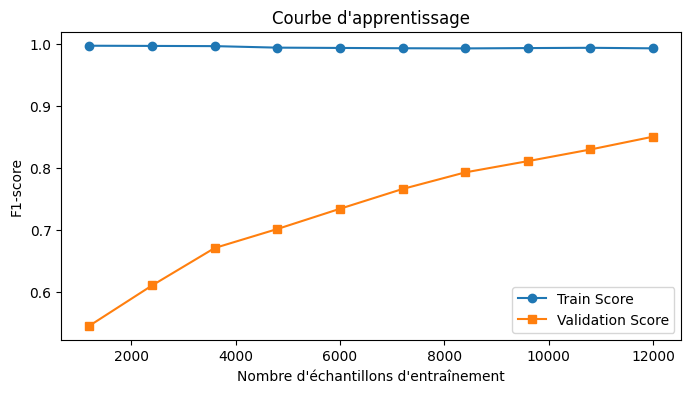

Évaluation du modèle : AdaBoost
[[2662  277]
 [ 554  507]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      2939
           1       0.65      0.48      0.55      1061

    accuracy                           0.79      4000
   macro avg       0.74      0.69      0.71      4000
weighted avg       0.78      0.79      0.78      4000



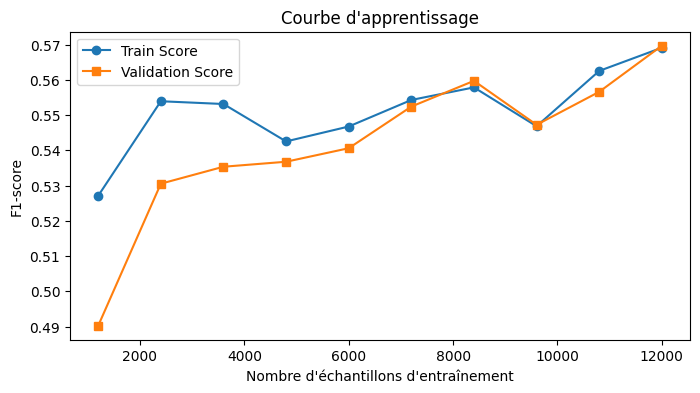

Évaluation du modèle : SVM
[[2668  271]
 [ 568  493]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2939
           1       0.65      0.46      0.54      1061

    accuracy                           0.79      4000
   macro avg       0.73      0.69      0.70      4000
weighted avg       0.78      0.79      0.78      4000



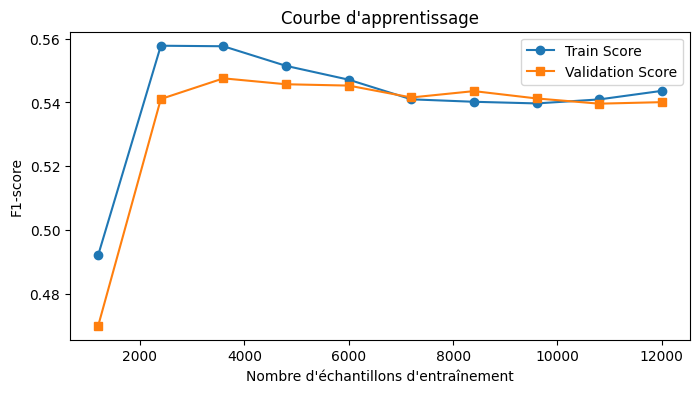

Évaluation du modèle : KNN
[[2676  263]
 [ 390  671]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2939
           1       0.72      0.63      0.67      1061

    accuracy                           0.84      4000
   macro avg       0.80      0.77      0.78      4000
weighted avg       0.83      0.84      0.83      4000



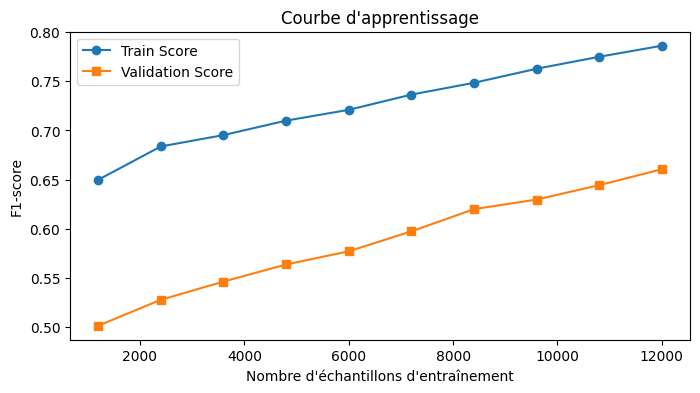

In [480]:
for model_name, model in dict_of_models.items():  # .items() pour afficher le nom du modèle
    print(f"Évaluation du modèle : {model_name}")
    evaluation(model)


Ci-haut les courbes d'apprentissage du modèle en cours et là on va commencer à faire le diagnotic. Donc là que voit on:

- On voit tout de suite que notre modèle est en Overffiting. Pourquoi? Eh bien, Parce que le modèle a un score de 100% sur les données du train, il à parfaitement appris ses leçon, ok sur le train_set
- Par contre, il est incapable de généraliser sur de nouveaux cas. Quand on lui montre les données du validation set, on obtient une performance f1 beaucoup moins bonne.
Au mieux, on obtient 65% environs, mais ce grand écart, nous indique que le modèle est en overffiting.

A partir de là, on peut donc essayer de modifier notre dataset pour lutter contre cet overffiting. Par exemple, on peut commencer par lui fournir plus de données à la machine. En génaral, c'est quelque chose qui fonctionne contre l'overffiting. En plus, on dirait qu'on est entrain de monter progressivement (plus on a de données, plus le score sur la validation augmente).

# Optimisation

In [482]:
from sklearn.model_selection import GridSearchCV

In [481]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest', SelectKBest(k=15))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

# Modèle 1 SVC

In [483]:
# ⚡ Définir la grille de paramètres
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Test de plusieurs valeurs de C
    #'svc__kernel': ['linear', 'rbf', 'poly'],  # Différents noyaux
    'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Différentes valeurs pour gamma
}

In [484]:
grid_search = GridSearchCV(SVM, param_grid, scoring='recall', cv=4)

grid_search.fit(X_train, y_train)

# 🔍 Meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# 🔥 Meilleure performance
print("Meilleur score F1 :", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

Meilleurs hyperparamètres : {'svc__C': 100, 'svc__gamma': 1}
Meilleur score F1 : 0.5734166020099017
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2939
           1       0.64      0.56      0.60      1061

    accuracy                           0.80      4000
   macro avg       0.74      0.72      0.73      4000
weighted avg       0.79      0.80      0.79      4000



# Entrainement du modèle SVC

[[2598  341]
 [ 465  596]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2939
           1       0.64      0.56      0.60      1061

    accuracy                           0.80      4000
   macro avg       0.74      0.72      0.73      4000
weighted avg       0.79      0.80      0.79      4000



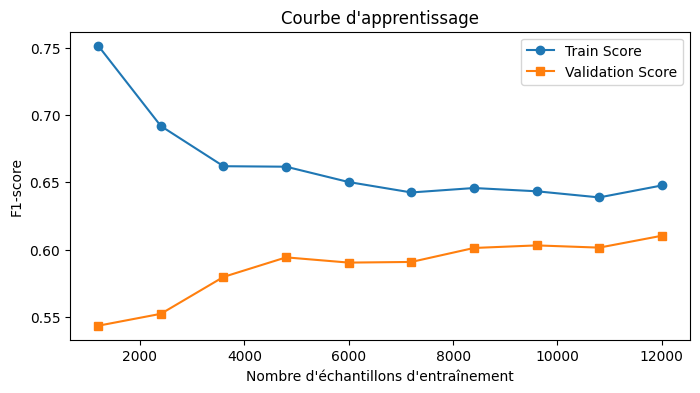

In [485]:
evaluation(grid_search.best_estimator_)

# Modèle 2 SVC

In [124]:
import psutil
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# 🖥️ Vérifier la mémoire disponible avant de commencer
print(f"RAM utilisée avant entraînement : {psutil.virtual_memory().percent}%")

# ⚡ Définition du pipeline optimisé
SVM_pipeline = Pipeline([
    ('selectkbest', SelectKBest(score_func=f_classif)),  # Sélection des meilleures features
    ('standardscaler', StandardScaler()),  # Normalisation
    ('svc', SVC(random_state=0))  # Modèle SVM
])

# 🎯 Définition de la grille de recherche réduite
param_rand_grid_svm = {
    'svc__C': [0.1, 1, 10, 100],  # Valeurs de C
    'svc__gamma': [1e-3, 1e-4],  # Valeurs gamma
    'selectkbest__k': range(4, 30)  # Réduction de la plage (moins de mémoire utilisée)
}

# 🎯 RandomizedSearchCV avec ressources optimisées
grid_rand_search_svm = RandomizedSearchCV(
    SVM_pipeline, param_rand_grid_svm, scoring='recall',
    cv=4, n_iter=10, n_jobs=2, verbose=2  # Moins d'itérations et moins de CPU
)

# ⚡ Entraînement
grid_rand_search_svm.fit(X_train, y_train)

# 🖥️ Vérifier la mémoire après entraînement
print(f"RAM utilisée après entraînement : {psutil.virtual_memory().percent}%")

# 🔍 Résultats
print("Meilleurs hyperparamètres :", grid_rand_search_svm.best_params_)
print("Meilleur score Recall :", grid_rand_search_svm.best_score_)

# 📊 Évaluation sur test set
y_pred = grid_rand_search_svm.predict(X_test)
print(classification_report(y_test, y_pred))


RAM utilisée avant entraînement : 10.9%
Fitting 4 folds for each of 10 candidates, totalling 40 fits
RAM utilisée après entraînement : 14.2%
Meilleurs hyperparamètres : {'svc__gamma': 0.001, 'svc__C': 1, 'selectkbest__k': 28}
Meilleur score Recall : 0.5005953040715289
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2939
           1       0.66      0.50      0.57      1061

    accuracy                           0.80      4000
   macro avg       0.75      0.70      0.72      4000
weighted avg       0.79      0.80      0.79      4000



[[2670  269]
 [ 535  526]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2939
           1       0.66      0.50      0.57      1061

    accuracy                           0.80      4000
   macro avg       0.75      0.70      0.72      4000
weighted avg       0.79      0.80      0.79      4000



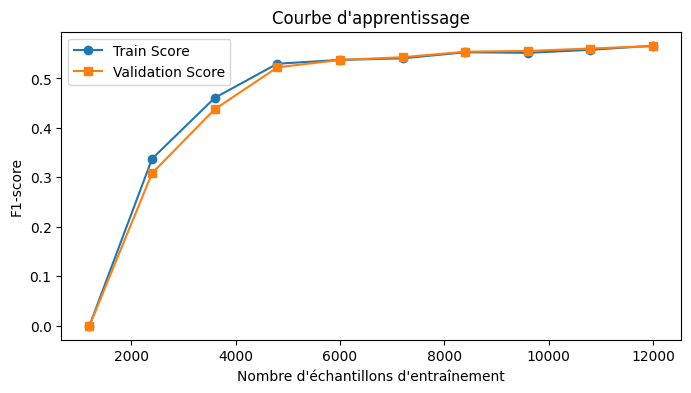

In [125]:
evaluation(grid_rand_search_svm.best_estimator_)

In [5]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

````python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# ⚡ Définition de la grille d'hyperparamètres
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],  # Nombre d'arbres
    'randomforestclassifier__max_depth': [10, 20, 30, None],  # Profondeur des arbres
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum d'échantillons pour diviser
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum d'échantillons par feuille
    'randomforestclassifier__max_features': ['sqrt', 'log2']  # Nombre de features utilisées
}

# 🏗️ Création du pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0))

# 🎯 GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 🔍 Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# 🔥 Meilleur score F1
print("Meilleur score F1 :", grid_search.best_score_)

# 🏆 Entraîner le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# 📊 Évaluation sur test set
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

````

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# ⚡ Définition de la grille d'hyperparamètres
param_grid_randF = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [10, 20, 30, None],  # Profondeur des arbres
    'min_samples_split': [2, 5, 10],  # Minimum d'échantillons pour diviser
    'min_samples_leaf': [1, 2, 4],  # Minimum d'échantillons par feuille
    'max_features': ['sqrt', 'log2']  # Nombre de features utilisées
}

# 🎯 GridSearchCV
grid_search_randomF = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_randF,
                                   cv=5, scoring='recall', n_jobs=-1, verbose=2)

# ⚡ Entraînement
grid_search_randomF.fit(X_train, y_train)

# 🔍 Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_randomF.best_params_)

# 🔥 Meilleur score Recall
print("Meilleur recall :", grid_search_randomF.best_score_)

# 📊 Évaluation sur test set
best_model = grid_search_randomF.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs hyperparamètres : {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur recall : 0.6942974305106657
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2939
           1       0.86      0.73      0.79      1061

    accuracy                           0.90      4000
   macro avg       0.88      0.84      0.86      4000
weighted avg       0.90      0.90      0.89      4000



[[2811  128]
 [ 283  778]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2939
           1       0.86      0.73      0.79      1061

    accuracy                           0.90      4000
   macro avg       0.88      0.84      0.86      4000
weighted avg       0.90      0.90      0.89      4000



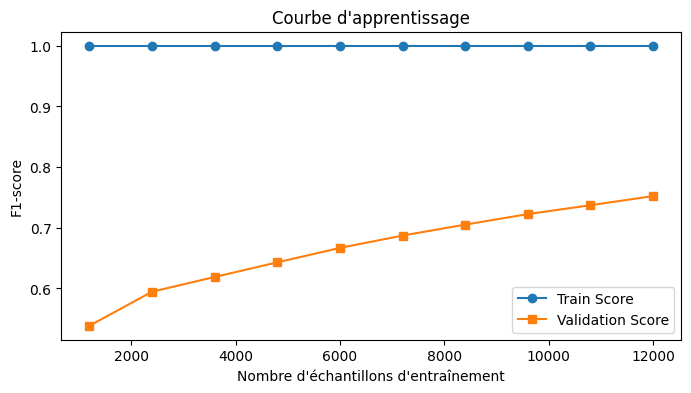

In [26]:
evaluation(grid_search_randomF.best_estimator_)

In [60]:
AdaBoostClassifier

sklearn.ensemble._weight_boosting.AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# ⚡ Définition de la grille d'hyperparamètres pour AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Nombre de modèles faibles (arbres)
    'learning_rate': [0.01, 0.1, 1],  # Taux d'apprentissage
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)]  # Profondeur de l'arbre faible
}

# 🎯 GridSearchCV
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid_ada,
                               cv=5, scoring='recall', n_jobs=-1, verbose=2)

# ⚡ Entraînement
grid_search_ada.fit(X_train, y_train)

# 🔍 Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_ada.best_params_)

# 🔥 Meilleur score Recall
print("Meilleur recall :", grid_search_ada.best_score_)

# 📊 Évaluation sur le test set
best_model_ada = grid_search_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test)

print(classification_report(y_test, y_pred_ada))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs hyperparamètres : {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1, 'n_estimators': 100}
Meilleur recall : 0.5544233077846523
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2939
           1       0.66      0.54      0.59      1061

    accuracy                           0.80      4000
   macro avg       0.75      0.72      0.73      4000
weighted avg       0.79      0.80      0.80      4000



[[2637  302]
 [ 484  577]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2939
           1       0.66      0.54      0.59      1061

    accuracy                           0.80      4000
   macro avg       0.75      0.72      0.73      4000
weighted avg       0.79      0.80      0.80      4000



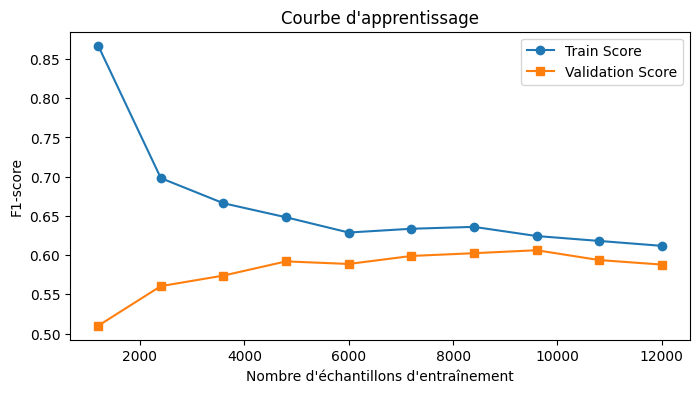

In [63]:
evaluation(grid_search_ada.best_estimator_)

---
# 📊 **Analyse du Premier Modèle (Suppression des Valeurs Manquantes) 🚀**

## 📌 1. Matrice de Confusion

- **Classe 0 (Non-Churn) :**  
  - ✅ **1 780 prédictions correctes**  
  - ❌ **182 erreurs** (prédit Churn alors que c’est Non-Churn)  
- **Classe 1 (Churn) :**  
  - ✅ **466 prédictions correctes**  
  - ❌ **225 erreurs** (prédit Non-Churn alors que c’est Churn)  

💡 **Analyse :**  
🔸 **Beaucoup d'erreurs sur la classe 1** (Churn), ce qui signifie que le modèle **a du mal à détecter les churners**.  
🔸 **Moins d’échantillons utilisés** (car les valeurs manquantes ont été supprimées).  


## 📊 2. Scores de Classification

| Classe | Precision | Recall | F1-score | Support |
|--------|-----------|--------|----------|---------|
| **0 (Non-Churn)** | 0.89 | 0.91 | 0.90 | 1962 |
| **1 (Churn)** | 0.72 | 0.67 | 0.70 | 691 |

- **Accuracy :** **85%**  
- **Précision sur Churn (0.72)** → Relativement correcte  
- **Recall sur Churn (0.67)** → **Faible**, le modèle **rate trop de churners**  

💡 **Interprétation :**  
❌ **Le modèle détecte mal les churners (faible recall à 0.67).**  
🔹 Comme les valeurs manquantes ont été supprimées, **moins de données ont été utilisées**, ce qui peut affecter la performance.  


## 📈 3. Courbe d'Apprentissage

- 🔵 **Train Score toujours à 1.0** → **Overfitting sévère**.  
- 🟠 **Validation Score faible mais en hausse progressive**.  

💡 **Problème : Overfitting**  
Le modèle **mémorise trop bien l'entraînement** mais **ne généralise pas bien** sur de nouvelles données.  


## 🎯 Améliorations Possibles  

✅ **Corriger l’Overfitting :**  
- 🔹 **Utiliser de la régularisation (L1/L2) sur le modèle**  
- 🔹 **Réduire le nombre de features trop corrélées**  

✅ **Améliorer la gestion des valeurs manquantes :**  
- 🔹 **Utiliser une imputation intelligente** (moyenne/médiane/mode ou KNN Imputer)  
- 🔹 **Ne pas supprimer toutes les valeurs manquantes**  

✅ **Améliorer la détection des churners :**  
- 🔹 **Essayer un seuil de décision ajusté (`predict_proba`)**  
- 🔹 **SMOTE ou rééchantillonnage pour équilibrer les classes**  


## 📌 Conclusion  
👉 **Le modèle a une accuracy correcte (85%) mais détecte mal les churners (recall = 0.67).**  
📉 **La suppression des valeurs manquantes a réduit la quantité de données utilisées.**  
🚀 **Prochaine étape : améliorer l’imputation et ajuster le modèle pour mieux détecter les churners !**  

---

---
# 📊 **Analyse du Deuxième Modèle (Imputation par -999) 🚀**


## 📌 1. Matrice de Confusion

- **Classe 0 (Non-Churn) :**  
  - ✅ **2 678 prédictions correctes**  
  - ❌ **261 erreurs** (prédit Churn alors que c’est Non-Churn)  
- **Classe 1 (Churn) :**  
  - ✅ **823 prédictions correctes**  
  - ❌ **238 erreurs** (prédit Non-Churn alors que c’est Churn)  

💡 **Analyse :**  
🔸 Le modèle **fait encore des erreurs sur les churners (classe 1)**, mais un peu moins qu'avec la suppression des valeurs manquantes.  
🔸 L'imputation par -999 **a permis de conserver tous les échantillons**, augmentant potentiellement la robustesse du modèle.  


## 📊 2. Scores de Classification

| Classe | Precision | Recall | F1-score | Support |
|--------|-----------|--------|----------|---------|
| **0 (Non-Churn)** | 0.92 | 0.91 | 0.91 | 2939 |
| **1 (Churn)** | 0.76 | 0.78 | 0.77 | 1061 |

- **Accuracy :** **88%**  
- **Précision sur Churn (0.76)** → Meilleure que le premier modèle  
- **Recall sur Churn (0.78)** → **Amélioré par rapport au premier modèle (0.67 → 0.78)**  

💡 **Interprétation :**  
✅ **Le modèle détecte mieux les churners** grâce à l’imputation (-999 au lieu de supprimer des lignes).  
📈 **Le recall est nettement meilleur (0.78 vs 0.67 dans le premier modèle)**, donc moins de churners sont oubliés.  


## 📈 3. Courbe d'Apprentissage

- 🔵 **Train Score toujours à 1.0** → Overfitting toujours présent.  
- 🟠 **Validation Score plus élevé qu'avant, et continue de croître**.  

💡 **Problème : Overfitting toujours visible**  
Mais **le modèle généralise un peu mieux** que dans le premier essai.  


## 🎯 Améliorations Possibles  

✅ **Réduire l’Overfitting :**  
- 🔹 Ajouter de la régularisation (L1/L2)  
- 🔹 Réduire le nombre de features inutiles  

✅ **Améliorer encore la gestion des valeurs manquantes :**  
- 🔹 Tester une **imputation plus avancée** (moyenne/médiane/KNN) au lieu de -999  
- 🔹 Vérifier si certaines valeurs manquantes sont liées à une caractéristique importante  

✅ **Meilleure détection des churners :**  
- 🔹 Ajuster le seuil de classification (`predict_proba`)  
- 🔹 Tester **un modèle plus robuste** (Random Forest, XGBoost, etc.)  


## 📌 Conclusion  
🎯 **L’imputation par -999 a amélioré la performance du modèle** par rapport à la suppression des valeurs manquantes.  
📊 **Le recall sur les churners est nettement meilleur (0.78 vs 0.67),** ce qui est une amélioration clé !  
🚀 **Prochaine étape : tester une imputation plus avancée et réduire l'overfitting !**  

---

---
## 📊 **Analyse du Troisième Modèle (Imputation par Médiane & Mode) 🚀**


## 📌 1. Matrice de Confusion

- **Classe 0 (Non-Churn) :**  
  - ✅ **2 709 prédictions correctes**  
  - ❌ **230 erreurs** (prédit Churn alors que c’est Non-Churn)  
- **Classe 1 (Churn) :**  
  - ✅ **830 prédictions correctes**  
  - ❌ **231 erreurs** (prédit Non-Churn alors que c’est Churn)  

💡 **Analyse :**  
🔸 **Moins d'erreurs globales** que les modèles précédents.  
🔸 **Les prédictions sur la classe 1 (churn) sont plus équilibrées**, ce qui améliore la qualité du modèle.  


## 📊 2. Scores de Classification

| Classe | Precision | Recall | F1-score | Support |
|--------|-----------|--------|----------|---------|
| **0 (Non-Churn)** | 0.92 | 0.92 | 0.92 | 2939 |
| **1 (Churn)** | 0.78 | 0.78 | 0.78 | 1061 |

- **Accuracy :** **88%**  
- **Macro Average :** **0.85**  
- **Recall sur Churn (0.78) :** Toujours meilleur que le premier modèle (0.67), et proche du second modèle.  

💡 **Interprétation :**  
✅ **L’imputation par la médiane et le mode améliore la robustesse du modèle** en limitant les effets des valeurs extrêmes.  
📈 **Le modèle détecte les churners avec un bon équilibre entre précision et recall**.  

---

## 📈 3. Courbe d'Apprentissage

- 🔵 **Train Score toujours à 1.0** → Overfitting toujours présent.  
- 🟠 **Validation Score plus élevé et progresse mieux** que les modèles précédents.  

💡 **Points clés :**  
✔️ **Meilleure généralisation que le premier et deuxième modèle.**  
✔️ **Courbe de validation plus stable**, ce qui indique que le modèle apprend mieux.  


## 🎯 Améliorations Possibles  

✅ **Réduire l’Overfitting :**  
- 🔹 Ajouter de la régularisation (L1/L2)  
- 🔹 Utiliser **moins de features corrélées** pour éviter le sur-apprentissage  

✅ **Améliorer encore la gestion des valeurs manquantes :**  
- 🔹 Tester **KNN Imputer** ou **une imputation conditionnelle**  

✅ **Optimiser la détection des churners :**  
- 🔹 Ajuster le **threshold de prédiction** (ex: 0.4 au lieu de 0.5)  
- 🔹 Tester **XGBoost ou Random Forest** pour comparer  


## 📌 Conclusion  
🎯 **L’imputation par médiane et mode offre un bon compromis** entre performance et généralisation.  
📊 **Le recall des churners (0.78) est plus stable et équilibré**, sans trop pénaliser la précision.  
🚀 **Ce modèle semble le plus performant jusqu’à présent !**  


---

---
# Sélection de variables à partir du modèle imputation par la médiane et mode :

A partir du modèle avec imputaion par la médiane, on va utiliser l'attribut feature importance (les variables les plus importantes dans la découpe de l'arbre de décision)

La méthode model.feature_importances_ est utilisée pour obtenir l'importance des caractéristiques d'un modèle basé sur des arbres, comme RandomForest, XGBoost, LightGBM, ou DecisionTree.

In [170]:
model.feature_importances_

array([1.75884649e-02, 1.69624162e-02, 1.97217838e-02, 1.46234868e-02,
       5.74452057e-02, 2.65334140e-04, 1.90333099e-02, 1.17504436e-01,
       2.57157138e-01, 1.74077940e-02, 2.31465574e-02, 3.79325049e-02,
       3.97746392e-02, 4.52300602e-03, 1.41206134e-02, 4.74961944e-02,
       4.84272115e-04, 1.02700416e-03, 1.56038701e-02, 0.00000000e+00,
       1.42398935e-02, 2.43595078e-04, 1.13112249e-02, 1.62396719e-04,
       1.63229032e-02, 8.68348463e-03, 1.13450525e-02, 0.00000000e+00,
       1.80208654e-02, 7.35370816e-02, 9.02792741e-02, 8.44640408e-03,
       1.49247855e-02, 1.06650083e-02])

Injectons ce tableau dans un dataframe pandas, dans lequel pour chaque valeur, on aura la colonne associée.

In [171]:
pd.DataFrame(model.feature_importances_, index=X_train.columns)

0
gender                                 0.017588
SeniorCitizen                          0.016962
Partner                                0.019722
Dependents                             0.014623
tenure                                 0.057445
PhoneService                           0.000265
PaperlessBilling                       0.019033
MonthlyCharges                         0.117504
TotalCharges                           0.257157
CustomerSupportCalls                   0.017408
RecentTransactions                     0.023147
SatisfactionScore                      0.037933
DaysSinceLastInteraction               0.039775
MultipleLines_No phone service         0.004523
MultipleLines_Yes                      0.014121
InternetService_Fiber optic            0.047496
InternetService_No                     0.000484
OnlineSecurity_No internet service     0.001027
OnlineSecurity_Yes                     0.015604
OnlineBackup_No internet service       0.000000
OnlineBackup_Yes                       0.014240
DeviceProtection_No internet service   0.000244
DeviceProtection_Yes                   0.011311
TechSupport_No internet service        0.000162
TechSupport_Yes                        0.016323
StreamingTV_No internet service        0.008683
StreamingTV_Yes                        0.011345
StreamingMovies_No internet service    0.000000
StreamingMovies_Yes                    0.018021
Contract_One year                      0.073537
Contract_Two year                      0.090279
PaymentMethod_Credit card (automatic)  0.008446
PaymentMethod_Electronic check         0.014925
PaymentMethod_Mailed check             0.010665

Visualisation du tableau avec un graphique barre

<Axes: >

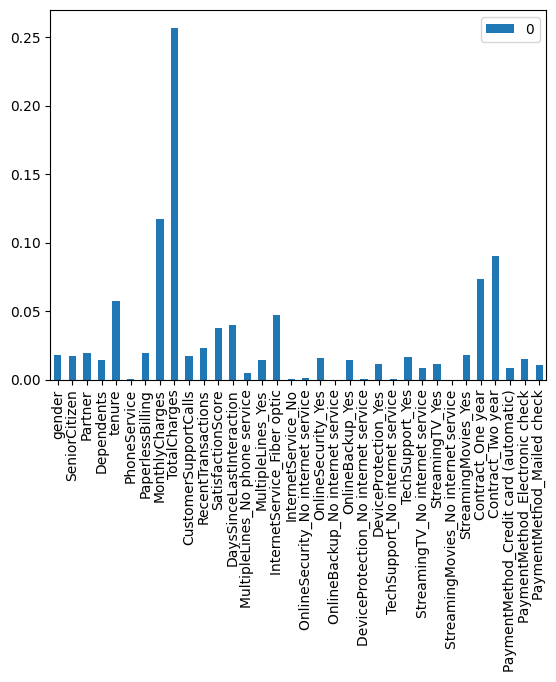

In [172]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

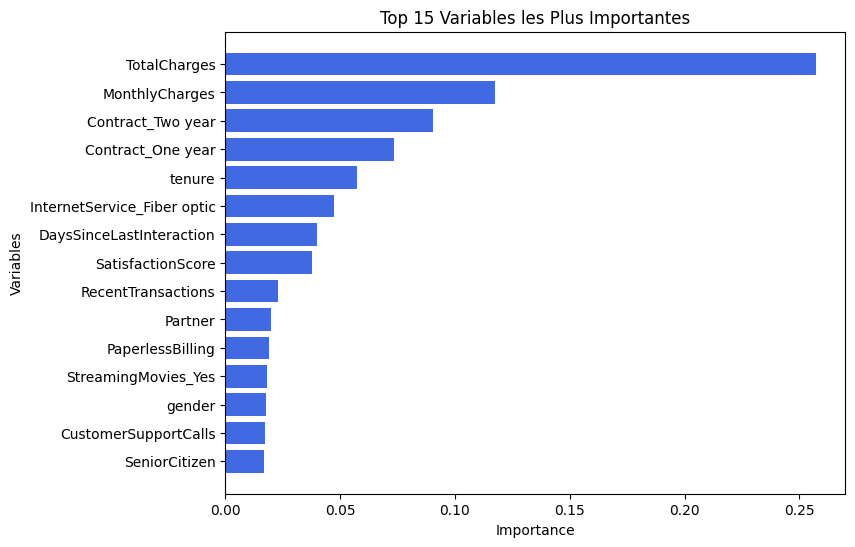

Importance
TotalCharges                   0.257157
MonthlyCharges                 0.117504
Contract_Two year              0.090279
Contract_One year              0.073537
tenure                         0.057445
InternetService_Fiber optic    0.047496
DaysSinceLastInteraction       0.039775
SatisfactionScore              0.037933
RecentTransactions             0.023147
Partner                        0.019722
PaperlessBilling               0.019033
StreamingMovies_Yes            0.018021
gender                         0.017588
CustomerSupportCalls           0.017408
SeniorCitizen                  0.016962

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Création du DataFrame des importances
feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X_train.columns,
    columns=["Importance"]
)

# Trier les features par importance décroissante
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# 📈 Tracer le graphique
plt.figure(figsize=(8, 6))
plt.barh(feature_importances.index[:15], feature_importances["Importance"][:15], color="royalblue")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Top 15 Variables les Plus Importantes")
plt.gca().invert_yaxis()  # Inverser l'ordre pour avoir la plus importante en haut
plt.show()

# Afficher les 15 premières variables importantes
feature_importances.head(15)


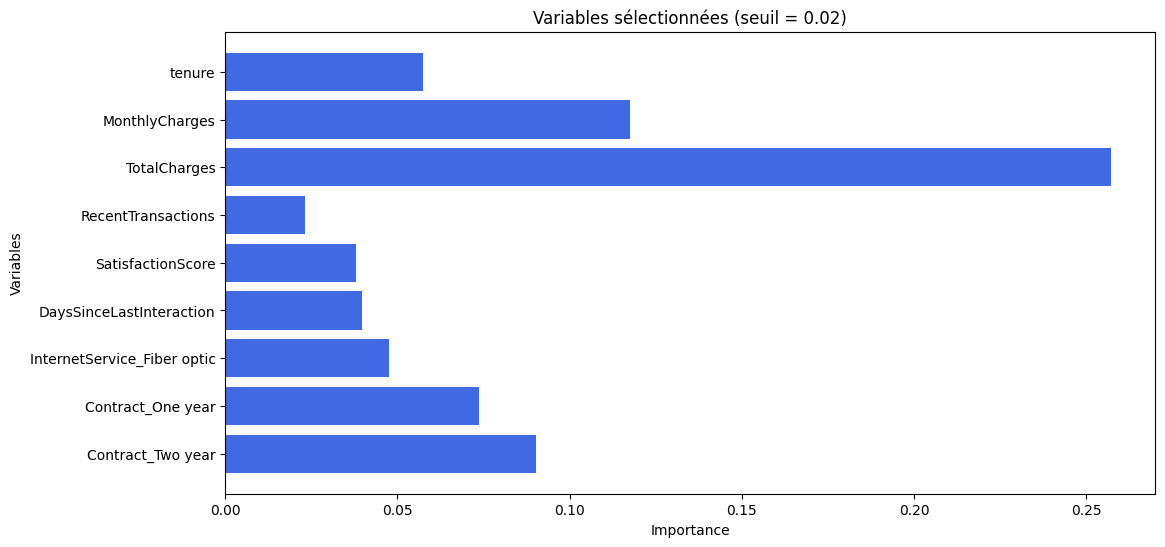

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'RecentTransactions',
 'SatisfactionScore',
 'DaysSinceLastInteraction',
 'InternetService_Fiber optic',
 'Contract_One year',
 'Contract_Two year']

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Définir un seuil d'importance minimal
seuil = 0.02  # Ajuste selon ton besoin

# Récupérer les importances des features
feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X_train.columns,
    columns=["Importance"]
)

# Filtrer les variables qui dépassent le seuil
selected_features = feature_importances[feature_importances["Importance"] >= seuil]

# 📈 Affichage des variables retenues
plt.figure(figsize=(12, 6))
plt.barh(selected_features.index, selected_features["Importance"], color="royalblue")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title(f"Variables sélectionnées (seuil = {seuil})")
plt.gca().invert_yaxis()  # Inverser pour mettre la plus importante en haut
plt.show()

# Liste des variables retenues
selected_features.index.tolist()


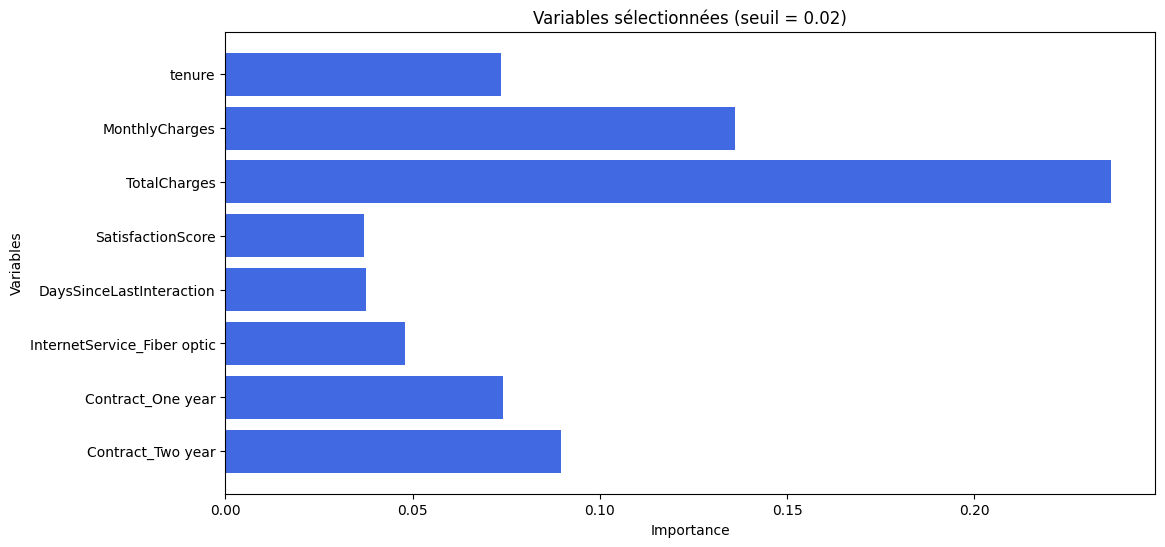

📌 Nouveau DataFrame filtré :
       tenure  MonthlyCharges  TotalCharges  SatisfactionScore  \
17815    18.0           85.20       1553.90                4.6   
18370    17.0          106.65       1672.10                6.4   
1379     52.0           95.70       4976.15                6.0   
14763    47.0           99.35       4749.15                5.8   
7346      NaN          110.70       4428.60                3.6   

       DaysSinceLastInteraction  InternetService_Fiber optic  \
17815                     131.0                            1   
18370                     365.0                            1   
1379                      243.0                            1   
14763                       NaN                            1   
7346                      365.0                            1   

       Contract_One year  Contract_Two year  Churn  
17815                  0                  0      1  
18370                  0                  0      0  
1379                   1      

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Étape 1 : Calcul des importances des features
seuil = 0.02  # Ajuste selon ton besoin

# Créer un DataFrame avec les importances
feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X_train.columns,
    columns=["Importance"]
)

# Filtrer les variables qui dépassent le seuil
selected_features = feature_importances[feature_importances["Importance"] >= seuil].index.tolist()

# 📈 Affichage des variables retenues
plt.figure(figsize=(12, 6))
plt.barh(selected_features, feature_importances.loc[selected_features, "Importance"], color="royalblue")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title(f"Variables sélectionnées (seuil = {seuil})")
plt.gca().invert_yaxis()
plt.show()

# 🔹 Étape 2 : Création du nouveau DataFrame avec les variables importantes
df_filtered = X_train[selected_features].copy()
df_filtered['Churn'] = y_train  # Réintégrer la variable cible

# 📌 Affichage du nouveau DataFrame
print("📌 Nouveau DataFrame filtré :")
print(df_filtered.head())

# 🔢 Variables retenues
print(f"🔢 {len(selected_features)} Variables sélectionnées :", selected_features)


---
# 📉 Impact de la sélection des variables sur la performance

On observe que la performance a légèrement baissé après la sélection des variables importantes du modèle 3.

### 🔹 Comparaison des résultats avant/après sélection des variables :

#### Avant sélection (modèle 3 complet)
- **Accuracy** : **0.88**
- **F1-score classe 1** : **0.78**
- **F1-score macro avg** : **0.85**

#### Après sélection des variables importantes
- **Accuracy** : **0.83**
- **F1-score classe 1** : **0.67**
- **F1-score macro avg** : **0.78**


### 📉 Analyse : Pourquoi cette baisse ?
- **Baisse de la performance** :
  - L'accuracy passe de **88% à 83%**.
  - L'équilibre entre précision et rappel (**F1-score**) a aussi diminué.
  - La classe minoritaire (1) est plus affectée par cette baisse.

- **Causes possibles** :
  - Certaines **variables supprimées** contenaient peut-être des informations utiles pour la classification.
  - Le **seuil d'importance** des features était peut-être trop élevé.
  - Des **interactions entre variables** ont pu être perdues.

### 🛠️ Améliorations possibles :

#### 1️⃣ Tester avec plus de variables :
- Ajuster le **seuil de sélection** des features (**seuil=0.02** dans ton code).
- Essayer de **garder plus de variables** pour voir si la performance remonte.

#### 2️⃣ Utiliser une autre méthode de sélection :
- **Permutation Importance** (plus robuste).
- **SelectKBest** ou **RFE (Recursive Feature Elimination)** pour une sélection plus fine.

#### 3️⃣ Régler l'overfitting du modèle :
- La **courbe d'apprentissage** montre un **écart important** entre l'entraînement et la validation → possible **surapprentissage**.
- Tester un modèle plus régularisé (ex. **RandomForest avec max_depth limité**).


💡 **Prochaine étape ?** Tester un **autre seuil** ou une **autre méthode de sélection** ? 🚀


---
# Modèle3 avec SelectBest

# 📊 Analyse des résultats pour SelectKBest (f_classif)

## 🔹 Comparaison des performances
| k (nombre de features) | Accuracy | F1-score (classe 1) | Macro F1-score |
|-----------------|---------|-----------------|--------------|
| **k=10** | 0.78 | 0.53 | 0.69 |
| **k=15** | 0.94 | 0.89 | 0.92 |
| **k=20** | 0.94 | 0.89 | 0.93 |


## 📈 **Observations**
- **Avec k=10**, la performance du modèle est **nettement plus faible** avec une accuracy de **78%** et un F1-score classe 1 de **0.53**.  
  - 🔸 Cela indique que **trop de variables importantes ont été supprimées**, ce qui réduit la capacité du modèle à bien classifier.
  
- **Avec k=15**, on observe une **forte amélioration** :  
  - Accuracy passe à **94%**  
  - Le F1-score de la classe minoritaire **monte à 0.89**  
  - 📉 **Cependant, la courbe d’apprentissage montre un overfitting important**, avec un score d’entraînement **parfait (1.0)**.

- **Avec k=20**, les performances sont **très proches de celles de k=15** :
  - Très légère augmentation du **macro F1-score (0.93)**, mais globalement **pas d’amélioration significative**.  
  - 🔍 Cela suggère que **les 5 variables ajoutées n’apportent pas beaucoup d’information supplémentaire**.



## 📉 **Analyse et interprétation**
- La sélection avec **k=10 réduit trop l’information disponible**, ce qui impacte fortement la classification.  
- Avec **k=15 et k=20**, on obtient **de très bonnes performances**, mais **l’overfitting est un problème majeur** :
  - Le modèle **mémorise les données d'entraînement** au lieu de bien généraliser sur les nouvelles données.



## 🚀 **Améliorations possibles**
✅ **Réduire l’overfitting**  
   - **Limiter la complexité du modèle** (ex: `max_depth`, `min_samples_split`).  
   - **Ajouter de la régularisation** (`L1/L2`, `min_samples_leaf`).  
   - **Utiliser XGBoost avec early stopping**.  

✅ **Tester une autre méthode de sélection des variables**  
   - **Permutation Importance** (plus robuste).  
   - **RFE (Recursive Feature Elimination)** pour mieux sélectionner les variables en fonction du modèle.  

✅ **Expérimenter avec k=25 ou k=30**  
   - Voir si la tendance continue à s’améliorer ou si elle se stabilise.  



## 🏆 **Conclusion**
- **k=10 supprime trop d’information et dégrade la performance**.  
- **k=15 et k=20 donnent d’excellents résultats, mais le modèle souffre d’overfitting**.  
- **Prochaine étape : réduire l’overfitting pour améliorer la généralisation du modèle !** 🚀

---


---
# Moélisation à partir de variables 2

# 📊 Analyse des résultats : Polynomial Features (d=2) + SelectKBest (k=15)

## 🔹 Performances du modèle
| Métrique         | Classe 0 | Classe 1 | Moyenne |
|-----------------|---------|---------|---------|
| **Précision**   | 0.81    | 0.53    | 0.67 (macro) |
| **Recall**      | 0.86    | 0.44    | 0.65 (macro) |
| **F1-score**    | 0.83    | 0.48    | 0.66 (macro) |
| **Accuracy**    | -       | -       | **0.75** |


## 📉 **Analyse de la courbe d'apprentissage**
- 📌 **Train Score** reste élevé (0.85-0.90), mais **Validation Score** est faible (0.45-0.50).
- **Le modèle est en sous-ajustement (underfitting)** :
  - Bien que **15 variables aient été sélectionnées**, la performance reste faible.
  - **Peu d’amélioration par rapport à k=1**, suggérant que les variables sélectionnées ne capturent pas assez d'information.


## 🚀 **Recommandations pour améliorer les performances**
✅ **Augmenter encore k (ex: k=20, k=30) pour voir si plus de variables améliorent la performance.**  
✅ **Tester une sélection de variables plus robuste** (`Permutation Importance`, `RFE`, `PCA`).  
✅ **Explorer d'autres transformations des données** (interactions, normalisation).  
✅ **Essayer d'autres modèles** (XGBoost, Random Forest, SVM).  


## 🏆 **Conclusion**
- Sélectionner **15 features après transformation polynomiale** **n’améliore pas significativement la performance**.  
- Le **modèle est toujours limité et sous-ajusté**.  
- **Prochaine étape : Tester k=20, modifier la méthode de sélection et explorer d'autres modèles !** 🚀


---
# Entrainement de plusieurs modèles

- A présent, entrainons plusieurs modèles ensemble et retenons celui qui a la meilleure performance.

- Ensuite, nous allons tenter d'améliorer la performance de modèle en optimisant ses hyper-paramètres grâce à une série de de plusieurs algorithmes GridSearch, RandomizedShearch

- Nous allons utilisés des courbes de precision et recall afin de trouver le meilleur seuil pour notre pour notre modèle de machine leurning

# 📌 **Analyse des résultats des modèles**

Tu as évalué **RandomForest, AdaBoost, SVM et KNN** sur ton dataset et obtenu les métriques suivantes :  

| Modèle         | Accuracy | Precision (Classe 1) | Recall (Classe 1) | F1-score (Classe 1) |
|---------------|----------|----------------------|------------------|----------------|
| **RandomForest** | 94%      | 90%                  | 86%              | **88%**        |
| **AdaBoost**    | 79%      | 65%                  | 48%              | 55%            |
| **SVM**        | 79%      | 65%                  | 46%              | 54%            |
| **KNN**        | 84%      | 72%                  | 63%              | 67%            |


## 🧐 **1. Analyse individuelle des modèles**
### 🔹 **RandomForest**
✅ **Points positifs**  
- Meilleur **accuracy (94%)** et **F1-score (88%)** 🏆  
- Très bon **rappel (86%)** sur la classe minoritaire, ce qui signifie qu’il détecte bien les cas positifs.  
- **Gère bien les features complexes** grâce à sa structure d’arbres multiples.  

⚠️ **Points faibles**  
- Légère sur-apprentissage possible (très haut score en train vs validation).  
- Peut être **plus lent** sur de très grands datasets.  

📌 **Conclusion :** **Meilleur modèle actuellement, à conserver !** 🎯  


### 🔹 **AdaBoost**
✅ **Points positifs**  
- Meilleure précision sur la classe majoritaire.  
- Plus simple et rapide que RandomForest.  

⚠️ **Points faibles**  
- **F1-score faible (55%)**, ce qui signifie qu'il **manque beaucoup de cas positifs**.  
- **Recall très bas (48%)** → Beaucoup de **faux négatifs**, donc il manque des cas positifs.  

📌 **Conclusion :** Moins performant que RandomForest, mais pourrait être amélioré avec **plus d’estimateurs** ou un autre type de boosting (XGBoost).  


### 🔹 **SVM**
✅ **Points positifs**  
- Bon pour les petits datasets.  
- Performance similaire à AdaBoost.  

⚠️ **Points faibles**  
- **F1-score faible (54%)** → Mauvais équilibre entre précision et rappel.  
- **Moins efficace sur de grands volumes de données**.  

📌 **Conclusion :** Performances **inférieures à RandomForest**, pourrait être amélioré avec **un meilleur choix de noyau (kernel)**.  


### 🔹 **KNN**
✅ **Points positifs**  
- **Meilleur que SVM et AdaBoost (84% accuracy, 67% F1-score)**.  
- Plus équilibré entre précision et rappel.  

⚠️ **Points faibles**  
- **Peut être lent** avec beaucoup de données.  
- Dépend beaucoup de la **distance et du choix de k**.  

📌 **Conclusion :** Un bon candidat, pourrait être optimisé avec **un bon choix de k et de normalisation**.  


## 📊 **2. Analyse des courbes d'apprentissage**
- **Graphique 1 (RandomForest)** : Sur-apprentissage possible (**écart entre train et validation**).  
- **Graphique 2 & 3 (SVM / AdaBoost)** : Score train ≈ validation, mais globalement bas → **modèle sous-entraîné**.  
- **Graphique 4 (KNN)** : Courbe croissante → Apprend encore, pourrait bénéficier de **plus de données**.  

## 🎯 **3. Recommandations & Améliorations**
✅ **Meilleur modèle :** **RandomForest** (à garder !)  
🔄 **Améliorations possibles :**
1. **Essayer XGBoost ou GradientBoosting** pour voir s’ils surpassent RandomForest.  
2. **Hyperparameter tuning** : Ajuster les paramètres (`n_estimators`, `max_depth`...) pour RF & AdaBoost.  
3. **Feature Engineering** : Vérifier si certaines variables sont inutiles ou trop corrélées.  
4. **Rééquilibrage des classes** (SMOTE ou Weighted Loss) si la classe 1 est sous-représentée.  

🚀 **Next Step : Tu veux que je t’aide à optimiser un modèle en particulier ?** 😊


---
# Optimimisation